## Librerias

In [425]:
%reset -f

In [426]:
# %pip install numpy
# %pip install pandas
# %pip install tabulate
# %pip install matplotlib
# %pip install seaborn
# %pip install statsmodels
# %pip install scikit-learn
# %pip install skopt
# %pip install optuna
# %pip install lifelines
# %pip install fitter
# %pip install scikit-optimize
# %pip install xgboost


In [427]:
# %pip install numpy --no-cache-dir
# %pip install pandas --no-cache-dir --force-reinstall

In [428]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from tabulate import tabulate

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
import statsmodels.api as sm
import math
import itertools

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge

from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt.plots import plot_convergence
import optuna

# Varios
# ==============================================================================
import multiprocessing
import random
from itertools import product
from fitter import Fitter, get_common_distributions

from sklearn.ensemble import ExtraTreesClassifier

In [429]:
# Estimador de Kaplan - Meier
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

In [430]:
# Configuración inicial
pd.set_option('display.max_columns', None)
# plt.style.use('seaborn')
sns.set_palette("husl")

## Datos

In [431]:
#Data
data_glio = pd.read_excel("Datos_Glioma.xlsx")

In [432]:
data_glio.head()

,ORDEN,CODIGO,NOMBRE,IDENTIFICACION,GENERO,EDAD,M228,PATOLOGIA,LATERALIDAD_PACIENTE,LADO_LESION,LOCALIZACION,CONVULSIONES,LANGUAGE,MOTOR,SENSORIAL,COMPORTAMIENTO,PUNTUACION_KP,PUNTUACION_KP_INMEDIATO,SEGUIMIENTO_MUERTE,ABORDAJE_CRANIOTOMIA,DIAS_POSTOPERATORIO,RESECCION_RAD,NP_CONV,NP_DEF_LENG,NP_DEF_MOTORA,MUERTE,FECHA_CIRUGIA,FECHA_MUERTE,MESES,IDH,AMP_EXON2,AMP_EXON6,MUTACION_228,MUTACION_TERT,DX_ANTERIOR,DX_ANTERIOR1,RECLASIFICACION,RECLASIFICACION_EXP
0,1,1253-19,MONTALVO \tMARTINEZ \tCECILIA \t,51672926.0,1,57,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.9,0.8,Seguimiento hasta 2021 KPS 70,0.0,6.0,1.0,1.0,1.0,1.0,1.0,27/04/2019,21/11/2022,42.894737,0,0.0,0.0,0.0,0.0,B,GMF,I,GLIOBLASTOMA IDH WILDTYPE SIN ALTERACIONES MOL...
1,2,5174-19,CONTRERAS\tCARVAJAL \tCESAR\tARMANDO,17006284.0,0,83,0.0,2.0,1.0,0.0,5.0,0.0,1.0,1.0,0.0,0.0,1.0,0.9,Paciente Fallecido,4.0,6.0,2.0,0.0,1.0,1.0,1.0,05/09/2019,04/09/2020,12.006579,0,1.0,1.0,0.0,0.0,B,GMF,I,GLIOBLASTOMA IDH WILDTYPE CON AMPLIFICACION DE...
2,3,6990-19,SERRANO \tMORENO\tJUDITH,51896732.0,1,51,0.0,2.0,1.0,1.0,7.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,En Seguimiento actual,1.0,5.0,2.0,1.0,0.0,0.0,0.0,05/11/2019,30/11/2023,48.881579,0,1.0,1.0,0.0,0.0,B,GMF,I,GLIOBLASTOMA IDH WILDTYPE CON AMPLIFICACION DE...
3,4,7183-19,CANO \tGARZON\tNANCY\tESMERALDA,41645357.0,1,65,0.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.8,Paciente Fallecido,0.0,15.0,1.0,0.0,1.0,1.0,1.0,13/11/2019,07/11/2023,47.861842,0,1.0,1.0,0.0,0.0,B,GMF,I,GLIOBLASTOMA IDH WILTYPE CON AMPLIFICACION DEL...
4,5,2264-20,TELLEZ\tTELLEZ \tJULIO \tCESAR,19148322.0,0,68,0.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.9,0.9,Paciente Fallecido,0.0,10.0,2.0,0.0,0.0,0.0,1.0,14/03/2020,06/06/2020,2.763158,0,1.0,1.0,0.0,0.0,B,GMF,I,GLIOBLASTOMA IDH WILDTYPE CON AMPLIFICACION DE...


In [433]:
#Agrupación para Edad
data_glio['Grupo'] = data_glio['EDAD'].apply(lambda x: 'Pediátrico' if x <= 18 else 'Adulto')

# Tabla de frecuencias
print(data_glio['Grupo'].value_counts())

Grupo
Adulto        51
Pediátrico     9
Name: count, dtype: int64


In [434]:
# Eliminar espacios adicionales al inicio y al final de los nombres de las columnas
data_glio.columns = data_glio.columns.str.strip()

# Convertir todos los nombres de las columnas a mayúsculas (opcional)
data_glio.columns = data_glio.columns.str.upper()

# Verificar nuevamente los nombres de las columnas
print(data_glio.columns)

Index(['ORDEN', 'CODIGO', 'NOMBRE', 'IDENTIFICACION', 'GENERO', 'EDAD', 'M228',
       'PATOLOGIA', 'LATERALIDAD_PACIENTE', 'LADO_LESION', 'LOCALIZACION',
       'CONVULSIONES', 'LANGUAGE', 'MOTOR', 'SENSORIAL', 'COMPORTAMIENTO',
       'PUNTUACION_KP', 'PUNTUACION_KP_INMEDIATO', 'SEGUIMIENTO_MUERTE',
       'ABORDAJE_CRANIOTOMIA', 'DIAS_POSTOPERATORIO', 'RESECCION_RAD',
       'NP_CONV', 'NP_DEF_LENG', 'NP_DEF_MOTORA', 'MUERTE', 'FECHA_CIRUGIA',
       'FECHA_MUERTE', 'MESES', 'IDH', 'AMP_EXON2', 'AMP_EXON6',
       'MUTACION_228', 'MUTACION_TERT', 'DX_ANTERIOR', 'DX_ANTERIOR1',
       'RECLASIFICACION', 'RECLASIFICACION_EXP', 'GRUPO'],
      dtype='object')


In [435]:
# Conversión de ID y orden como objetos si los necesitas
data_glio['ORDEN'] = data_glio['ORDEN'].astype(int)
data_glio['IDENTIFICACION'] = data_glio['IDENTIFICACION'].astype(str)

In [436]:
data_glio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ORDEN                    60 non-null     int64  
 1   CODIGO                   60 non-null     object 
 2   NOMBRE                   55 non-null     object 
 3   IDENTIFICACION           60 non-null     object 
 4   GENERO                   60 non-null     int64  
 5   EDAD                     60 non-null     int64  
 6   M228                     37 non-null     float64
 7   PATOLOGIA                55 non-null     float64
 8   LATERALIDAD_PACIENTE     46 non-null     float64
 9   LADO_LESION              55 non-null     float64
 10  LOCALIZACION             55 non-null     float64
 11  CONVULSIONES             55 non-null     float64
 12  LANGUAGE                 55 non-null     float64
 13  MOTOR                    55 non-null     float64
 14  SENSORIAL                55 

Se debe tener en cuenta la clasificación de las mismas:

`int`:	Para variables categóricas codificadas como números (ordinales o nominales).

`float` Para variables numéricas continuas reales.

`object / category` Para variables categóricas en texto o cuando se quiera conservar etiquetas originales.

Nos da alguna información estadística como el número total de filas, media, desviación estándar, valor mínimo, percentil 25, percentil 50, percentil 75 y valor máximo para cada columna.

In [544]:
#Esto es para las variables numericas
data_glio["MESES"].describe()

count    60.000000
mean     24.192982
std      23.904309
min       0.098684
25%       4.613487
50%      12.105263
75%      42.491776
max      85.361842
Name: MESES, dtype: float64

## Diccionario de variables - Estudio de Gliomas

### Género
- `1`: Femenino  
- `0`: Masculino

### M228
- `1`: Sí  
- `0`: No

### Mutación 228 C>T
- `1`: Sí  
- `0`: No

### Patología
- `0`: Low Grade Glioma  
- `1`: High Grade Glioma Grade III  
- `2`: Glioblastoma/GBM  
- `3`: NOS

### Lateralidad / Lado de la lesión
- `0`: Izquierda  
- `1`: Derecha  
- `2`:  
- `3`: Bilateral

### Localización
- `0`: Frontal  
- `1`: Frontoparietal  
- `2`: Parietal  
- `3`: Insular (podría comprometer frontal o temporal)  
- `4`: Ganglios basales  
- `5`: Temporal  
- `6`: Fosa posterior  
- `7`: Occipital  
- `8`: Bilateral  
- `9`: Tálamo

### Convulsiones
- `0`: No  
- `1`: Sí

### Lenguaje
- `0`: No  
- `1`: Sí  
- `2`: (sin especificar)

### Motor
- `0`: No  
- `1`: Sí

### Sensorial
- `0`: No  
- `1`: Sí  
- `2`: (sin especificar)

### Comportamiento
- `0`: No  
- `1`: Sí

### Puntuación de Karnofsky Preoperatorio
- `0.6`: Biopsia  
- `0.7`: Parcial < 90%  
- `0.8`: Casi total > 90%  
- `0.9`: Total  
- `0.10`: (sin especificar)

### Puntuación de Karnofsky Postoperatorio inmediato
- `0`  
- `0.3`  
- `0.5`  
- `0.6`  
- `0.7`  
- `0.8`  
- `0.9`  
- `1`

### Abordaje de Craniotomía
- `0`: Frontal  
- `1`: Parietal  
- `3`: Frontoparietal  
- `4`: Temporal  
- `5`: Frontotemporal  
- `6`: Occipital  
- `7`: Suboccipital

### Días de postoperatorio de estancia en el hospital
- Rango: 3 a 180 días

### Resección Radiológica
- `0`: Biopsia  
- `1`: Parcial < 90%  
- `2`: Casi total > 90%  
- `3`: Total

### Nuevas convulsiones posoperatorias
- `0`: No  
- `1`: Sí

### Nuevo déficit de lenguaje postoperatorio
- `0`: No  
- `1`: Sí

### Nueva deficiencia motora postoperatoria
- `0`: No  
- `1`: Sí

### Muerte
- `0`: No  
- `1`: Sí

### Meses
- Calculado como: `(fecha_corte - fecha_muerte) / 30.4`

### IDH
- `1`: Positivo  
- `0`: Negativo

### AMP Exón 2
- `1`: Sí  
- `0`: No

### AMP Exón 6
- `1`: Sí  
- `0`: No

### Mutación 228
- `1`: Sí  
- `0`: No

### Mutación TERT
- `1`: Sí  
- `0`: No

### Clasificación anterior
- `A`: Gliomas NOS (grado II y III)  
- `B`: Glioblastoma  
- `C`: Oligodendroglioma (grados II y III)  
- `D`: Astrocitoma (grados II y III)

### Reclasificación molecular
- `E`: Oligodendroglioma (grados 2 y 3)  
- `F`: Astrocitoma IDH mutante (grados 2 y 3), codeleción 1p19q negativa, CDKN2A/B negativo  
- `G`: Astrocitoma IDH mutante (grado 4), codeleción 1p19q negativa y CDKN2A/B positivo  
- `H`: Astrocitoma wildtype (grados 2 y 3), IDH negativo, TERT negativo, EGFR negativo  
- `I`: Glioblastoma (grado 4), IDH negativo, TERT positivo si es grado 2, 3 o 4; o negativo pero grado 4 por histología y EGFR positivo o negativo si es grado 4 por histología  
- `J`: Gliomas IDH wildtype con amplificación del exón 6


## Análisis exploratorio

Número de observaciones y valores ausentes

In [438]:
# Dimensiones del dataset
# ==============================================================================
data_glio.shape

(60, 39)

In [439]:
# Número de datos ausentes por variable
# ==============================================================================
data_glio.isna().sum().sort_values()

ORDEN                       0
CODIGO                      0
IDENTIFICACION              0
GENERO                      0
EDAD                        0
FECHA_CIRUGIA               0
IDH                         0
MESES                       0
FECHA_MUERTE                0
RECLASIFICACION_EXP         0
DX_ANTERIOR                 0
GRUPO                       0
RECLASIFICACION             0
DX_ANTERIOR1                0
RESECCION_RAD               3
CONVULSIONES                5
NP_DEF_MOTORA               5
NP_DEF_LENG                 5
MOTOR                       5
COMPORTAMIENTO              5
LANGUAGE                    5
ABORDAJE_CRANIOTOMIA        5
NP_CONV                     5
SEGUIMIENTO_MUERTE          5
SENSORIAL                   5
NOMBRE                      5
PATOLOGIA                   5
LOCALIZACION                5
LADO_LESION                 5
MUERTE                      6
DIAS_POSTOPERATORIO        10
LATERALIDAD_PACIENTE       14
PUNTUACION_KP_INMEDIATO    15
PUNTUACION

Dado a las condiciones de las variables se opta por no realizar una imputación de valores ausentes.

### Variable Respuesta


Cuando se crea un modelo, es muy importante estudiar la distribución de la variable respuesta, ya que, a fin de cuentas, es lo que interesa predecir.

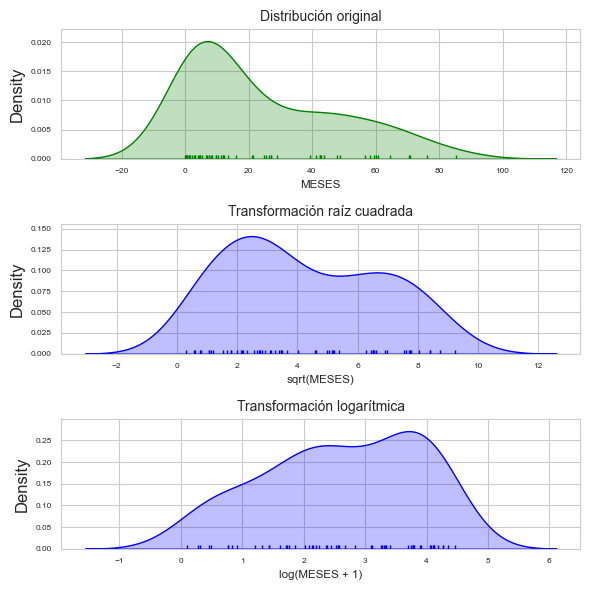

In [545]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))

# Distribución original
sns.kdeplot(
    data_glio['MESES'],
    fill=True,
    color="green",
    ax=axes[0]
)
sns.rugplot(
    data_glio['MESES'],
    color="green",
    ax=axes[0]
)
axes[0].set_title("Distribución original", fontsize='medium')
axes[0].set_xlabel('MESES', fontsize='small')
axes[0].tick_params(labelsize=6)

# Transformación raíz cuadrada
sns.kdeplot(
    np.sqrt(data_glio['MESES']),
    fill=True,
    color="blue",
    ax=axes[1]
)
sns.rugplot(
    np.sqrt(data_glio['MESES']),
    color="blue",
    ax=axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize='medium')
axes[1].set_xlabel('sqrt(MESES)', fontsize='small')
axes[1].tick_params(labelsize=6)

# Transformación logarítmica
sns.kdeplot(
    np.log(data_glio['MESES'] + 1),
    fill=True,
    color="blue",
    ax=axes[2]
)
sns.rugplot(
    np.log(data_glio['MESES'] + 1),
    color="blue",
    ax=axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize='medium')
axes[2].set_xlabel('log(MESES + 1)', fontsize='small')
axes[2].tick_params(labelsize=6)

# Ajustar el diseño para evitar superposiciones
fig.tight_layout()

# Mostrar el gráfico
plt.show()

Algunos modelos de machine learning y aprendizaje estadístico requieren que la variable respuesta se distribuya de una forma determinada. En este caso no se evidencia una distribución en sí.

In [441]:
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(data_glio['MESES'], distributions =distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
exponpow,0.019085,998.625678,1004.908712,inf,0.114595,3.810830e-01
gamma,0.019667,1036.434359,1042.717393,inf,0.171927,5.080749e-02
powerlaw,0.019688,968.132287,974.415321,inf,0.112625,4.021930e-01
expon,0.023886,994.267804,998.456493,inf,0.121736,3.105530e-01
beta,0.024568,920.234044,928.611423,inf,0.229153,2.983119e-03
cauchy,0.030902,1124.937496,1129.126185,inf,0.261224,4.220580e-04
logistic,0.035931,1009.503737,1013.692426,inf,0.177878,3.931666e-02
norm,0.036347,989.881234,994.069923,inf,0.210159,8.380604e-03
chi2,0.124381,2869.879304,2876.162338,inf,0.601562,2.635614e-21


### Variables numéricas

In [442]:
# Variables numéricas
# ==============================================================================
data_glio.select_dtypes(include=['float64', 'int']).describe()

,ORDEN,GENERO,EDAD,M228,PATOLOGIA,LATERALIDAD_PACIENTE,LADO_LESION,LOCALIZACION,CONVULSIONES,LANGUAGE,MOTOR,SENSORIAL,COMPORTAMIENTO,PUNTUACION_KP,PUNTUACION_KP_INMEDIATO,ABORDAJE_CRANIOTOMIA,DIAS_POSTOPERATORIO,RESECCION_RAD,NP_CONV,NP_DEF_LENG,NP_DEF_MOTORA,MUERTE,MESES,IDH,AMP_EXON2,AMP_EXON6,MUTACION_228,MUTACION_TERT
count,60.000000,60.000000,60.000000,37.000000,55.000000,46.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,45.000000,45.000000,55.000000,50.000000,57.000000,55.000000,55.000000,55.000000,54.000000,60.000000,60.000000,44.000000,44.000000,44.000000,44.000000
mean,40.266667,0.616667,51.983333,0.027027,1.472727,0.934783,0.836364,2.818182,0.418182,0.290909,0.490909,0.436364,0.418182,0.913333,0.775556,2.472727,14.820000,1.456140,0.309091,0.290909,0.418182,0.777778,24.192982,0.266667,0.704545,0.840909,0.045455,0.045455
std,23.632688,0.490301,22.526438,0.164399,0.741733,0.249637,0.976836,2.480225,0.497807,0.497130,0.504525,0.536230,0.497807,0.103573,0.209062,2.106907,25.401824,0.733635,0.466378,0.458368,0.497807,0.419643,23.904309,0.445948,0.461522,0.369989,0.210707,0.210707
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.098684,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.250000,0.000000,43.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.900000,0.700000,0.500000,5.250000,1.000000,0.000000,0.000000,0.000000,1.000000,4.613487,0.000000,0.000000,1.000000,0.000000,0.000000
50%,41.500000,1.000000,55.500000,0.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.900000,0.800000,3.000000,8.500000,1.000000,0.000000,0.000000,0.000000,1.000000,12.105263,0.000000,1.000000,1.000000,0.000000,0.000000
75%,57.250000,1.000000,67.000000,0.000000,2.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.900000,4.000000,14.750000,2.000000,1.000000,1.000000,1.000000,1.000000,42.491776,1.000000,1.000000,1.000000,0.000000,0.000000
max,81.000000,1.000000,88.000000,1.000000,3.000000,1.000000,3.000000,8.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,7.000000,180.000000,3.000000,1.000000,1.000000,1.000000,1.000000,85.361842,1.000000,1.000000,1.000000,1.000000,1.000000


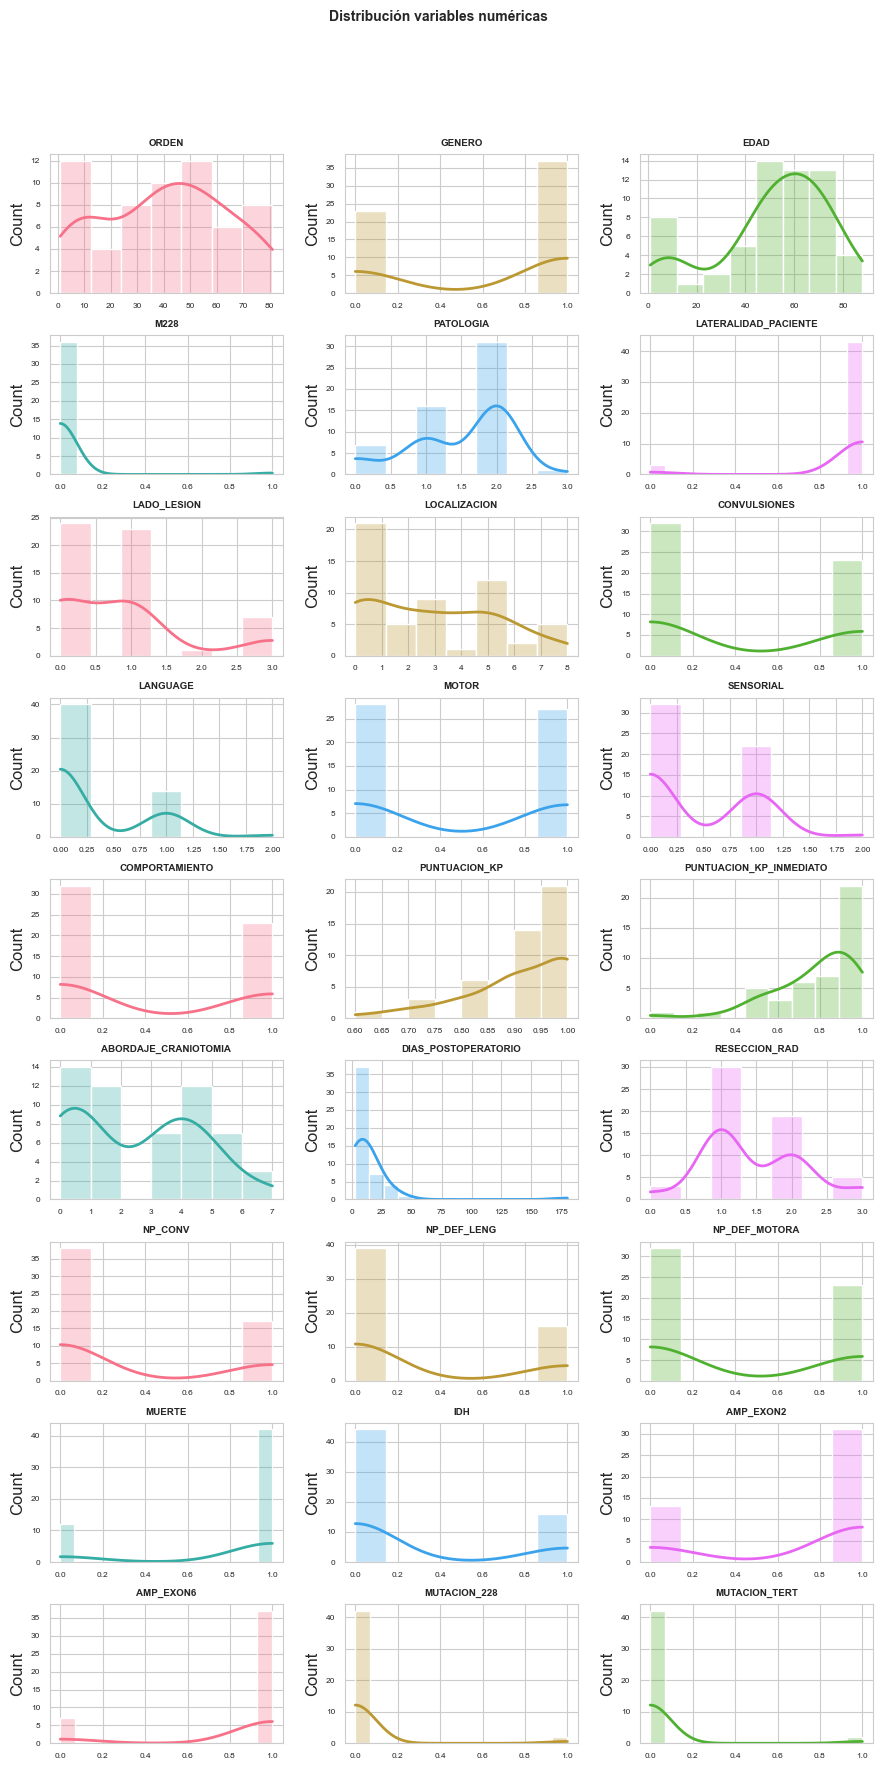

In [443]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

columnas_numeric = data_glio.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('MESES')

n = len(columnas_numeric)
ncols = 3
nrows = math.ceil(n / ncols)

# Preparar figura
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*3, nrows*2))
axes = axes.flat

# Preparar colores seguros
colores = itertools.cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

# Graficar
for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data     = data_glio,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = next(colores),
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

# Eliminar subplots sobrantes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");


Dependiendo la complejidad del paciente evidenciamos que esta se comparta de la siguiente forma:

In [444]:
# Valores observados de Puntuación KP
# ==============================================================================
data_glio["PUNTUACION_KP"].value_counts()

PUNTUACION_KP
1.0    21
0.9    14
0.8     6
0.7     3
0.6     1
Name: count, dtype: int64

Como el objetivo del estudio es predecir la sobrevida de los pacientes con Gliomas, el análisis de cada variable se hace también en relación a la variable respuesta MESES. Analizando los datos de esta forma, se pueden empezar a extraer ideas sobre qué variables están más relacionadas con el MESES y de qué forma.

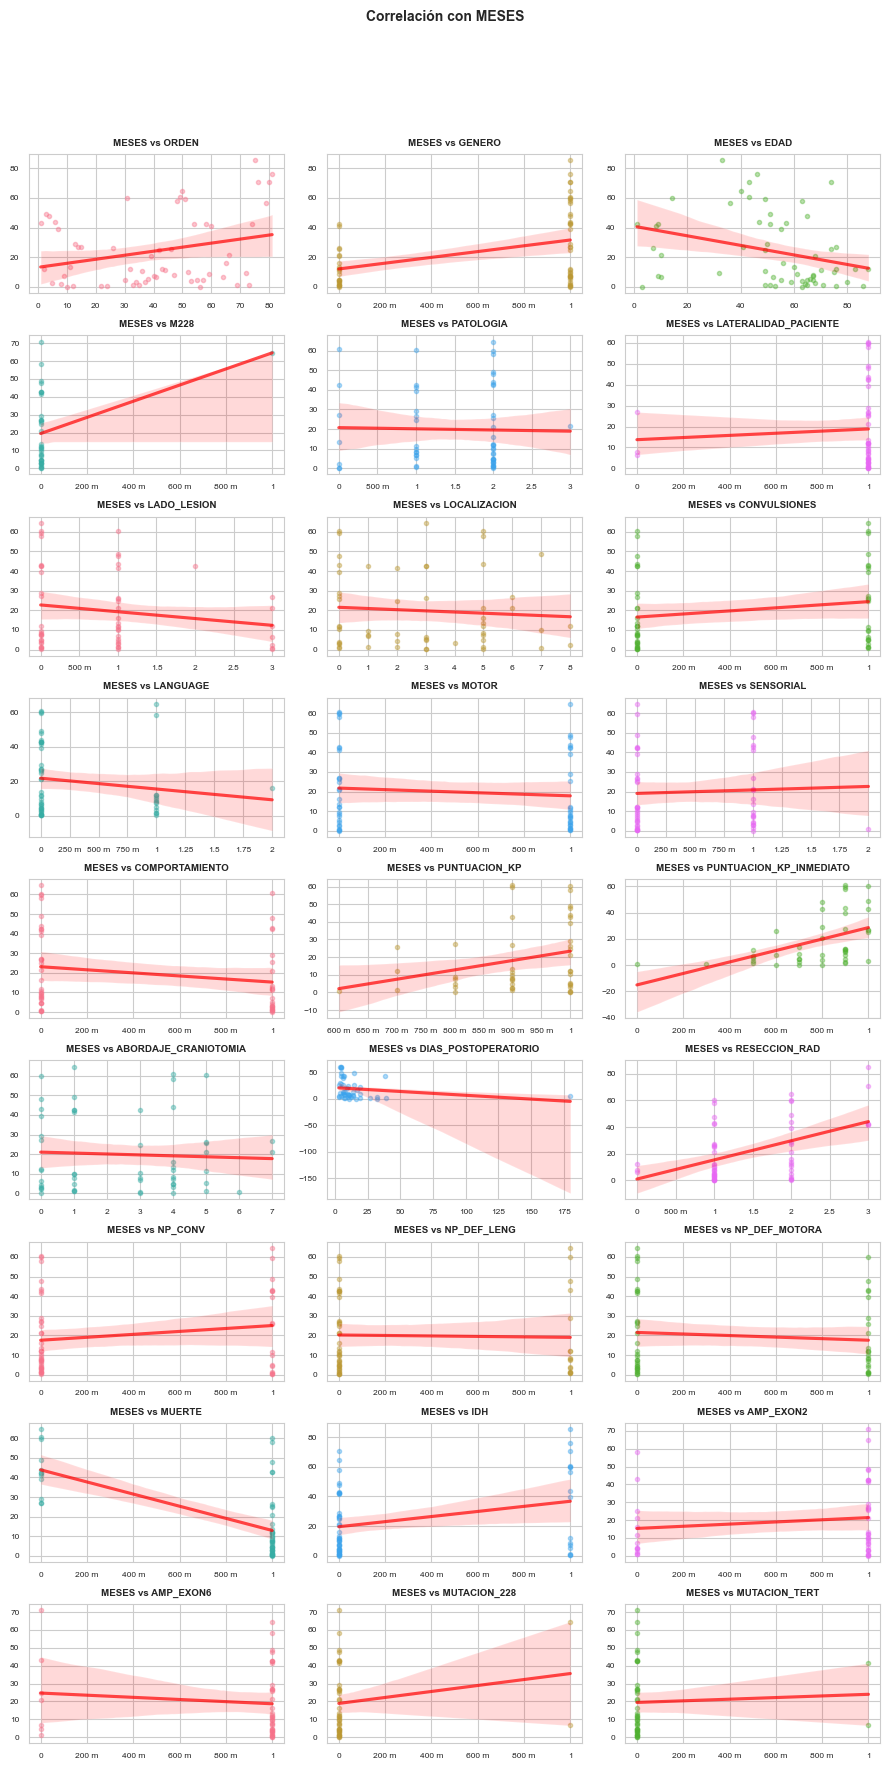

In [445]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas

columnas_numeric = data_glio.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('MESES')

n = len(columnas_numeric)
ncols = 3
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*3, nrows*2))
axes = axes.flat

colores = itertools.cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

# Gráfico de regresión para cada variable numérica vs MESES
for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = data_glio[colum],
        y           = data_glio['MESES'],
        color       = next(colores),
        marker      = '.',
        scatter_kws = {"alpha": 0.4},
        line_kws    = {"color": "r", "alpha": 0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"MESES vs {colum}", fontsize=7, fontweight="bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize=6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con MESES', fontsize=10, fontweight="bold");


### Correlación variables numéricas

In [446]:
# Correlación entre columnas numéricas (Ojo con la estructura natural de la variable)
# ==============================================================================
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)

corr_matrix = data_glio.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
711,MUTACION_228,M228,1.000000,1.000000
105,M228,MUTACION_228,1.000000,1.000000
161,LATERALIDAD_PACIENTE,MUTACION_TERT,-0.696311,0.696311
738,MUTACION_TERT,LATERALIDAD_PACIENTE,-0.696311,0.696311
160,LATERALIDAD_PACIENTE,MUTACION_228,-0.696311,0.696311
713,MUTACION_228,LATERALIDAD_PACIENTE,-0.696311,0.696311
624,MESES,MUERTE,-0.654380,0.654380
597,MUERTE,MESES,-0.654380,0.654380
592,MUERTE,RESECCION_RAD,-0.613057,0.613057
484,RESECCION_RAD,MUERTE,-0.613057,0.613057


Para análisis de variables con relación a la muerte:

In [447]:
data_glio.groupby('PATOLOGIA')['MUERTE'].mean()

PATOLOGIA
0.0    0.571429
1.0    0.750000
2.0    0.838710
3.0         NaN
Name: MUERTE, dtype: float64

Porcentaje de mortalidad por grupo de patología.

### Variables cualitativas

Para este caso, voy a tomarlas como categorías, para ver si la variable muestra comportamientos distintos al ser tratada de esta forma:

In [448]:
Data_Glio_cat = data_glio.copy() #Para no dañar la estructura original.

In [449]:
# Lista de columnas a convertir a tipo "object" (excluyendo MESES)
columns_to_convert = [
    'GENERO', 'M228', 'PATOLOGIA', 'LATERALIDAD_PACIENTE',
    'LADO_LESION', 'LOCALIZACION', 'CONVULSIONES', 'LANGUAGE', 'MOTOR', 'SENSORIAL',
    'COMPORTAMIENTO', 'ABORDAJE_CRANIOTOMIA', 'RESECCION_RAD', 'NP_CONV', 'NP_DEF_LENG', 'NP_DEF_MOTORA',
    'MUERTE', 'IDH', 'AMP_EXON2', 'AMP_EXON6', 'MUTACION_228', 'MUTACION_TERT'
]

# Convertir las columnas seleccionadas a tipo "object"
for col in columns_to_convert:
    if col in Data_Glio_cat.columns:  # Verificar que la columna exista en el DataFrame
        Data_Glio_cat[col] = Data_Glio_cat[col].astype('object')

# Mostrar los tipos de datos después de la conversión
print("\nTipos de datos después de la conversión:")
print(Data_Glio_cat.dtypes)



Tipos de datos después de la conversión:
ORDEN                        int64
CODIGO                      object
NOMBRE                      object
IDENTIFICACION              object
GENERO                      object
EDAD                         int64
M228                        object
PATOLOGIA                   object
LATERALIDAD_PACIENTE        object
LADO_LESION                 object
LOCALIZACION                object
CONVULSIONES                object
LANGUAGE                    object
MOTOR                       object
SENSORIAL                   object
COMPORTAMIENTO              object
PUNTUACION_KP              float64
PUNTUACION_KP_INMEDIATO    float64
SEGUIMIENTO_MUERTE          object
ABORDAJE_CRANIOTOMIA        object
DIAS_POSTOPERATORIO        float64
RESECCION_RAD               object
NP_CONV                     object
NP_DEF_LENG                 object
NP_DEF_MOTORA               object
MUERTE                      object
FECHA_CIRUGIA               object
FECHA_MUERTE 

In [450]:
#Por comodidad borramos algunas variables
columnas_a_eliminar = [
    'CODIGO', 'NOMBRE', 'SEGUIMIENTO_MUERTE',
    'FECHA_CIRUGIA', 'FECHA_MUERTE', 'RECLASIFICACION_EXP', "IDENTIFICACION"
]

Data_Glio_cat = Data_Glio_cat.drop(columns=columnas_a_eliminar, errors='ignore')


In [451]:
# Variables cualitativas (tipo object)
# ==============================================================================
Data_Glio_cat.select_dtypes(include=['object']).describe()

,GENERO,M228,PATOLOGIA,LATERALIDAD_PACIENTE,LADO_LESION,LOCALIZACION,CONVULSIONES,LANGUAGE,MOTOR,SENSORIAL,COMPORTAMIENTO,ABORDAJE_CRANIOTOMIA,RESECCION_RAD,NP_CONV,NP_DEF_LENG,NP_DEF_MOTORA,MUERTE,IDH,AMP_EXON2,AMP_EXON6,MUTACION_228,MUTACION_TERT,DX_ANTERIOR,DX_ANTERIOR1,RECLASIFICACION,GRUPO
count,60,37.0,55.0,46.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,57.0,55.0,55.0,55.0,54.0,60,44.0,44.0,44.0,44.0,60,60,60,60
unique,2,2.0,4.0,2.0,4.0,9.0,2.0,3.0,2.0,3.0,2.0,7.0,4.0,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,2.0,4,12,6,2
top,1,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1.0,1.0,0.0,0.0,B,GMF,I,Adulto
freq,37,36.0,31.0,43.0,24.0,16.0,32.0,40.0,28.0,32.0,32.0,14.0,30.0,38.0,39.0,32.0,42.0,44,31.0,37.0,42.0,42.0,31,30,37,51


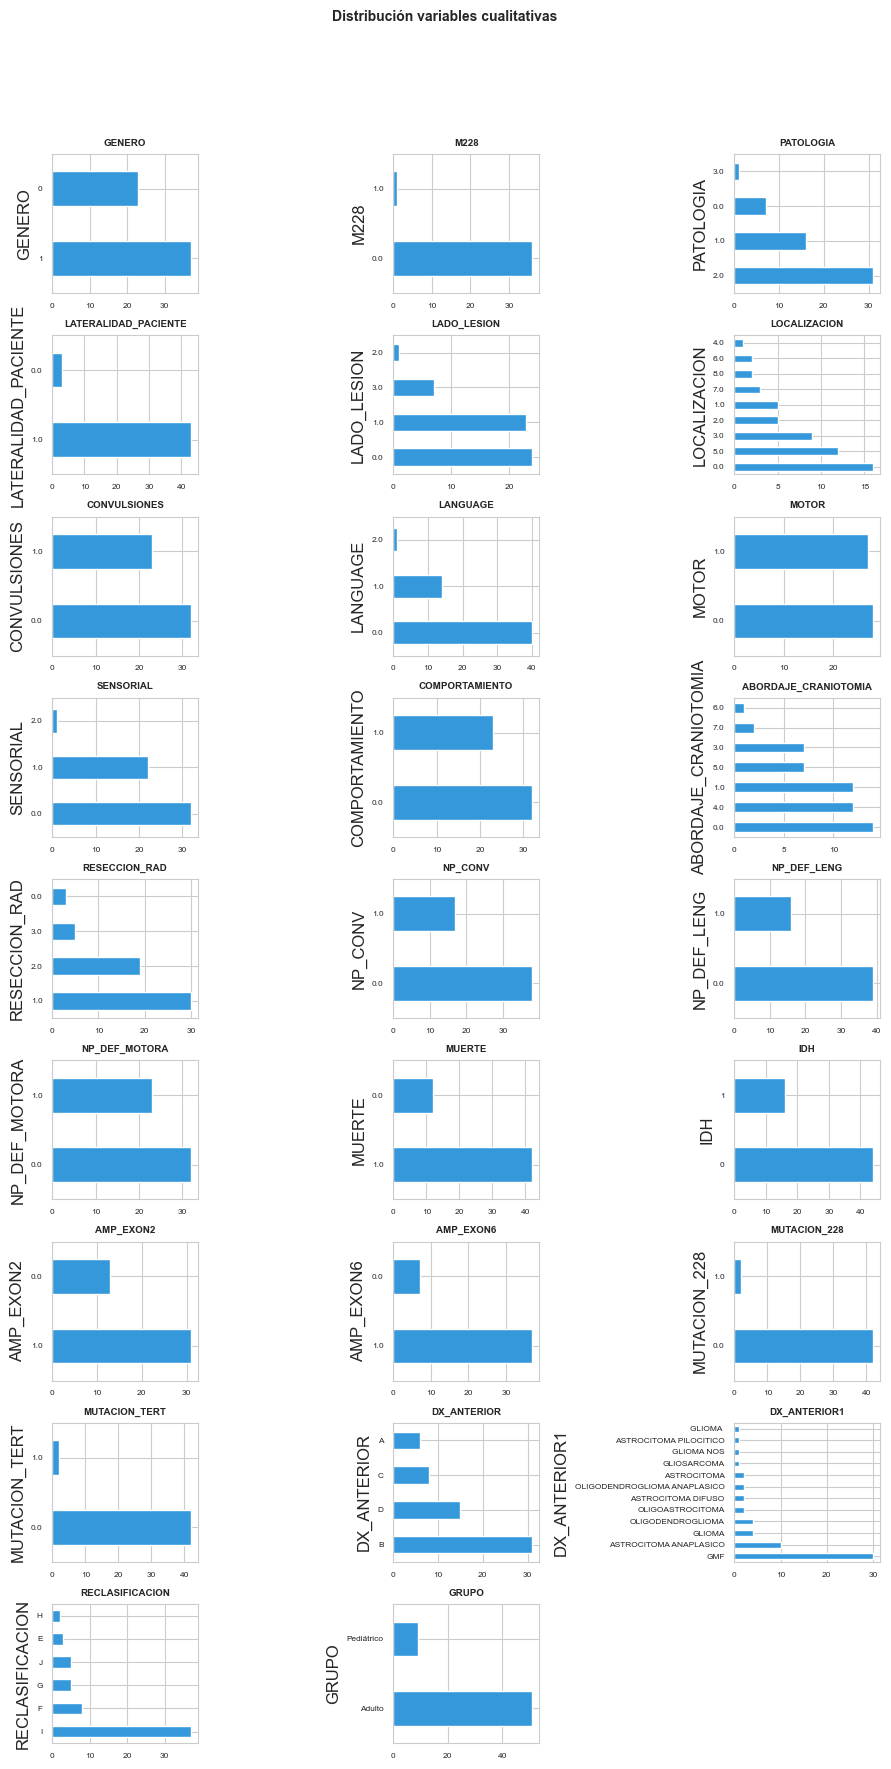

In [542]:
# Gráfico para cada variable cualitativa
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
# Seleccionar columnas cualitativas (object o category)
columnas_object = Data_Glio_cat.select_dtypes(include=['object', 'category']).columns

n = len(columnas_object)
ncols = 3
nrows = math.ceil(n / ncols)

# Crear figura y ejes
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*3, nrows*2))
axes = axes.flat

# Graficar conteos
for i, colum in enumerate(columnas_object):
    Data_Glio_cat[colum].value_counts().plot.barh(ax=axes[i])
    axes[i].set_title(colum, fontsize=7, fontweight="bold")
    axes[i].tick_params(labelsize=6)
    axes[i].set_xlabel("")

# Eliminar subplots vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize=10, fontweight="bold");


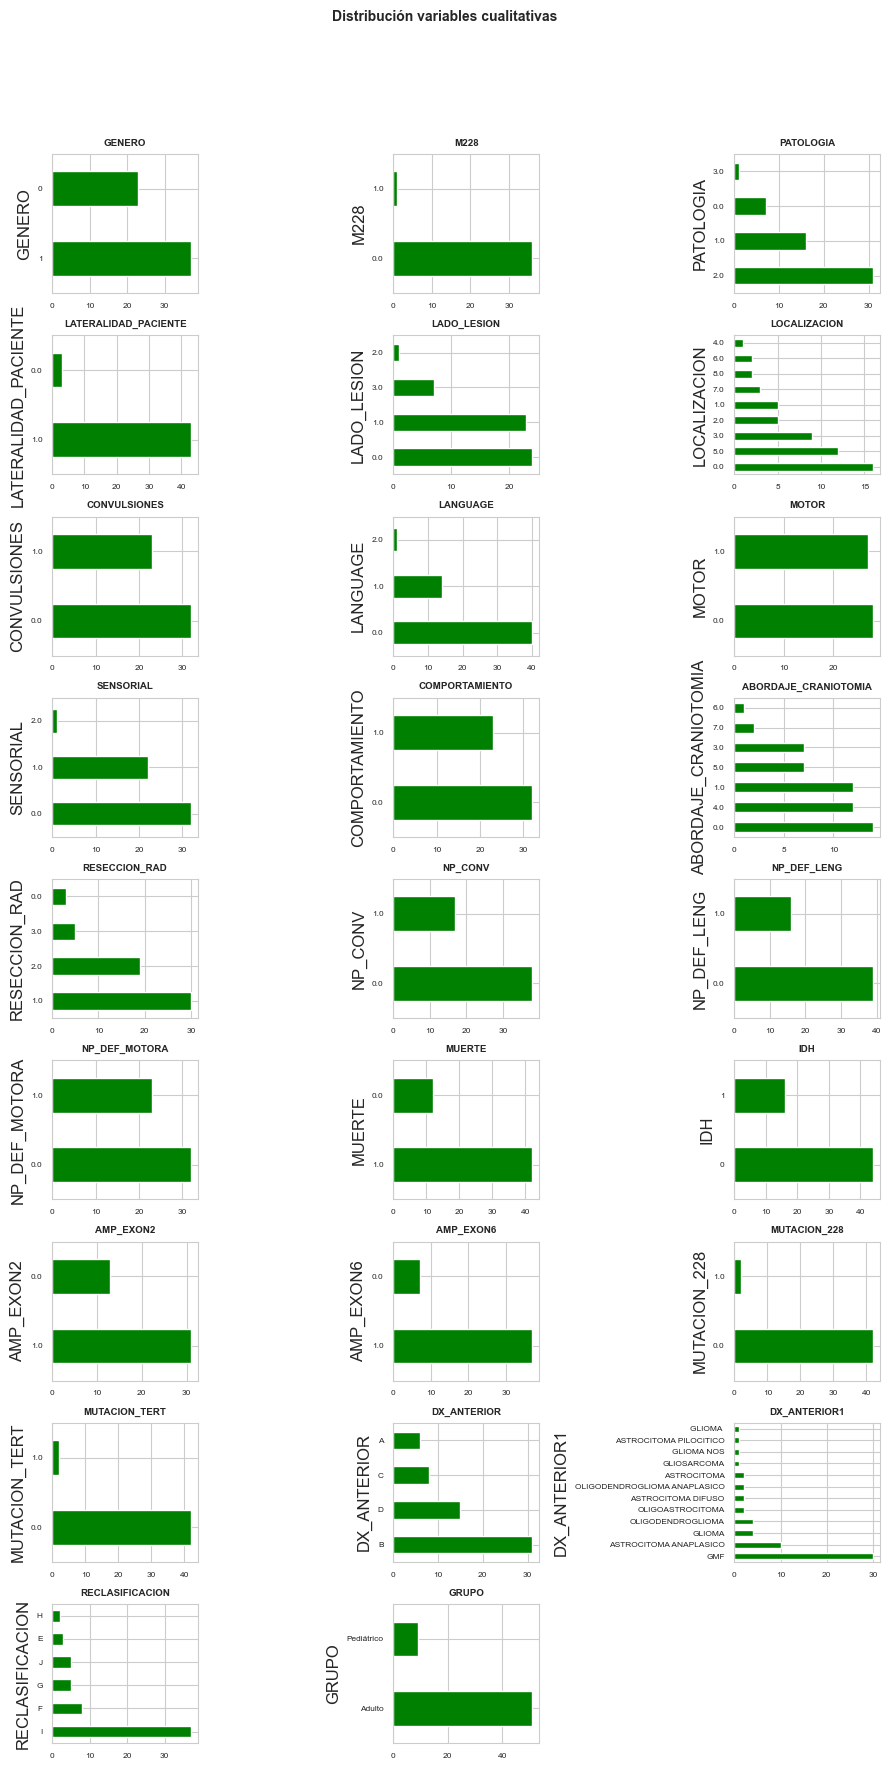

In [543]:
# Gráfico para cada variable cualitativa
# ==============================================================================
import math
import matplotlib.pyplot as plt

# Seleccionar columnas cualitativas (object o category)
columnas_object = Data_Glio_cat.select_dtypes(include=['object', 'category']).columns

n = len(columnas_object)
ncols = 3
nrows = math.ceil(n / ncols)

# Crear figura y ejes
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*3, nrows*2))
axes = axes.flat

# Graficar conteos en verde
for i, colum in enumerate(columnas_object):
    Data_Glio_cat[colum].value_counts().plot.barh(
        ax=axes[i], 
        color='green'      
    )
    axes[i].set_title(colum, fontsize=7, fontweight="bold")
    axes[i].tick_params(labelsize=6)
    axes[i].set_xlabel("")

# Eliminar subplots vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize=10, fontweight="bold")

plt.show()


In [453]:
Data_Glio_cat['PATOLOGIA'].value_counts().sort_index()

PATOLOGIA
0.0     7
1.0    16
2.0    31
3.0     1
Name: count, dtype: int64

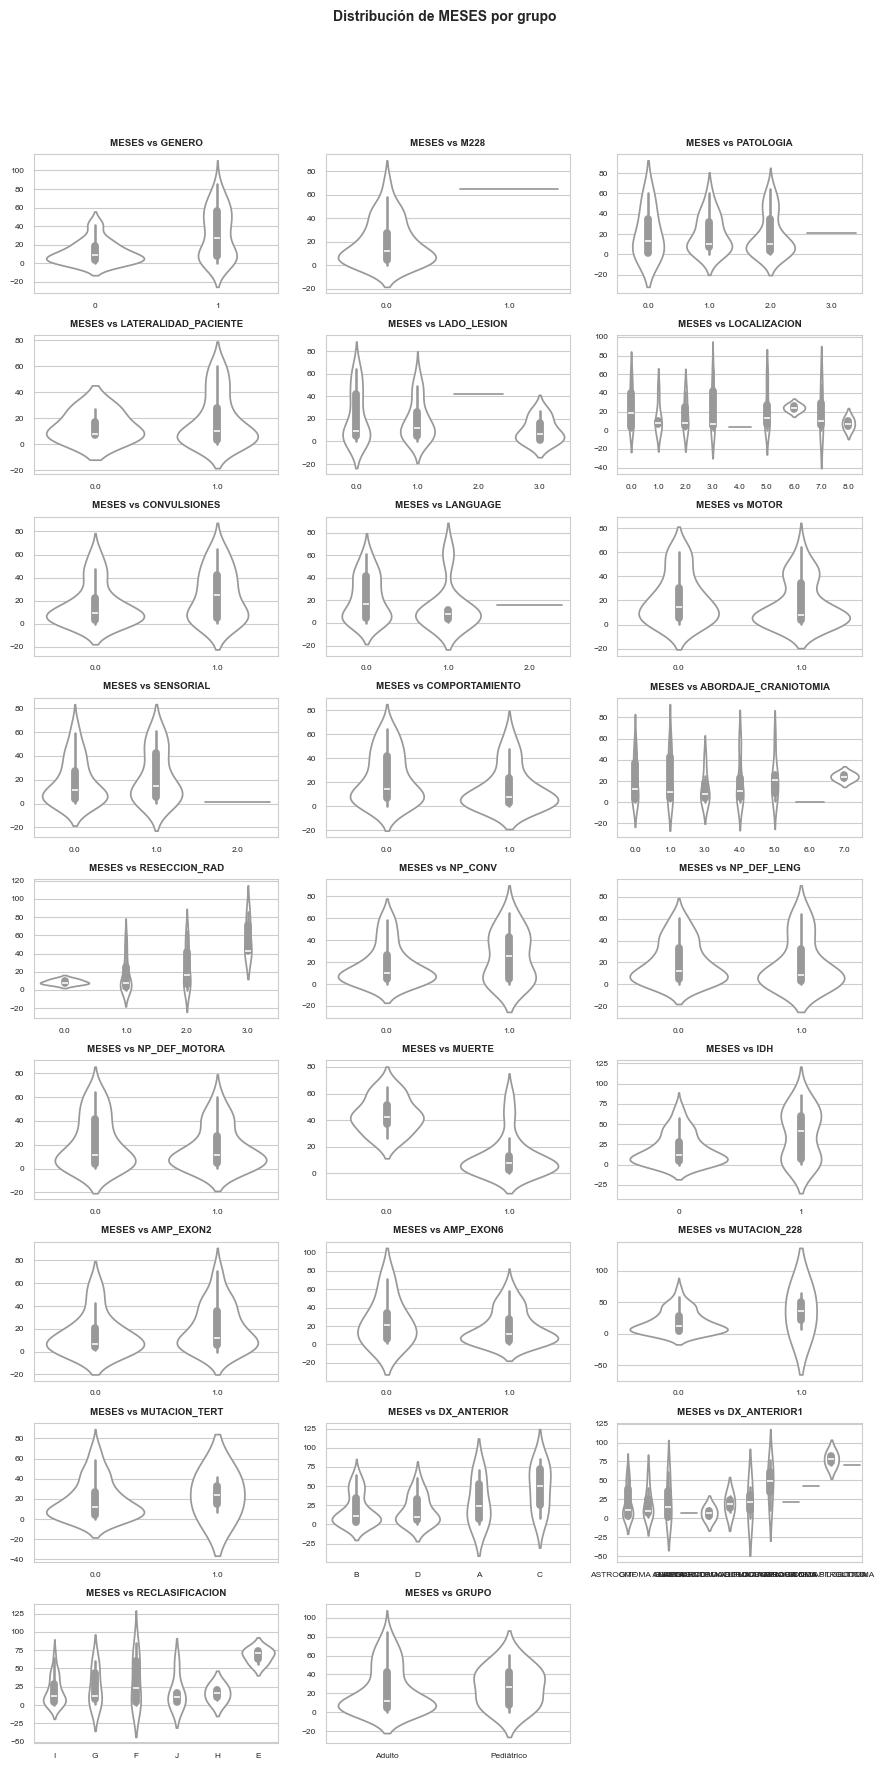

In [454]:
# Gráfico relación entre el MESES y cada cada variables cualitativas
# ==============================================================================
# Seleccionar variables cualitativas (object o category)
columnas_object = Data_Glio_cat.select_dtypes(include=['object', 'category']).columns

n = len(columnas_object)
ncols = 3
nrows = math.ceil(n / ncols)

# Crear figura y ejes
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*3, nrows*2))
axes = axes.flat

# Graficar relación entre cada variable cualitativa y MESES
for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'MESES',
        data  = data_glio,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"MESES vs {colum}", fontsize=7, fontweight="bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize=6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Eliminar subplots vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución de MESES por grupo',
             fontsize=10, fontweight="bold");


## Análisis puro de Sobrevida (Genero y Grupo)


El estimador de Kaplan-Meier es una estadística no paramétrica que se utiliza para estimar la función de supervivencia (probabilidad de que una persona sobreviva) a partir de los datos de toda la vida

#### Genero

In [455]:
#Organizar nuestros datos
dataset = data_glio.copy()  # Para no dañar la estructura original
# Crear dos objetos de Kaplan-Meier-Fitter ()
Kmf_m = KaplanMeierFitter()
Kmf_f = KaplanMeierFitter()
# Se dividen los grupos
Male = dataset.query('GENERO == 1')
Female = dataset.query('GENERO == 0')

In [456]:
#Datos masculinos
Male.head()

,ORDEN,CODIGO,NOMBRE,IDENTIFICACION,GENERO,EDAD,M228,PATOLOGIA,LATERALIDAD_PACIENTE,LADO_LESION,LOCALIZACION,CONVULSIONES,LANGUAGE,MOTOR,SENSORIAL,COMPORTAMIENTO,PUNTUACION_KP,PUNTUACION_KP_INMEDIATO,SEGUIMIENTO_MUERTE,ABORDAJE_CRANIOTOMIA,DIAS_POSTOPERATORIO,RESECCION_RAD,NP_CONV,NP_DEF_LENG,NP_DEF_MOTORA,MUERTE,FECHA_CIRUGIA,FECHA_MUERTE,MESES,IDH,AMP_EXON2,AMP_EXON6,MUTACION_228,MUTACION_TERT,DX_ANTERIOR,DX_ANTERIOR1,RECLASIFICACION,RECLASIFICACION_EXP,GRUPO
0,1,1253-19,MONTALVO \tMARTINEZ \tCECILIA \t,51672926.0,1,57,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.9,0.8,Seguimiento hasta 2021 KPS 70,0.0,6.0,1.0,1.0,1.0,1.0,1.0,27/04/2019,21/11/2022,42.894737,0,0.0,0.0,0.0,0.0,B,GMF,I,GLIOBLASTOMA IDH WILDTYPE SIN ALTERACIONES MOL...,Adulto
2,3,6990-19,SERRANO \tMORENO\tJUDITH,51896732.0,1,51,0.0,2.0,1.0,1.0,7.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,En Seguimiento actual,1.0,5.0,2.0,1.0,0.0,0.0,0.0,05/11/2019,30/11/2023,48.881579,0,1.0,1.0,0.0,0.0,B,GMF,I,GLIOBLASTOMA IDH WILDTYPE CON AMPLIFICACION DE...,Adulto
3,4,7183-19,CANO \tGARZON\tNANCY\tESMERALDA,41645357.0,1,65,0.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.8,Paciente Fallecido,0.0,15.0,1.0,0.0,1.0,1.0,1.0,13/11/2019,07/11/2023,47.861842,0,1.0,1.0,0.0,0.0,B,GMF,I,GLIOBLASTOMA IDH WILTYPE CON AMPLIFICACION DEL...,Adulto
5,6,2388-20,CUCALON \tMENA \tLINA\tMARIA,52116248.0,1,47,NaN,2.0,1.0,1.0,5.0,0.0,0.0,1.0,1.0,0.0,1.0,0.9,En Seguimiento actual,4.0,5.0,2.0,0.0,0.0,0.0,0.0,18/03/2020,10/11/2023,43.815789,1,NaN,NaN,NaN,NaN,B,GMF,G,"ASTROCITOMA IDH MUTANTE, CODELECIÓN 1P19Q NEGA...",Adulto
6,7,5601-20,PERILLA \tPARIS\tLIGIA \tPATRICIA,51775295.0,1,55,NaN,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.9,En Seguimiento actual,0.0,6.0,2.0,1.0,0.0,1.0,0.0,19/08/2020,30/11/2023,39.407895,1,NaN,NaN,NaN,NaN,D,ASTROCITOMA ANAPLASICO,F,"ASTROCITOMA ANAPLASICO IDH MUTANTE, 1P19Q NO C...",Adulto


In [457]:
#Datos femeninos
Female.head()

,ORDEN,CODIGO,NOMBRE,IDENTIFICACION,GENERO,EDAD,M228,PATOLOGIA,LATERALIDAD_PACIENTE,LADO_LESION,LOCALIZACION,CONVULSIONES,LANGUAGE,MOTOR,SENSORIAL,COMPORTAMIENTO,PUNTUACION_KP,PUNTUACION_KP_INMEDIATO,SEGUIMIENTO_MUERTE,ABORDAJE_CRANIOTOMIA,DIAS_POSTOPERATORIO,RESECCION_RAD,NP_CONV,NP_DEF_LENG,NP_DEF_MOTORA,MUERTE,FECHA_CIRUGIA,FECHA_MUERTE,MESES,IDH,AMP_EXON2,AMP_EXON6,MUTACION_228,MUTACION_TERT,DX_ANTERIOR,DX_ANTERIOR1,RECLASIFICACION,RECLASIFICACION_EXP,GRUPO
1,2,5174-19,CONTRERAS\tCARVAJAL \tCESAR\tARMANDO,17006284.0,0,83,0.0,2.0,1.0,0.0,5.0,0.0,1.0,1.0,0.0,0.0,1.0,0.9,Paciente Fallecido,4.0,6.0,2.0,0.0,1.0,1.0,1.0,05/09/2019,04/09/2020,12.006579,0,1.0,1.0,0.0,0.0,B,GMF,I,GLIOBLASTOMA IDH WILDTYPE CON AMPLIFICACION DE...,Adulto
4,5,2264-20,TELLEZ\tTELLEZ \tJULIO \tCESAR,19148322.0,0,68,0.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.9,0.9,Paciente Fallecido,0.0,10.0,2.0,0.0,0.0,0.0,1.0,14/03/2020,06/06/2020,2.763158,0,1.0,1.0,0.0,0.0,B,GMF,I,GLIOBLASTOMA IDH WILDTYPE CON AMPLIFICACION DE...,Adulto
10,11,1613-21,ACUNA \tRODRIGUEZ \tSALVADOR,79152766.0,0,60,0.0,0.0,1.0,1.0,5.0,0.0,0.0,0.0,1.0,1.0,0.9,0.7,Paciente Fallecido,4.0,8.0,2.0,0.0,0.0,1.0,1.0,11/03/2021,24/04/2022,13.453947,0,1.0,1.0,0.0,0.0,D,ASTROCITOMA DIFUSO,I,GLIOBLASTOMA IDH WILDTYPE CON AMPLIFICACION DE...,Adulto
16,24,4004-23,GARIBELLO \tRODRIGUEZ \tFERNANDO,17165183.0,0,76,NaN,1.0,1.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.6,0.3,Paciente Fallecido,3.0,NaN,1.0,1.0,1.0,1.0,1.0,12/05/2023,31/05/2023,0.625000,1,NaN,NaN,NaN,NaN,D,ASTROCITOMA,F,"ASTROCITOMA IDH MUTANTE, 1P19Q NO CODELECIONAD...",Adulto
17,26,3021-15,JUAN JOSE MENDEZ MATEUS,1101175947.0,0,7,0.0,1.0,1.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,Seguimiento hasta 2/12/2016,5.0,15.0,1.0,1.0,0.0,0.0,1.0,21/05/2015,01/08/2017,26.414474,0,1.0,1.0,0.0,0.0,D,ASTROCITOMA ANAPLASICO,I,GLIOBLASTOMA IDH WILDTYPE CON AMPLIFICACION DE...,Pediátrico


In [458]:
#Encajando los datos masculinos y femeninos en objetos.
Kmf_m.fit(Male['MESES'], label= "Masculino")
Kmf_f.fit(Female['MESES'], label= "Femenino")

<lifelines.KaplanMeierFitter:"Femenino", fitted with 23 total observations, 0 right-censored observations>

In [459]:
#Mesa de eventos para el grupo masculino:
Kmf_m.event_table #Tabla de eventos para el grupo de hombres.

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.000000,0,0,0,37,37
0.098684,1,1,0,0,37
0.361842,1,1,0,0,36
0.592105,1,1,0,0,35
1.480263,1,1,0,0,34
2.335526,1,1,0,0,33
3.223684,1,1,0,0,32
5.394737,1,1,0,0,31
6.546053,1,1,0,0,30


In [460]:
# Mesa de eventos para el grupo femenino:
Kmf_f.event_table #Tabla de eventos para el grupo de mujeres.

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.000000,0,0,0,23,23
0.328947,1,1,0,0,23
0.625000,1,1,0,0,22
1.151316,2,2,0,0,21
1.315789,1,1,0,0,19
2.763158,1,1,0,0,18
3.223684,1,1,0,0,17
4.046053,1,1,0,0,16
4.539474,1,1,0,0,15


In [461]:
# Predecir probabilidades de supervivencia:

# Ahora podemos predecir la probabilidad de supervivencia de ambos grupos.
Kmf_m.predict(10) #Predicción del valor en función del tiempo.


np.float64(0.6216216216216217)

In [462]:
Kmf_f.predict(10) #Predicción del valor en función del tiempo.

np.float64(0.47826086956521746)

In [463]:
# Lista completa de probabilidades de supervivencia:

# a) Probabilidad de supervivencia para un grupo de hombres:
Kmf_m.survival_function_  #Obtenga datos completos de la función de supervivencia para el grupo de hombres.

,Masculino
timeline,
0.000000,1.000000
0.098684,0.972973
0.361842,0.945946
0.592105,0.918919
1.480263,0.891892
2.335526,0.864865
3.223684,0.837838
5.394737,0.810811
6.546053,0.783784


In [464]:
Kmf_f.survival_function_  #Obtenga datos completos de la función de supervivencia para el grupo de mujeres.

,Femenino
timeline,
0.000000,1.000000
0.328947,0.956522
0.625000,0.913043
1.151316,0.826087
1.315789,0.782609
2.763158,0.739130
3.223684,0.695652
4.046053,0.652174
4.539474,0.608696


Text(0.5, 1.0, 'KMF')

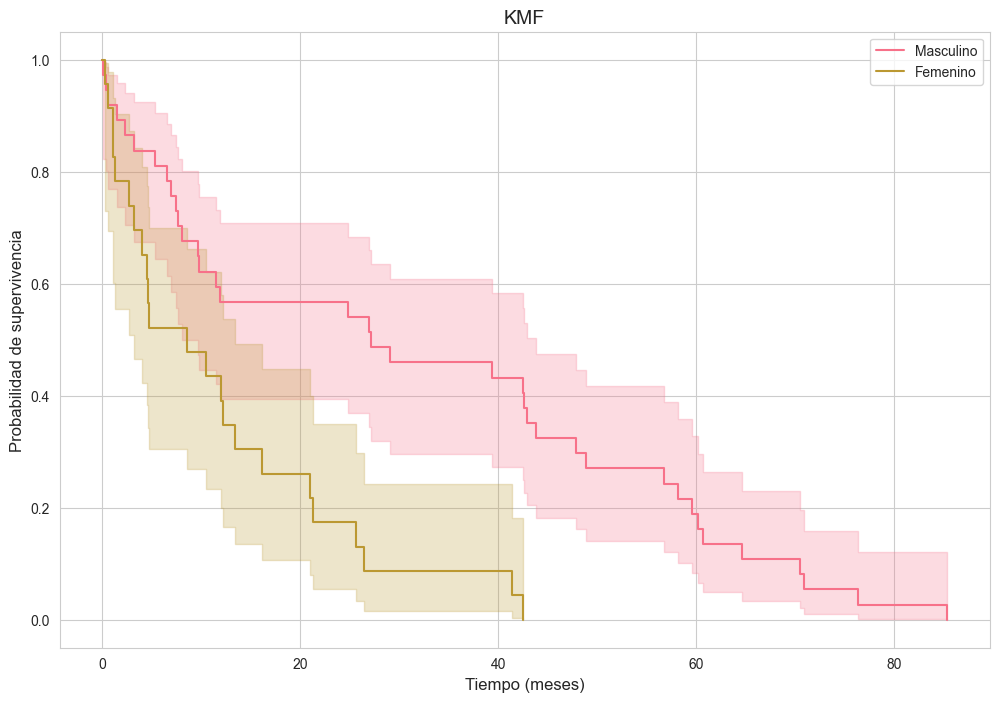

In [465]:
#Gráfica de probabilidades de supervivencia:

Kmf_m.plot() #Gráfica de supervivencia para el grupo de hombres.
Kmf_f.plot() #Gráfica de supervivencia para el grupo de mujeres.
plt.xlabel("Tiempo (meses)")
plt.ylabel("Probabilidad de supervivencia")
plt.title("KMF")

Aquí podemos notar que la probabilidad de que las mujeres sobrevivan a Gliomas es menor que la de los hombres. Por lo tanto, a partir de estos datos, podemos decir que los investigadores médicos deberían centrarse más en los factores que conducen a las bajas tasas de supervivencia de los pacientes femeninos.

In [466]:
#Obtenga la densidad acumulativa:

# a) Para el grupo masculino:
Kmf_m.cumulative_density_ #Obtenga la densidad acumulativa para el grupo de hombres.

,Masculino
timeline,
0.000000,0.000000
0.098684,0.027027
0.361842,0.054054
0.592105,0.081081
1.480263,0.108108
2.335526,0.135135
3.223684,0.162162
5.394737,0.189189
6.546053,0.216216


In [467]:
# b) Para el grupo femenino:
Kmf_f.cumulative_density_ #Obtenga la densidad acumulativa para el grupo de mujeres.

,Femenino
timeline,
0.000000,0.000000
0.328947,0.043478
0.625000,0.086957
1.151316,0.173913
1.315789,0.217391
2.763158,0.260870
3.223684,0.304348
4.046053,0.347826
4.539474,0.391304


Text(0.5, 1.0, 'Densidad acumulada')

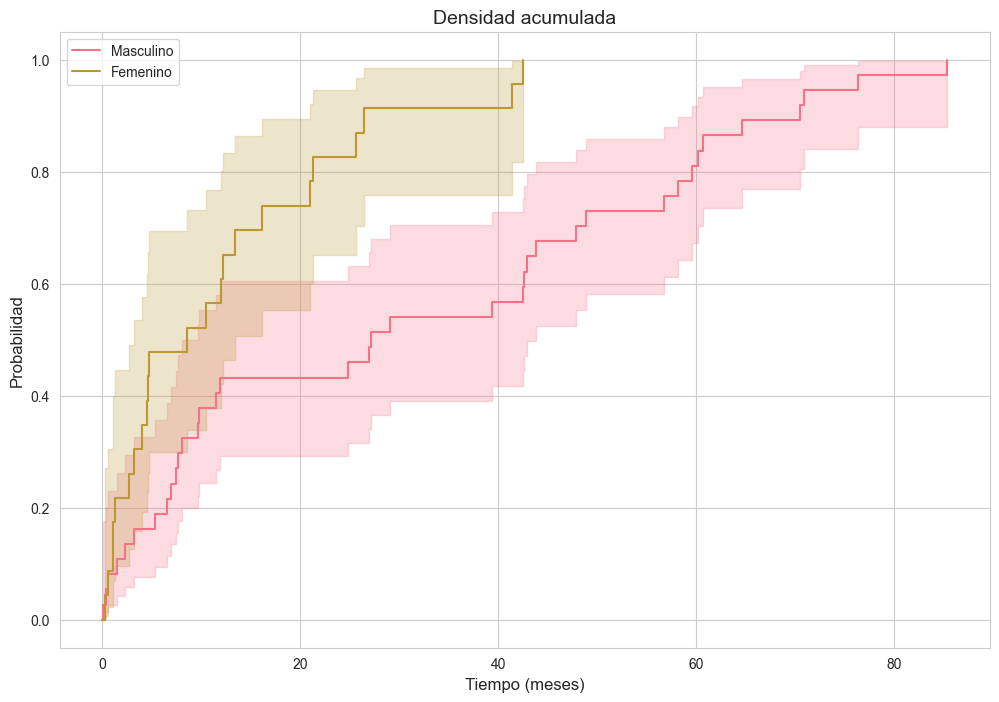

In [468]:
# Gráfico de densidad acumulada:

Kmf_m.plot_cumulative_density() #Gráfica de densidad acumulada para el grupo de hombres.
Kmf_f.plot_cumulative_density() #Gráfica de densidad acumulada para el grupo de mujeres.
plt.xlabel("Tiempo (meses)")
plt.ylabel("Probabilidad")
plt.title("Densidad acumulada")

####  Prueba de rango logarítmico

La prueba de rango logarítmico es una prueba de hipótesis que se utiliza para comparar la distribución de supervivencia de dos muestras.

Objetivo: Nuestro objetivo es ver si existe alguna diferencia significativa entre los grupos que se comparan.

Hipótesis nula : La hipótesis nula establece que no hay diferencia significativa entre los grupos estudiados. Si hay una diferencia significativa entre esos grupos, entonces tenemos que rechazar nuestra hipótesis nula.

In [469]:
# 1) Obtener las variables para la prueba de rango logarítmico:
# Definición de las variables para la prueba de rango logarítmico.

TimeA = Male['MESES']
TimeB = Female['MESES']

In [470]:
# Realización de la prueba de rango logarítmico.
from lifelines.statistics import logrank_test
results = logrank_test(TimeA, TimeB)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          13.25 <0.005     11.84

In [471]:
# p-valor

results.p_value

np.float64(0.00027204444864642225)

Hemos comparado las distribuciones de supervivencia de dos grupos diferentes utilizando el método estadístico, la prueba de rango logarítmico. Aquí podemos notar que el valor p es 0.325475 (> 0.005) para nuestros grupos, lo que denota que tenemos que aceptar la hipótesis nula y admitir que la función de supervivencia para ambos grupos es significativamente parecida. Los valores p nos dan una fuerte evidencia de que el "sexo" se asoció con el número de días de supervivencia. En resumen, podemos decir que el "sexo" de una persona marca una igualdad significativa en la probabilidad de supervivencia.

## Modelo de riesgo proporcional de Cox

El modelo de riesgo proporcional de Cox es un modelo de regresión generalmente utilizado por investigadores médicos para determinar la relación entre el tiempo de supervivencia de un sujeto y una o más variables predictoras. En resumen, queremos averiguar cómo diferentes parámetros como la edad, el sexo, grupo, condiciones clinicas y del paciente.

In [472]:
# Importe las bibliotecas necesarias:

from lifelines import CoxPHFitter

In [473]:
# CARGAR DATOS
# -------------------------------------------------------------------
dataset2 = data_glio.copy()  # Para no dañar la estructura original


In [474]:
# Eliminar filas con valores nulos.
dataset2 = dataset2.dropna( subset= ['MESES', "GENERO", "EDAD", "PATOLOGIA", "LADO_LESION", "LOCALIZACION",
    "CONVULSIONES", "LANGUAGE", "MOTOR","SENSORIAL", "COMPORTAMIENTO", "ABORDAJE_CRANIOTOMIA", "RESECCION_RAD",
    "NP_CONV", "NP_DEF_LENG", "NP_DEF_MOTORA",
    "IDH", "GRUPO"])

In [475]:
# Objeto para KapanMeierFitter:
Kmf = KaplanMeierFitter()

In [476]:
# Ajustar los datos a un objeto.
Kmf.fit(dataset2['MESES'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 55 total observations, 0 right-censored observations>

In [477]:
# Generando la tabla de eventos.
Kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.000000,0,0,0,55,55
0.098684,1,1,0,0,55
0.328947,1,1,0,0,54
0.361842,1,1,0,0,53
0.592105,1,1,0,0,52
0.625000,1,1,0,0,51
1.151316,2,2,0,0,50
1.315789,1,1,0,0,48
1.480263,1,1,0,0,47


In [478]:
# Columnas requeridas de los datos

dataset2 = dataset2[['MESES', "GENERO", "EDAD", "PATOLOGIA", "LADO_LESION", "LOCALIZACION",
    "CONVULSIONES", "LANGUAGE", "MOTOR","SENSORIAL", "COMPORTAMIENTO", "ABORDAJE_CRANIOTOMIA", "RESECCION_RAD",
    "NP_CONV", "NP_DEF_LENG", "NP_DEF_MOTORA",
    "IDH"]]

In [479]:
#Resumen usando CoxPHFitter.
cph = CoxPHFitter()
cph.fit(dataset2, duration_col='MESES')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 55 total observations, 0 right-censored observations>
             duration col = 'MESES'
      baseline estimation = breslow
   number of observations = 55
number of events observed = 55
   partial log-likelihood = -153.91
         time fit was run = 2025-07-24 04:09:42 UTC

---
                      coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                             
GENERO               -1.57      0.21      0.46           -2.48           -0.66                0.08                0.52
EDAD                  0.01      1.01      0.01           -0.01            0.03                0.99                1.03
PATOLOGIA            -0.43      0.65      0.27           -0.96            0.09                0.38                1.10
LADO_LESION           0.07      1.07      0.22           -0.36            0.50                0.70                1.65
LOCALIZACION          0.04      1.04      0.08           -0.12            0.19                0.89                1.22
CONVULSIONES          0.24      1.27      0.49           -0.71            1.20                0.49                3.31
LANGUAGE              0.17      1.18      0.40           -0.61            0.94                0.54                2.57
MOTOR                 0.76      2.13      0.37            0.03            1.48                1.03                4.39
SENSORIAL            -0.29      0.75      0.42           -1.12            0.53                0.33                1.70
COMPORTAMIENTO       -0.11      0.90      0.41           -0.92            0.70                0.40                2.01
ABORDAJE_CRANIOTOMIA -0.11      0.90      0.09           -0.29            0.07                0.75                1.07
RESECCION_RAD        -0.80      0.45      0.27           -1.34           -0.27                0.26                0.77
NP_CONV              -0.73      0.48      0.57           -1.84            0.39                0.16                1.48
NP_DEF_LENG          -0.57      0.56      0.48           -1.51            0.36                0.22                1.43
NP_DEF_MOTORA         0.08      1.08      0.44           -0.79            0.95                0.45                2.58
IDH                   0.03      1.03      0.40           -0.76            0.82                0.47                2.27

                      cmp to     z      p  -log2(p)
covariate                                          
GENERO                  0.00 -3.38 <0.005     10.44
EDAD                    0.00  1.16   0.24      2.03
PATOLOGIA               0.00 -1.61   0.11      3.21
LADO_LESION             0.00  0.32   0.75      0.42
LOCALIZACION            0.00  0.46   0.64      0.64
CONVULSIONES            0.00  0.49   0.62      0.69
LANGUAGE                0.00  0.42   0.67      0.57
MOTOR                   0.00  2.05   0.04      4.61
SENSORIAL               0.00 -0.70   0.49      1.04
COMPORTAMIENTO          0.00 -0.27   0.79      0.34
ABORDAJE_CRANIOTOMIA    0.00 -1.22   0.22      2.17
RESECCION_RAD           0.00 -2.93 <0.005      8.20
NP_CONV                 0.00 -1.28   0.20      2.31
NP_DEF_LENG             0.00 -1.21   0.23      2.14
NP_DEF_MOTORA           0.00  0.18   0.86      0.22
IDH                     0.00  0.08   0.94      0.09
---
Concordance = 0.70
Partial AIC = 339.83
log-likelihood ratio test = 28.83 on 16 df
-log2(p) of ll-ratio test = 5.31

Observe el valor p para cada columna en nuestro conjunto de datos. A continuación, sabemos que un valor de p < 0,05 se considera estadísticamente significativo. Aquí podemos ver que "ABORDAJE_CRANIOTOMIA", "RESECCION_RAD", "NP_CONV" y "NP_DEF_LENG" tienen valores de p menores a 0.05. Entonces, podemos decir que al agrupar nuestros datos para el análisis, debemos centrarnos en dividir los datos en función de estos cuatro factores.

Aquí observe que el valor p para "ABORDAJE_CRANIOTOMIA" es 0.03, y el Hazard Ratio (HR) es 0.71, lo que indica una fuerte relación entre el tipo de intervención neuroquirúrgica según la región del craneo accedida de los pacientes y un menor riesgo de muerte. Por ejemplo, si se mantienen constantes las otras covariables, si se tiene una región del cráneo caracterizada como mayor se reduce el riesgo de 0.71, o 29%.


<Axes: xlabel='log(HR) (95% CI)'>

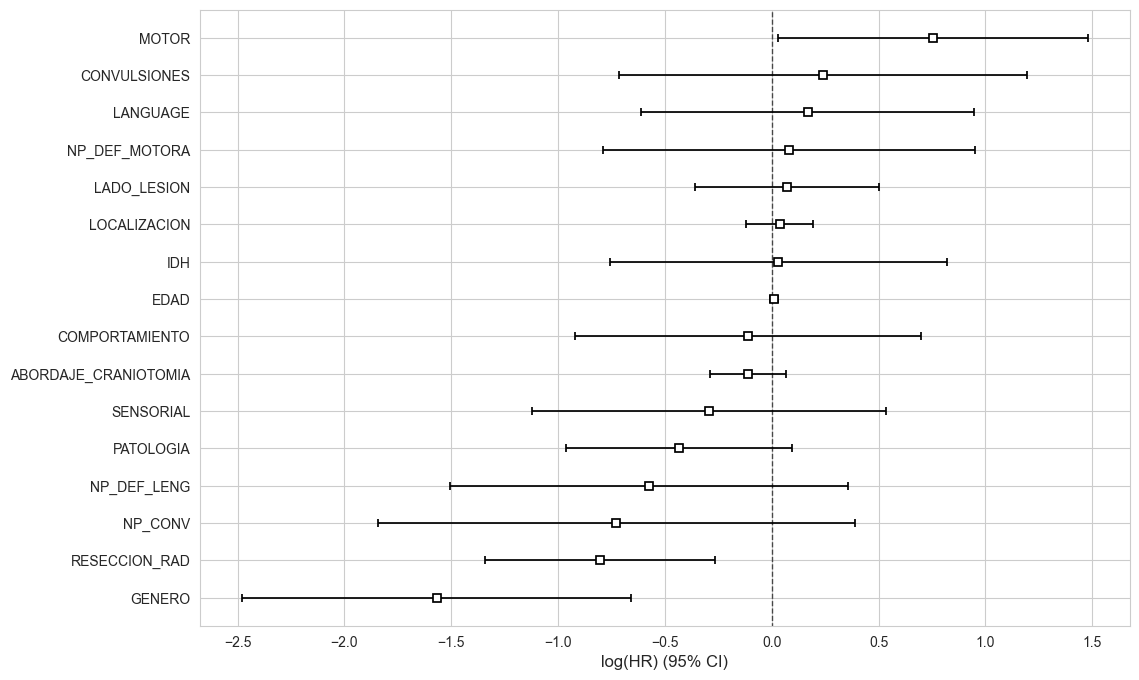

In [480]:
# En el siguiente gráfico, podemos notar la diferencia en los datos

cph.plot()


In [481]:
# Comprobemos nuestras conclusiones con datos reales de nuestras observaciones.
dataset2.iloc[3:11,:]

,MESES,GENERO,EDAD,PATOLOGIA,LADO_LESION,LOCALIZACION,CONVULSIONES,LANGUAGE,MOTOR,SENSORIAL,COMPORTAMIENTO,ABORDAJE_CRANIOTOMIA,RESECCION_RAD,NP_CONV,NP_DEF_LENG,NP_DEF_MOTORA,IDH
3,47.861842,1,65,2.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0
4,2.763158,0,68,2.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0
5,43.815789,1,47,2.0,1.0,5.0,0.0,0.0,1.0,1.0,0.0,4.0,2.0,0.0,0.0,0.0,1
6,39.407895,1,55,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1
7,2.335526,1,64,0.0,3.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
8,7.434211,1,67,2.0,0.0,5.0,0.0,1.0,0.0,0.0,1.0,4.0,2.0,0.0,1.0,0.0,0
9,0.098684,1,3,0.0,1.0,5.0,0.0,0.0,0.0,1.0,1.0,4.0,1.0,1.0,0.0,1.0,0
10,13.453947,0,60,0.0,1.0,5.0,0.0,0.0,0.0,1.0,1.0,4.0,2.0,0.0,0.0,1.0,0


<Axes: >

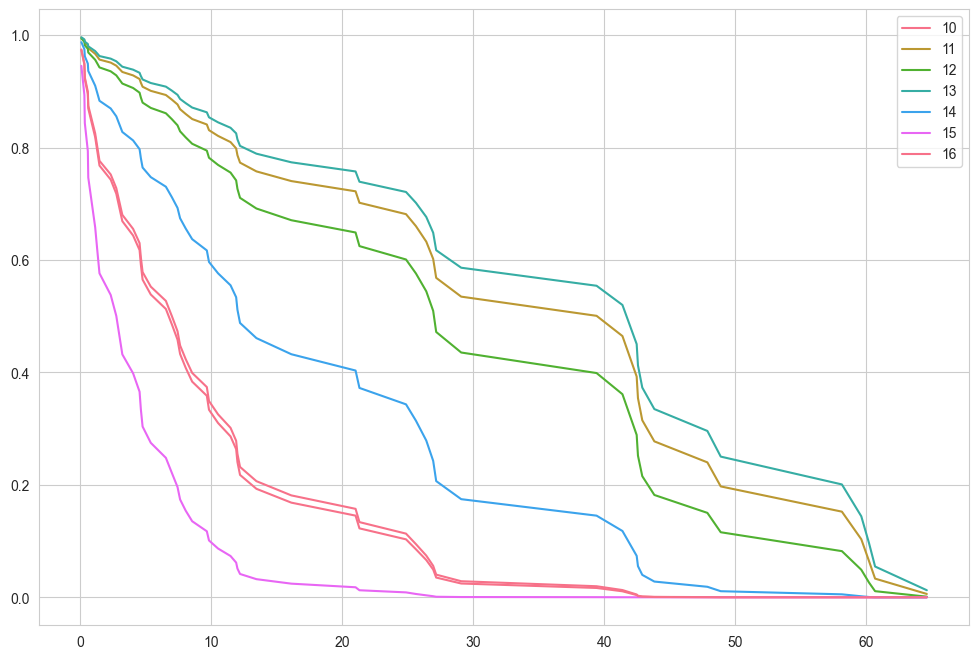

In [482]:
d_data = dataset2.iloc[10:17,:]
cph.predict_survival_function(d_data).plot()

En el gráfico anterior, podemos ver que la persona 10 tiene la mayor probabilidad de sobrevivir, mientras que la persona 14 tiene la menor posibilidad de sobrevivir.

También podemos ver que las personas de 10 y 14 tienen mayores posibilidades de supervivencia ya que tienen un abordaje de cramiotomia en 1 (Parietal) y una Resección radiologica 3 (Total) que es una remoción completa del tumor visible en resonancia magnética.

## Importancia de Variables: algoritmo ExtraTreesClassifier

In [483]:
# CARGAR DATOS
# -------------------------------------------------------------------
dataset = data_glio.copy()  # Para no dañar la estructura original

# Variables a eliminar
cols_to_drop = [
    'SEGUIMIENTO_MUERTE',
    'FECHA_CIRUGIA',
    'FECHA_MUERTE',
    'DX_ANTERIOR',
    'DX_ANTERIOR1',
    'RECLASIFICACION',
    'RECLASIFICACION_EXP', "MUERTE"
]

# Elimina esas columnas si existen en el dataset
dataset = dataset.drop(columns=cols_to_drop, errors='ignore')

# Opcional: elimina las primeras 4 columnas (si aún hay ID, código, etc.)
dataset = dataset.iloc[:, 4:]  # Selecciona desde la columna 4 en adelante

# Elimina columnas que tengan datos de tipo texto (string / object)
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        del dataset[col]  # Elimina columnas con texto

clase_name = 'MESES'  # nombre de variable a predecir
headers = dataset.columns.values.tolist()
headers.remove(clase_name)

clase = dataset[clase_name].tolist()  # Variable objetivo
clase = np.array(clase)

# Elimina la clase del dataset para usar como X
dataset = dataset.drop(clase_name, axis=1).values  # Convierte a numpy array


# MODELO
# -------------------------------------------------------------------
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor(n_estimators=50, random_state=42)
model.fit(dataset, clase)


# IMPORTANCIA DE VARIABLES
# -------------------------------------------------------------------
import pandas as pd

var_imp = pd.DataFrame({
    'feature': headers,
    'v_importance': model.feature_importances_.tolist()
})

print(var_imp.sort_values(by='v_importance', ascending=False))

                    feature  v_importance
16            RESECCION_RAD      0.218272
0                    GENERO      0.101625
15      DIAS_POSTOPERATORIO      0.083372
10                SENSORIAL      0.078712
1                      EDAD      0.072436
13  PUNTUACION_KP_INMEDIATO      0.057095
3                 PATOLOGIA      0.048862
20                      IDH      0.044634
18              NP_DEF_LENG      0.038874
14     ABORDAJE_CRANIOTOMIA      0.035340
6              LOCALIZACION      0.032119
8                  LANGUAGE      0.027162
17                  NP_CONV      0.025478
9                     MOTOR      0.021905
22                AMP_EXON6      0.021282
5               LADO_LESION      0.021212
12            PUNTUACION_KP      0.014873
21                AMP_EXON2      0.012686
19            NP_DEF_MOTORA      0.012635
11           COMPORTAMIENTO      0.011341
7              CONVULSIONES      0.006402
2                      M228      0.005062
23             MUTACION_228      0

El análisis de importancia de variables mediante ExtraTreesRegressor mostró que los déficits neurológicos postoperatorios (especialmente en el lenguaje), la edad del paciente y la extensión de la resección quirúrgica son los principales predictores de la sobrevida en este grupo de pacientes.

### Clasificación por grupos

In [484]:
# CARGAR DATOS
# -------------------------------------------------------------------
dataset = data_glio.copy()  # Para no dañar la estructura original

# Variables a eliminar
cols_to_drop = [
    'SEGUIMIENTO_MUERTE',
    'FECHA_CIRUGIA',
    'FECHA_MUERTE',
    'DX_ANTERIOR',
    'DX_ANTERIOR1',
    'RECLASIFICACION',
    'RECLASIFICACION_EXP' , "MUERTE"
]

# Elimina esas columnas si existen en el dataset
dataset = dataset.drop(columns=cols_to_drop, errors='ignore')

# Opcional: elimina las primeras 4 columnas (si aún hay ID, código, etc.)
dataset = dataset.iloc[:, 4:]  # Selecciona desde la columna 4 en adelante

# Elimina columnas que tengan datos de tipo texto (string / object)
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        del dataset[col]  # Elimina columnas con texto

clase_name = 'MESES'  # nombre de variable a predecir
headers = dataset.columns.values.tolist()
headers.remove(clase_name)

clase = dataset[clase_name].tolist()  # Variable objetivo
clase = np.array(clase)

# Elimina la clase del dataset para usar como X
dataset = dataset.drop(clase_name, axis=1).values  # Convierte a numpy array


# MODELO
# -------------------------------------------------------------------
from sklearn.ensemble import ExtraTreesRegressor

model1 = ExtraTreesRegressor(n_estimators=50, random_state=42)
model1.fit(dataset, clase)


# IMPORTANCIA DE VARIABLES
# -------------------------------------------------------------------
import pandas as pd

var_imp = pd.DataFrame({
    'feature': headers,
    'v_importance': model1.feature_importances_.tolist()
})

# DEFINICIÓN DE GRUPOS
grupos = {
    'Grupo 1: Características del Paciente': ["GENERO", "EDAD", "PATOLOGIA","LATERALIDAD_PACIENTE", "LADO_LESION", "LOCALIZACION"],
    'Grupo 2: Manifestaciones Clínicas': ["CONVULSIONES", "LANGUAGE", "MOTOR","SENSORIAL", "COMPORTAMIENTO"],
    'Grupo 3: Medidas de Tratamiento': ["PUNTUACION_KP", "PUNTUACION_KP_INMEDIATO", "ABORDAJE_CRANIOTOMIA", "RESECCION_RAD"],
    'Grupo 4: Variables Postoperatorias': ["NP_CONV", "NP_DEF_LENG", "NP_DEF_MOTORA", "DIAS_POSTOPERATORIO"],
    'Grupo 5: Variables Moleculares': ["IDH", "AMP_EXON2", "AMP_EXON6","MUTACION_228", "MUTACION_TERT"]
}

# CALCULAR IMPORTANCIA POR GRUPO
importancia_por_grupo = {}

for grupo, variables in grupos.items():
    # Filtra las variables del grupo actual
    vars_grupo = var_imp[var_imp['feature'].isin(variables)]
    # Suma la importancia de las variables del grupo
    importancia_total = vars_grupo['v_importance'].sum()
    importancia_por_grupo[grupo] = importancia_total

# Convertir a DataFrame para mejor visualización
importancia_por_grupo_df = pd.DataFrame.from_dict(importancia_por_grupo, orient='index', columns=['Importancia Total'])
importancia_por_grupo_df = importancia_por_grupo_df.sort_values(by='Importancia Total', ascending=False)

print("Importancia total por grupo:")
print(importancia_por_grupo_df)

Importancia total por grupo:
                                       Importancia Total
Grupo 3: Medidas de Tratamiento                 0.325580
Grupo 1: Características del Paciente           0.278939
Grupo 4: Variables Postoperatorias              0.160360
Grupo 2: Manifestaciones Clínicas               0.145522
Grupo 5: Variables Moleculares                  0.084537


Ahora bien, internamente por grupos tenemos que:

In [485]:
# CARGAR DATOS
# -------------------------------------------------------------------
dataset = data_glio.copy()  # Para no dañar la estructura original

# Variables a eliminar
cols_to_drop = [
    'SEGUIMIENTO_MUERTE',
    'FECHA_CIRUGIA',
    'FECHA_MUERTE',
    'DX_ANTERIOR',
    'DX_ANTERIOR1',
    'RECLASIFICACION',
    'RECLASIFICACION_EXP', "MUERTE"
]

# Elimina esas columnas si existen en el dataset
dataset = dataset.drop(columns=cols_to_drop, errors='ignore')

# Opcional: elimina las primeras 4 columnas (si aún hay ID, código, etc.)
dataset = dataset.iloc[:, 4:]  # Selecciona desde la columna 4 en adelante

# Elimina columnas que tengan datos de tipo texto (string / object)
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        del dataset[col]  # Elimina columnas con texto

clase_name = 'MESES'  # nombre de variable a predecir
headers = dataset.columns.values.tolist()
headers.remove(clase_name)

clase = dataset[clase_name].tolist()  # Variable objetivo
clase = np.array(clase)

# Elimina la clase del dataset para usar como X
dataset = dataset.drop(clase_name, axis=1).values  # Convierte a numpy array


# MODELO
# -------------------------------------------------------------------
from sklearn.ensemble import ExtraTreesRegressor

model2 = ExtraTreesRegressor(n_estimators=50, random_state=42)
model2.fit(dataset, clase)


# IMPORTANCIA DE VARIABLES
# -------------------------------------------------------------------
import pandas as pd

var_imp = pd.DataFrame({
    'feature': headers,
    'v_importance': model2.feature_importances_.tolist()
})

# DEFINICIÓN DE GRUPOS
grupos = {
    'Grupo 1: Características del Paciente': ["GENERO", "EDAD", "PATOLOGIA","LATERALIDAD_PACIENTE", "LADO_LESION", "LOCALIZACION"],
    'Grupo 2: Manifestaciones Clínicas': ["CONVULSIONES", "LANGUAGE", "MOTOR","SENSORIAL", "COMPORTAMIENTO"],
    'Grupo 3: Medidas de Tratamiento': ["PUNTUACION_KP", "PUNTUACION_KP_INMEDIATO", "ABORDAJE_CRANIOTOMIA", "RESECCION_RAD"],
    'Grupo 4: Variables Postoperatorias': ["NP_CONV", "NP_DEF_LENG", "NP_DEF_MOTORA", "DIAS_POSTOPERATORIO"],
    'Grupo 5: Variables Moleculares': ["IDH", "AMP_EXON2", "AMP_EXON6","MUTACION_228", "MUTACION_TERT"]
}


# CALCULAR IMPORTANCIA DENTRO DE CADA GRUPO
importancia_por_grupo = {}

for grupo, variables in grupos.items():
    # Filtra las variables del grupo actual
    vars_grupo = var_imp[var_imp['feature'].isin(variables)]
    # Ordena las variables por importancia dentro del grupo
    vars_grupo_sorted = vars_grupo.sort_values(by='v_importance', ascending=False)
    importancia_por_grupo[grupo] = vars_grupo_sorted

# IMPRIMIR RESULTADOS
for grupo, vars_grupo in importancia_por_grupo.items():
    print(f"\n--- {grupo} ---")
    print(vars_grupo[['feature', 'v_importance']])


--- Grupo 1: Características del Paciente ---
                feature  v_importance
0                GENERO      0.101625
1                  EDAD      0.072436
3             PATOLOGIA      0.048862
6          LOCALIZACION      0.032119
5           LADO_LESION      0.021212
4  LATERALIDAD_PACIENTE      0.002685

--- Grupo 2: Manifestaciones Clínicas ---
           feature  v_importance
10       SENSORIAL      0.078712
8         LANGUAGE      0.027162
9            MOTOR      0.021905
11  COMPORTAMIENTO      0.011341
7     CONVULSIONES      0.006402

--- Grupo 3: Medidas de Tratamiento ---
                    feature  v_importance
16            RESECCION_RAD      0.218272
13  PUNTUACION_KP_INMEDIATO      0.057095
14     ABORDAJE_CRANIOTOMIA      0.035340
12            PUNTUACION_KP      0.014873

--- Grupo 4: Variables Postoperatorias ---
                feature  v_importance
15  DIAS_POSTOPERATORIO      0.083372
18          NP_DEF_LENG      0.038874
17              NP_CONV      0.025478

In [486]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# CARGAR DATOS
# -------------------------------------------------------------------
dataset = data_glio.copy()

# COLUMNAS A ELIMINAR
cols_to_drop = [
    'SEGUIMIENTO_MUERTE',
    'FECHA_CIRUGIA',
    'FECHA_MUERTE',
    'DX_ANTERIOR',
    'DX_ANTERIOR1',
    'RECLASIFICACION',
    'RECLASIFICACION_EXP', "MUERTE"
]
dataset = dataset.drop(columns=cols_to_drop, errors='ignore')

# OPCIONAL: eliminar primeras 4 columnas si son IDs u otros no útiles
dataset = dataset.iloc[:, 4:]

# VARIABLE OBJETIVO
clase_name = 'MESES'
X = dataset.drop(columns=[clase_name])
y = dataset[clase_name].values

# DETECTAR VARIABLES CATEGÓRICAS
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()

# PREPROCESAMIENTO: codificar variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ],
    remainder='passthrough'
)

# CREAR PIPELINE CON MODELO
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ExtraTreesRegressor(n_estimators=100, random_state=42))
])

# ENTRENAR MODELO
model.fit(X, y)

# IMPORTANCIA DE VARIABLES (SOLO PARA VARIABLES TRANSFORMADAS)
# Nota: esto es más complejo con OneHotEncoding, pero puedes usar SHAP después

# EVALUACIÓN BÁSICA
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 6.53
R²: 0.92



Métricas en conjunto de TRAIN:
R²: 0.8932
MSE: 60.7679
RMSE: 7.7954
NMSE: 0.1068
MAE: 2.4249
MAPE: 0.0650

Métricas en conjunto de TEST:
R²: -3.5003
MSE: 422.3500
RMSE: 20.5512
NMSE: 4.5003
MAE: 18.8956
MAPE: 0.4359


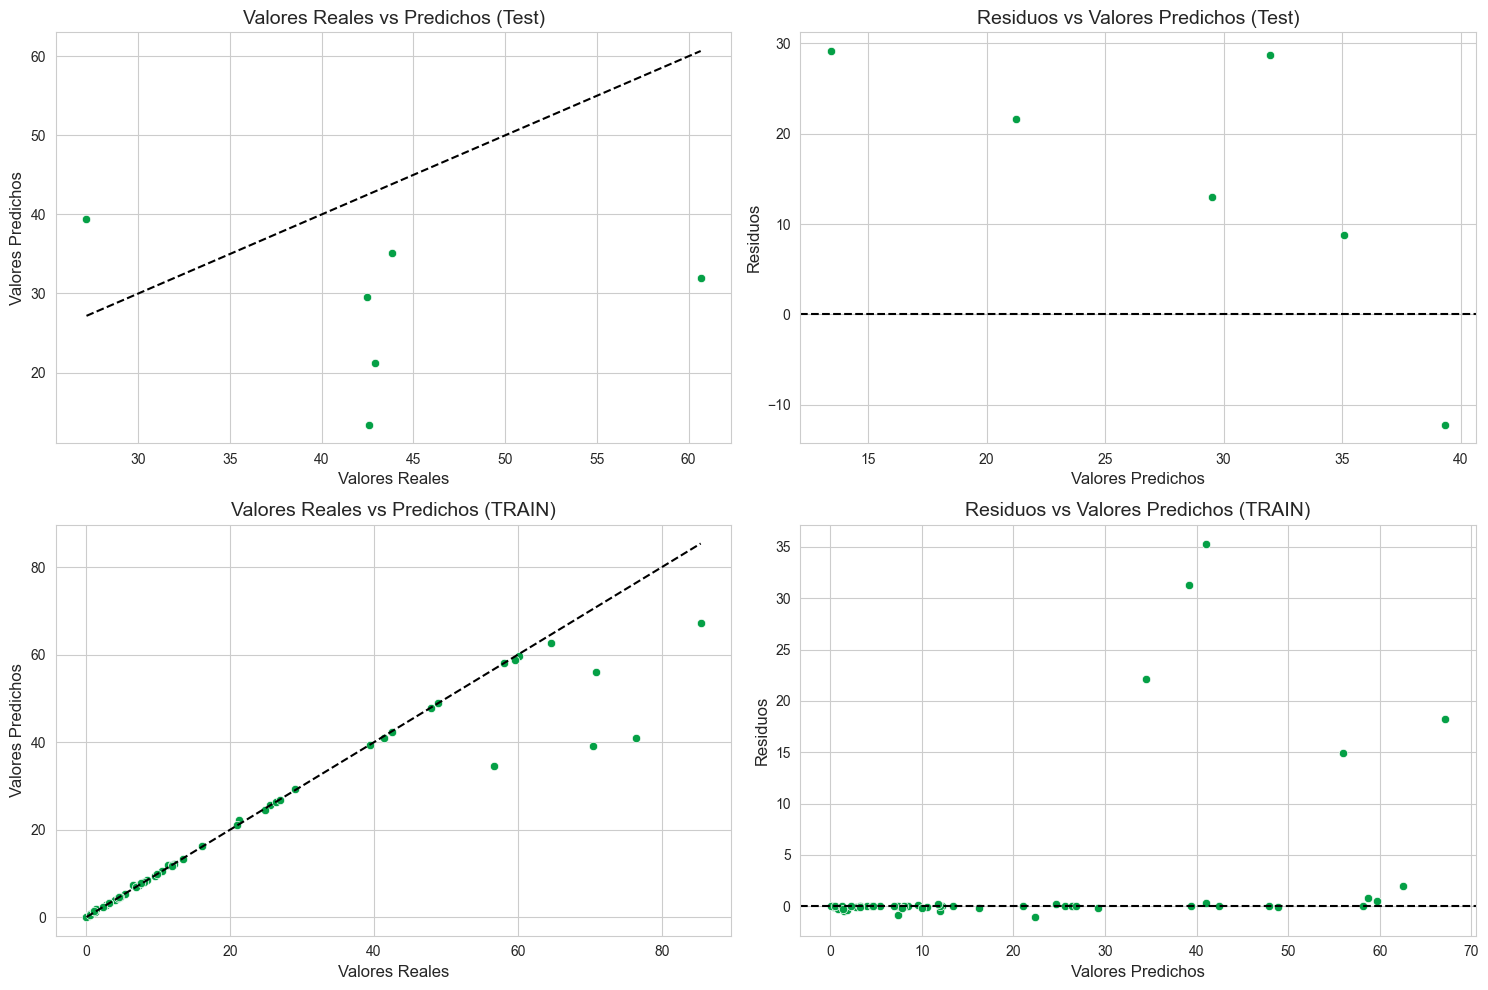

In [487]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (mean_squared_error, r2_score, 
                             mean_absolute_error, mean_absolute_percentage_error)

# CARGAR DATOS
# -------------------------------------------------------------------
dataset = data_glio.copy()

# COLUMNAS A ELIMINAR
cols_to_drop = [
    'SEGUIMIENTO_MUERTE',
    'FECHA_CIRUGIA',
    'FECHA_MUERTE',
    'DX_ANTERIOR',
    'DX_ANTERIOR1',
    'RECLASIFICACION',
    'RECLASIFICACION_EXP', "MUERTE"
]
dataset = dataset.drop(columns=cols_to_drop, errors='ignore')

# OPCIONAL: eliminar primeras 4 columnas si son IDs u otros no útiles
dataset = dataset.iloc[:, 4:]

# VARIABLE OBJETIVO
clase_name = 'MESES'
X = dataset.drop(columns=[clase_name])
y = dataset[clase_name].values

# Dividir en train y test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# PREPROCESAMIENTO: codificar variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ],
    remainder='passthrough'
)

# CREAR PIPELINE CON MODELO
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ExtraTreesRegressor(n_estimators=100, random_state=42))
])

# ENTRENAR MODELO
model.fit(X_train, y_train)

# PREDICCIONES
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# CÁLCULO DE MÉTRICAS PARA TRAIN Y TEST
def calcular_metricas(y_real, y_pred):
    mse = mean_squared_error(y_real, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_real, y_pred)
    mape = mean_absolute_percentage_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)
    nmse = mse / np.var(y_real)  # Normalized MSE
    
    return {
        'R²': r2,
        'MSE': mse,
        'RMSE': rmse,
        'NMSE': nmse,
        'MAE': mae,
        'MAPE': mape
    }

metricas_train = calcular_metricas(y_train, y_pred_train)
metricas_test = calcular_metricas(y_test, y_pred_test)

# IMPRIMIR MÉTRICAS
print("\nMétricas en conjunto de TRAIN:")
for nombre, valor in metricas_train.items():
    print(f"{nombre}: {valor:.4f}")

print("\nMétricas en conjunto de TEST:")
for nombre, valor in metricas_test.items():
    print(f"{nombre}: {valor:.4f}")

# GRÁFICOS DE DIAGNÓSTICO
plt.figure(figsize=(15, 10))

# Gráfico 1: Valores reales vs predichos (TEST)
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_test,  color="#05a046")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Predichos (Test)')

# Gráfico 2: Residuos vs predichos (TEST)
residuos = y_test - y_pred_test
plt.subplot(2, 2, 2)
sns.scatterplot(x=y_pred_test, y=residuos, color="#05a046")
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Predichos (Test)')

# Gráfico 1: Valores reales vs predichos (TEST)
plt.subplot(2, 2, 3)
sns.scatterplot(x=y_train, y=y_pred_train, color="#05a046")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--k')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Predichos (TRAIN)')

# Gráfico 2: Residuos vs predichos (TEST)
residuos2 = y_train - y_pred_train
plt.subplot(2, 2, 4)
sns.scatterplot(x=y_pred_train, y=residuos2, color="#05a046")
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Predichos (TRAIN)')


plt.tight_layout()
plt.show()

## Modelamiento: Random Forest

Evaluar la capacidad predictiva de un modelo consiste en comprobar cómo de próximas son sus predicciones a los verdaderos valores de la variable respuesta. Para poder cuantificarlo de forma correcta, se necesita disponer de un conjunto de observaciones, de las que se conozca la variable respuesta, pero que el modelo no haya "visto", es decir, que no hayan participado en su ajuste. Con esta finalidad, se dividen los datos disponibles en un conjunto de entrenamiento y un conjunto de test. El tamaño adecuado de las particiones depende en gran medida de la cantidad de datos disponibles y la seguridad que se necesite en la estimación del error, 80%-20% suele dar buenos resultados. El reparto debe hacerse de forma aleatoria o aleatoria-estratificada.

In [488]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error

# CARGAR DATOS
# -------------------------------------------------------------------
dataset = data_glio.copy()

# COLUMNAS A ELIMINAR
cols_to_drop = [
    'SEGUIMIENTO_MUERTE',
    'FECHA_CIRUGIA',
    'FECHA_MUERTE',
    'DX_ANTERIOR',
    'DX_ANTERIOR1',
    'RECLASIFICACION',
    'RECLASIFICACION_EXP', "MUERTE"
]
dataset = dataset.drop(columns=cols_to_drop, errors='ignore')

# OPCIONAL: eliminar primeras 4 columnas si son IDs u otros no útiles
dataset = dataset.iloc[:, 4:]

# VARIABLE OBJETIVO
clase_name = 'MESES'

# Separar variables predictoras y objetivo
X = dataset.drop(columns=[clase_name])
y = dataset[clase_name]

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
    steps=[('scaler', StandardScaler())]
)

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
    steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
).set_output(transform="pandas")

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', RandomForestRegressor(random_state=42))])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro
param_distributions = {
    'modelo__n_estimators': [50, 100, 200, 500],
    'modelo__max_features': ['sqrt', 'log2', None],
    'modelo__max_depth': [None, 5, 10, 15],
    'modelo__min_samples_split': [2, 5, 10],
    'modelo__min_samples_leaf': [1, 2, 4]
}

# Búsqueda random grid
grid = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_distributions,
    n_iter=20,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,  # Usa todos los núcleos disponibles
    cv=RepeatedKFold(n_splits=5, n_repeats=3, random_state=42),
    refit=True,
    verbose=0,
    random_state=123,
    return_train_score=True
)

# Entrenar el modelo con la búsqueda de hiperparámetros
grid.fit(X_train, y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
mejores_resultados = resultados.filter(regex='(param.*|mean_t|std_t)') \
    .drop(columns='params') \
    .sort_values('mean_test_score', ascending=False) \
    .head(1)

print("Mejores hiperparámetros encontrados:")
print(mejores_resultados)


Mejores hiperparámetros encontrados:
    param_modelo__n_estimators  param_modelo__min_samples_split  \
16                         200                                2   

    param_modelo__min_samples_leaf param_modelo__max_features  \
16                               1                       sqrt   

   param_modelo__max_depth  mean_test_score  std_test_score  mean_train_score  \
16                      10       -17.809116        4.497819         -8.519065   

    std_train_score  
16         0.590594  


In [489]:
# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__n_estimators,param_modelo__min_samples_split,param_modelo__min_samples_leaf,param_modelo__max_features,param_modelo__max_depth,mean_test_score,std_test_score,mean_train_score,std_train_score
16,200,2,1,sqrt,10,-17.809116,4.497819,-8.519065,0.590594


## División train y test

Evaluar la capacidad predictiva de un modelo consiste en comprobar cómo de próximas son sus predicciones a los verdaderos valores de la variable respuesta. Para poder cuantificarlo de forma correcta, se necesita disponer de un conjunto de observaciones, de las que se conozca la variable respuesta, pero que el modelo no haya "visto", es decir, que no hayan participado en su ajuste. Con esta finalidad, se dividen los datos disponibles en un conjunto de entrenamiento y un conjunto de test. El tamaño adecuado de las particiones depende en gran medida de la cantidad de datos disponibles y la seguridad que se necesite en la estimación del error, 80%-20% suele dar buenos resultados. El reparto debe hacerse de forma aleatoria o aleatoria-estratificada.

In [490]:
dataset2.columns

Index(['MESES', 'GENERO', 'EDAD', 'PATOLOGIA', 'LADO_LESION', 'LOCALIZACION',
       'CONVULSIONES', 'LANGUAGE', 'MOTOR', 'SENSORIAL', 'COMPORTAMIENTO',
       'ABORDAJE_CRANIOTOMIA', 'RESECCION_RAD', 'NP_CONV', 'NP_DEF_LENG',
       'NP_DEF_MOTORA', 'IDH'],
      dtype='object')

In [491]:
# Reparto de datos en train y test   (Variar 90-10)
# ==============================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        dataset2.drop('MESES', axis = 'columns'),
                                        dataset2['MESES'],
                                        train_size   = 0.9,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [492]:
print("Partición de entrenamento")
print("-----------------------")
print(y_train.describe())

Partición de entrenamento
-----------------------
count    49.000000
mean     20.691461
std      20.200012
min       0.098684
25%       4.046053
50%      11.907895
75%      41.381579
max      64.605263
Name: MESES, dtype: float64


In [493]:
print("Partición de test")
print("-----------------------")
print(y_test.describe())

Partición de test
-----------------------
count     6.000000
mean     12.993421
std      13.691705
min       3.223684
25%       5.328947
50%       7.220395
75%      13.947368
max      39.407895
Name: MESES, dtype: float64


### Preprocesado

Definir todas las transformaciones (escalado, selección, filtrado...) que se desea aplicar y a qué columnas ColumnTransformer(). La selección de columnas puede hacerse por: nombre. índice, máscara booleana, slice, patrón regex, por tipo de columna o con las funciones de selección make_column_selector.

Aprender los parámetros necesarios para dichas transformaciones con las observaciones de entrenamiento .fit().

Aplicar las transformaciones aprendidas a cualquier conjunto de datos .transform().

In [494]:
# Selección de las variables por tipo
# ==============================================================================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector

# Se estandarizan las columnas numéricas y se hace one-hot-encoding de las
# columnas cualitativas. Para mantener las columnas a las que no se les aplica
# ninguna transformación se tiene que indicar remainder='passthrough'.
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

preprocessor = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols),
                    ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                                                          remainder='passthrough')

se aprenden las transformaciones con los datos de entrenamiento y se aplican a los dos conjuntos con transform().

In [495]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [496]:
# Ajustar y transformar en un solo paso (fit_transform)
preprocessor.fit(X_train)
X_train_prep = pd.DataFrame(
    preprocessor.transform(X_train),
    columns=preprocessor.get_feature_names_out()  # Nombres automáticos
)
X_train_prep.head(3)

,scale__GENERO,scale__EDAD,scale__PATOLOGIA,scale__LADO_LESION,scale__LOCALIZACION,scale__CONVULSIONES,scale__LANGUAGE,scale__MOTOR,scale__SENSORIAL,scale__COMPORTAMIENTO,scale__ABORDAJE_CRANIOTOMIA,scale__RESECCION_RAD,scale__NP_CONV,scale__NP_DEF_LENG,scale__NP_DEF_MOTORA,scale__IDH
0,0.830455,-0.812494,-0.592650,-0.902671,-0.743929,1.154701,1.858641,1.063219,1.026386,-0.866025,-0.693141,-0.531717,-0.664211,-0.632456,-0.830455,-0.538028
1,0.830455,-0.432122,0.727343,-0.902671,-1.148957,1.154701,-0.538028,-0.940540,-0.836315,-0.866025,-1.164862,0.915734,-0.664211,-0.632456,-0.830455,-0.538028
2,-1.204159,0.159566,0.727343,0.102576,-0.338901,-0.866025,-0.538028,-0.940540,1.026386,-0.866025,-0.693141,-0.531717,-0.664211,-0.632456,-0.830455,-0.538028


In [497]:
preprocessor = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols),
                    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)],
                remainder = 'passthrough',
                verbose_feature_names_out = False
               ).set_output(transform="pandas")

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

X_train_prep.head(3)

,GENERO,EDAD,PATOLOGIA,LADO_LESION,LOCALIZACION,CONVULSIONES,LANGUAGE,MOTOR,SENSORIAL,COMPORTAMIENTO,ABORDAJE_CRANIOTOMIA,RESECCION_RAD,NP_CONV,NP_DEF_LENG,NP_DEF_MOTORA,IDH
52,0.830455,-0.812494,-0.592650,-0.902671,-0.743929,1.154701,1.858641,1.063219,1.026386,-0.866025,-0.693141,-0.531717,-0.664211,-0.632456,-0.830455,-0.538028
13,0.830455,-0.432122,0.727343,-0.902671,-1.148957,1.154701,-0.538028,-0.940540,-0.836315,-0.866025,-1.164862,0.915734,-0.664211,-0.632456,-0.830455,-0.538028
18,-1.204159,0.159566,0.727343,0.102576,-0.338901,-0.866025,-0.538028,-0.940540,1.026386,-0.866025,-0.693141,-0.531717,-0.664211,-0.632456,-0.830455,-0.538028


ColumnTransformer aplica las operaciones de forma paralela, no de forma secuencial, esto significa que no permite aplicar más de una transformación a una misma columna.

Ahora, se combinan las transormaciones:

Columnas numéricas: se imputan los valores ausentes con la mediana y a continuación se estandarizan.

Columnas categóricas (cualitativas): se imputan los valores ausentes con el valor más frecuente y a continuación se aplica one hot encoding.

In [498]:
# Selección de las variables por tipo
# ==============================================================================
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector

numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[
                            ('imputer', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())
                        ]
                      )


# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[
                                ('imputer', SimpleImputer(strategy='most_frequent')),
                                ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
                            ]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [499]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)
X_train_prep.head(3)

,GENERO,EDAD,PATOLOGIA,LADO_LESION,LOCALIZACION,CONVULSIONES,LANGUAGE,MOTOR,SENSORIAL,COMPORTAMIENTO,ABORDAJE_CRANIOTOMIA,RESECCION_RAD,NP_CONV,NP_DEF_LENG,NP_DEF_MOTORA,IDH
52,0.830455,-0.812494,-0.592650,-0.902671,-0.743929,1.154701,1.858641,1.063219,1.026386,-0.866025,-0.693141,-0.531717,-0.664211,-0.632456,-0.830455,-0.538028
13,0.830455,-0.432122,0.727343,-0.902671,-1.148957,1.154701,-0.538028,-0.940540,-0.836315,-0.866025,-1.164862,0.915734,-0.664211,-0.632456,-0.830455,-0.538028
18,-1.204159,0.159566,0.727343,0.102576,-0.338901,-0.866025,-0.538028,-0.940540,1.026386,-0.866025,-0.693141,-0.531717,-0.664211,-0.632456,-0.830455,-0.538028


## Modelos

#### Entrenamiento

Se ajusta un primer modelo de regresión lineal con regularización ridge para predecir el precio de la vivienda en función de todos los predictores disponibles.

In [500]:
from sklearn.linear_model import Ridge

# Preprocedado
# ==============================================================================

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

# Pipeline
# ==============================================================================

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

# Train
# ==============================================================================
# Se asigna el resultado a _ para que no se imprima por pantalla
_ = pipe.fit(X=X_train, y=y_train)

#### Validación

La finalidad última de un modelo es predecir la variable respuesta en observaciones futuras o en observaciones que el modelo no ha "visto" antes. El error mostrado por defecto tras entrenar un modelo suele ser el error de entrenamiento, el error que comete el modelo al predecir las observaciones que ya ha "visto".

In [501]:
# Validación cruzada
# ==============================================================================
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
            )

print(f"Métricas validación cruzada: {cv_scores}")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Métricas validación cruzada: [-19.79474528 -15.36684484 -31.05151365 -33.72012929 -18.21657563]
Média métricas de validación cruzada: -23.629961739381315


Cada método funciona internamente de forma distinta, pero todos ellos se basan en la idea: ajustar y evaluar el modelo de forma repetida, empleando cada vez distintos subconjuntos creados a partir de los datos de entrenamiento y obteniendo en cada repetición una estimación del error. El promedio de todas las estimaciones tiende a converger en el valor real del error de test.

In [502]:
# Validación cruzada repetida
# ==============================================================================
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv
            )

print(f"Métricas de validación cruzada: {cv_scores}")
print("")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Métricas de validación cruzada: [-17.54399427 -24.04604932 -24.4859062  -20.3540469  -22.11432001
 -16.94921898 -31.47264422 -25.85952788 -25.15289788 -22.00494184
 -20.33707974 -22.2913489  -23.65930923 -20.50719995 -23.52675285
 -21.02364818 -25.94858372 -24.85245217 -22.75700755 -15.91760172
 -20.45035086 -23.58377151 -22.35810808 -21.6294803  -24.18538381]

Média métricas de validación cruzada: -22.520465043558914


La función cross_validate es similar a cross_val_score pero permite estimar varias métricas a la vez, tanto para test como para train, y devuelve los resultados en un diccionario.

In [503]:
# Validación cruzada repetida con múltiples métricas
# ==============================================================================
from sklearn.model_selection import cross_validate

cv = RepeatedKFold(n_splits=3, n_repeats=5, random_state=123)
cv_scores = cross_validate(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = cv,
                return_train_score = True
            )

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.008005,0.005001,0.200904,0.449898,-18.793173,-14.250669
1,0.006006,0.003992,-0.570533,0.625412,-26.952938,-11.590426
2,0.005999,0.006003,-2.113275,0.756645,-25.869103,-10.488764
3,0.005998,0.005002,-0.490144,0.567573,-23.180564,-13.049753
4,0.006000,0.004003,-0.672865,0.755583,-28.398879,-9.238842
5,0.006000,0.003999,-3.436383,0.688164,-36.741900,-11.744230
6,0.005000,0.005001,0.100922,0.391872,-20.733350,-13.496334
7,0.005000,0.005079,-0.704288,0.678714,-25.068557,-11.421803
8,0.006001,0.004001,-2.826293,0.746299,-29.548251,-10.812136
9,0.004999,0.004999,-0.171137,0.590961,-23.108499,-12.252116


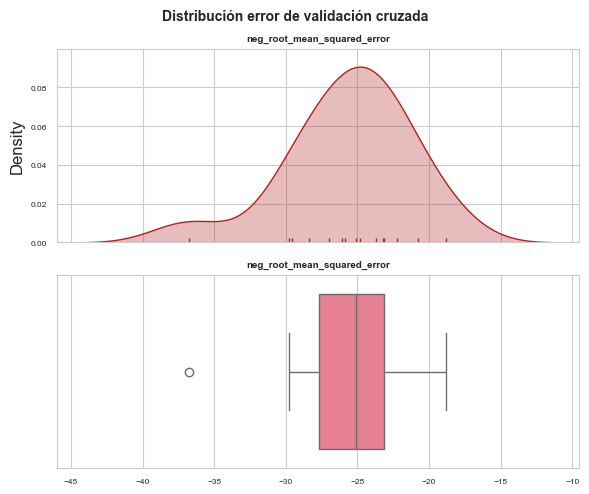

In [504]:
# Distribución del error de validación cruzada
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 5), sharex=True)

sns.kdeplot(
    cv_scores['test_neg_root_mean_squared_error'],
    fill    = True,
    alpha   = 0.3,
    color   = "firebrick",
    ax      = axes[0]
)
sns.rugplot(
    cv_scores['test_neg_root_mean_squared_error'],
    color   = "firebrick",
    ax      = axes[0]
)
axes[0].set_title('neg_root_mean_squared_error', fontsize = 7, fontweight = "bold")
axes[0].tick_params(labelsize = 6)
axes[0].set_xlabel("")

sns.boxplot(
    x  = cv_scores['test_neg_root_mean_squared_error'],
    ax = axes[1]
)
axes[1].set_title('neg_root_mean_squared_error', fontsize = 7, fontweight = "bold")
axes[1].tick_params(labelsize = 6)
axes[1].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución error de validación cruzada', fontsize = 10,
             fontweight = "bold");

E:\PROFILES\ocaballero\AppData\Local\Temp\ipykernel_30308\1912843072.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot(
E:\PROFILES\ocaballero\AppData\Roaming\Python\Python312\site-packages\statsmodels\graphics\gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


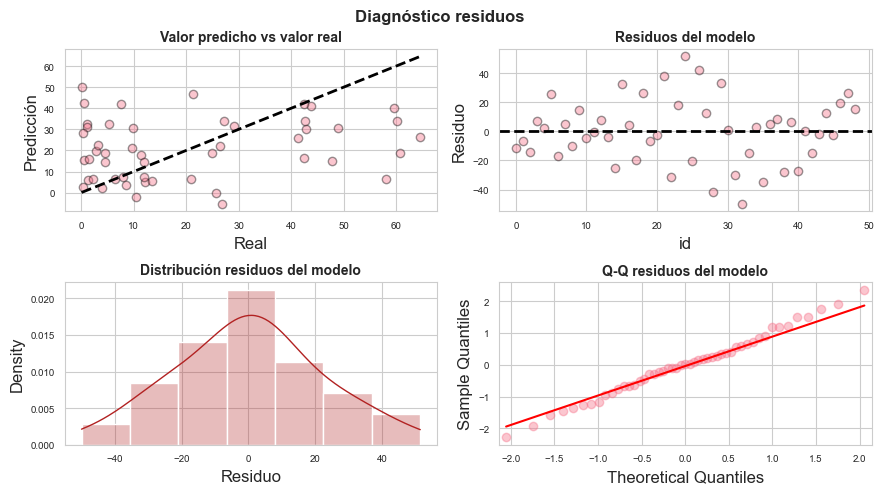

In [505]:
# Diagnóstico errores (residuos) de las predicciones de validación cruzada
# ==============================================================================
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
import statsmodels.api as sm

# Validación cruzada
# ==============================================================================
cv = KFold(n_splits=5, random_state=123, shuffle=True)
cv_prediccones = cross_val_predict(
                    estimator = pipe,
                    X         = X_train,
                    y         = y_train,
                    cv        = cv
                 )

# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))

axes[0, 0].scatter(y_train, cv_prediccones, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    'k--', color = 'black', lw=2
)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), y_train - cv_prediccones,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = y_train - cv_prediccones,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    y_train - cv_prediccones,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1],
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [506]:
# Validación cruzada repetida paralelizada (multicore)
# ==============================================================================
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=8 , n_repeats=5, random_state=123) #2 o 3 máx
cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv,
                n_jobs    = -1 # todos los cores disponibles
            )

print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Média métricas de validación cruzada: -22.82948239672306


#### Predicción

In [507]:
predicciones = pipe.predict(X_test)

In [508]:
# Se crea un dataframe con las predicciones y el valor real
df_predicciones = pd.DataFrame({'MESES' : y_test, 'prediccion' : predicciones})
df_predicciones.head()

,MESES,prediccion
29,7.006579,16.549708
44,4.769737,10.644339
8,7.434211,42.522374
22,3.223684,-1.341089
6,39.407895,32.501663


In [509]:
# mean_squared_error de test
# ==============================================================================
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, predicciones)  # MSE
rmse = np.sqrt(mse)  # RMSE
rmse

np.float64(15.432567407700605)

#### Hiperparámetros

Grid search

In [510]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.linear_model import Ridge

# Pipe: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

In [511]:
# Grid de hiperparámetros
# ==============================================================================
param_grid = {'modelo__alpha': np.logspace(-5, 3, 10)}

# Búsqueda por validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = pipe,
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 5),
        verbose    = 0,
        return_train_score = True
       )

# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid.fit(X = X_train, y = y_train)

In [512]:
# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)

,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
8,129.154967,-19.293558,4.122390,-17.686111,1.058118
7,16.681005,-19.578617,4.507929,-14.551937,1.127642
9,1000.000000,-19.837953,4.052584,-19.489833,1.094989
6,2.154435,-22.226853,6.063608,-13.256955,1.270037
5,0.278256,-23.757189,6.860667,-13.144865,1.286404
4,0.035938,-24.041851,7.011155,-13.141953,1.286836
3,0.004642,-24.080699,7.031817,-13.141901,1.286843
2,0.000599,-24.085753,7.034507,-13.141901,1.286844
1,0.000077,-24.086406,7.034855,-13.141901,1.286844
0,0.000010,-24.086491,7.034900,-13.141901,1.286844


In [513]:
# Mejores hiperparámetros
# ==============================================================================
print("-----------------------------------")
print("Mejores hiperparámetros encontrados")
print("-----------------------------------")
print(f"{grid.best_params_} : {grid.best_score_} ({grid.scoring})")

-----------------------------------
Mejores hiperparámetros encontrados
-----------------------------------
{'modelo__alpha': np.float64(129.15496650148827)} : -19.29355766283062 (neg_root_mean_squared_error)


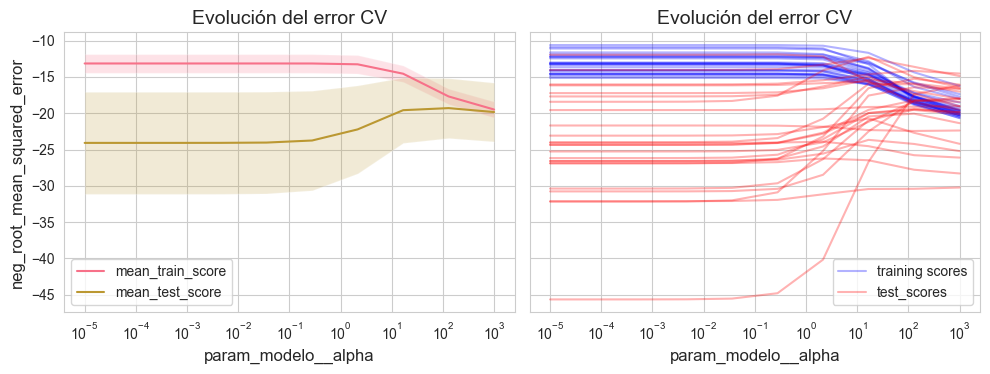

In [514]:
# Gráfico resultados validación cruzada para cada hiperparámetro
# ==============================================================================
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3.84), sharey=True)

# Gráfico 1
# ------------------------------------------------------------------------------
resultados.plot('param_modelo__alpha', 'mean_train_score', ax=axes[0])
resultados.plot('param_modelo__alpha', 'mean_test_score', ax=axes[0])
axes[0].fill_between(resultados.param_modelo__alpha.astype(float),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
axes[0].fill_between(resultados.param_modelo__alpha.astype(float),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
axes[0].legend()
axes[0].set_xscale('log')
axes[0].set_title('Evolución del error CV')
axes[0].set_ylabel('neg_root_mean_squared_error');

# Gráfico 2
# ------------------------------------------------------------------------------
numero_splits = grid.n_splits_

resultados.plot(
    x     = 'param_modelo__alpha',
    y     = [f'split{i}_train_score' for i in range(numero_splits)],
    alpha = 0.3,
    c     = 'blue',
    ax    = axes[1]
)

resultados.plot(
    x     = 'param_modelo__alpha',
    y     = [f'split{i}_test_score' for i in range(numero_splits)],
    alpha = 0.3,
    c     = 'red',
    ax    = axes[1]
)

axes[1].legend(
    (axes[1].get_children()[0], axes[1].get_children()[numero_splits]),
    ('training scores', 'test_scores')
)
axes[1].set_xscale('log')
axes[1].set_title('Evolución del error CV')
axes[1].set_ylabel('neg_root_mean_squared_error');

fig.tight_layout()

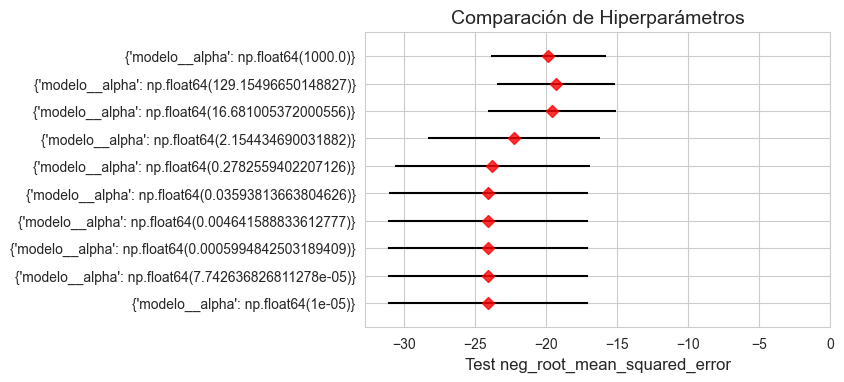

In [515]:
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.barh(
    [str(d) for d in resultados['params']],
    resultados['mean_test_score'],
    xerr=resultados['std_test_score'],
    align='center',
    alpha=0
)
ax.plot(
    resultados['mean_test_score'],
    [str(d) for d in resultados['params']],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Comparación de Hiperparámetros')
ax.set_xlabel('Test neg_root_mean_squared_error');

Random search

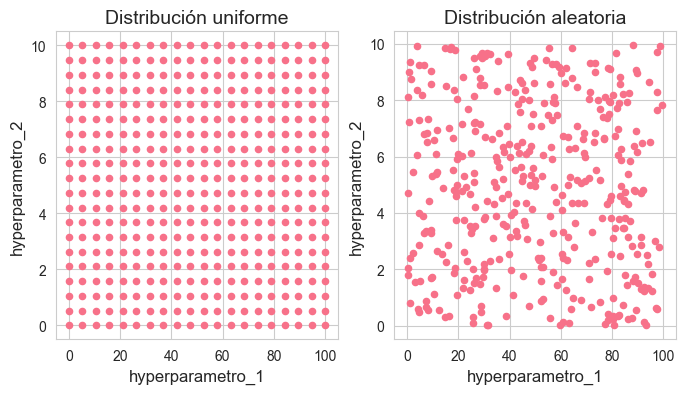

In [516]:
from itertools import product
import random

fig, axs = plt.subplots(nrows = 1, ncols = 2,figsize=(8, 4),
                        sharex = True, sharey = False)

# Grid exhaustivo
# ==============================================================================
hyperparametro_1 = np.linspace(start = 0, stop = 100, num=20)
hyperparametro_2 = np.linspace(start = 0, stop = 10, num=20)

# Lista con todas las combinaciones
combinaciones = [list(x) for x in product(hyperparametro_1, hyperparametro_2)]
combinaciones = pd.DataFrame.from_records(
                    combinaciones,
                    columns=['hyperparametro_1', 'hyperparametro_2']
                )

combinaciones.plot(
    x    = 'hyperparametro_1',
    y    = 'hyperparametro_2',
    kind = 'scatter',
    ax   = axs[0]
)
axs[0].set_title('Distribución uniforme')

# Grid aleatorio (random grid)
# ==============================================================================
hyperparametro_1 = np.random.uniform(low = 0, high = 100, size  = 400)
hyperparametro_2 = np.random.uniform(low = 0, high = 10, size  = 400)

combinaciones = pd.DataFrame(
                    {
                    'hyperparametro_1': hyperparametro_1,
                    'hyperparametro_2': hyperparametro_2,
                    }
                )
combinaciones.plot(
    x    = 'hyperparametro_1',
    y    = 'hyperparametro_2',
    kind = 'scatter',
    ax   = axs[1]
)
axs[1].set_title('Distribución aleatoria');

In [517]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold

# Espacio de búsqueda de cada hiperparámetro
# ==============================================================================
param_distributions = {'modelo__alpha': np.logspace(-5, 3, 100)}

# Búsqueda por validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 50,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 5),
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
26,73.90722,-19.602629,2.654845,-16.806471,0.58163


Optimización bayesiana

In [518]:
# Búsqueda de hiperparámetros con scikit-optimize
# ==============================================================================
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt.plots import plot_convergence

espacio_busqueda  = [Real(1e-6, 1e+3, "log-uniform", name='modelo__alpha')]

@use_named_args(espacio_busqueda)
def objective(**params):
    pipe.set_params(**params)
    return -np.mean(cross_val_score(pipe, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="neg_root_mean_squared_error"))

resultados_opt = gp_minimize(
                    func         = objective,
                    dimensions   = espacio_busqueda,
                    n_calls      = 50,
                    random_state = 123
                )

print(f"Mejor score validación: {resultados_opt.fun}")
print(f"Mejores hiperparámetros: {list(zip([x.name for x in espacio_busqueda], resultados_opt.x))}")

Mejor score validación: 19.02070927340521
Mejores hiperparámetros: [('modelo__alpha', 45.56057720572447)]


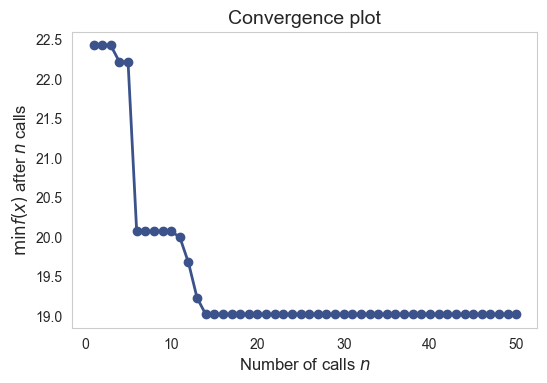

In [519]:
# Evolución de la optimización
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))
plot_convergence(resultados_opt, ax = ax);

In [520]:
# Búsqueda de hiperparámetros con Optuna
# ==============================================================================
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

def objective(trial):

    modelo__alpha = trial.suggest_float("modelo__alpha", 1e-6, 1e+3, log=True)
    pipe.set_params(**{'modelo__alpha':modelo__alpha})
    score = -np.mean(cross_val_score(pipe, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="neg_root_mean_squared_error"))
    return score

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50, show_progress_bar=True)
print(study.best_trial)
print("")
print(f"Mejor score validación: {study.best_value}")
print(f"Mejores hiperparámetros: {study.best_params}")

Best trial: 43. Best value: 19.0207: 100%|██████████| 50/50 [00:01<00:00, 32.27it/s]

FrozenTrial(number=43, state=1, values=[19.02072082759003], datetime_start=datetime.datetime(2025, 7, 23, 23, 10, 14, 507295), datetime_complete=datetime.datetime(2025, 7, 23, 23, 10, 14, 538295), params={'modelo__alpha': 45.34903791559589}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'modelo__alpha': FloatDistribution(high=1000.0, log=True, low=1e-06, step=None)}, trial_id=43, value=None)

Mejor score validación: 19.02072082759003
Mejores hiperparámetros: {'modelo__alpha': 45.34903791559589}


Tuning del preprocesado

In [521]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import make_column_selector

# Pipe: preprocesado + modelo
# ==============================================================================
# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline(
        [('preprocessing', preprocessor),
        ('interactions', PolynomialFeatures(degree=2)),
        ('modelo', Ridge())])

# Grid de hiperparámetros
# ==============================================================================
param_grid = {'interactions': [PolynomialFeatures(degree=2), 'passthrough'],
              'modelo__alpha': np.logspace(-5, 3, 10)}

# Búsqueda por validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = pipe,
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 5),
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_interactions,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
18,passthrough,129.154967,-19.764498,2.951121,-17.65106,0.622104


## Algoritmos

En los siguientes apartados se entrenan diferentes modelos de machine learning con el objetivo de compararlos e identificar el que mejor resultado obtiene prediciendo la sobrevida

In [522]:
# Establecer semilla global para reproducibilidad
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


#### K-Nearest Neighbor (kNN)

E:\PROFILES\ocaballero\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [         nan -20.03832081          nan -19.75760701 -19.87594572
          nan          nan -19.95115556 -19.91953391          nan
 -23.9420634  -20.01726996          nan -19.97025066          nan
          nan          nan -20.54055954          nan          nan
          nan          nan          nan          nan -20.00530862
          nan          nan          nan -19.87594572          nan
          nan          nan          nan -19.98258908 -26.51460838
          nan          nan -19.91953391          nan -19.76991028
          nan -19.96785591          nan -19.98210928 -20.25137167
 -20.00530862 -26.51460838 -22.04899129          nan -21.19523938]
  warnings.warn(
E:\PROFILES\ocaballero\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the train sc


Métricas de evaluación del modelo:
Set          Test     Train
Métrica                    
MAE       12.0826   16.9993
MAPE       1.9228   11.5284
MSE      162.4560  383.2803
NMSE       1.0399    0.9589
RMSE      12.7458   19.5775
R²        -0.0399    0.0411


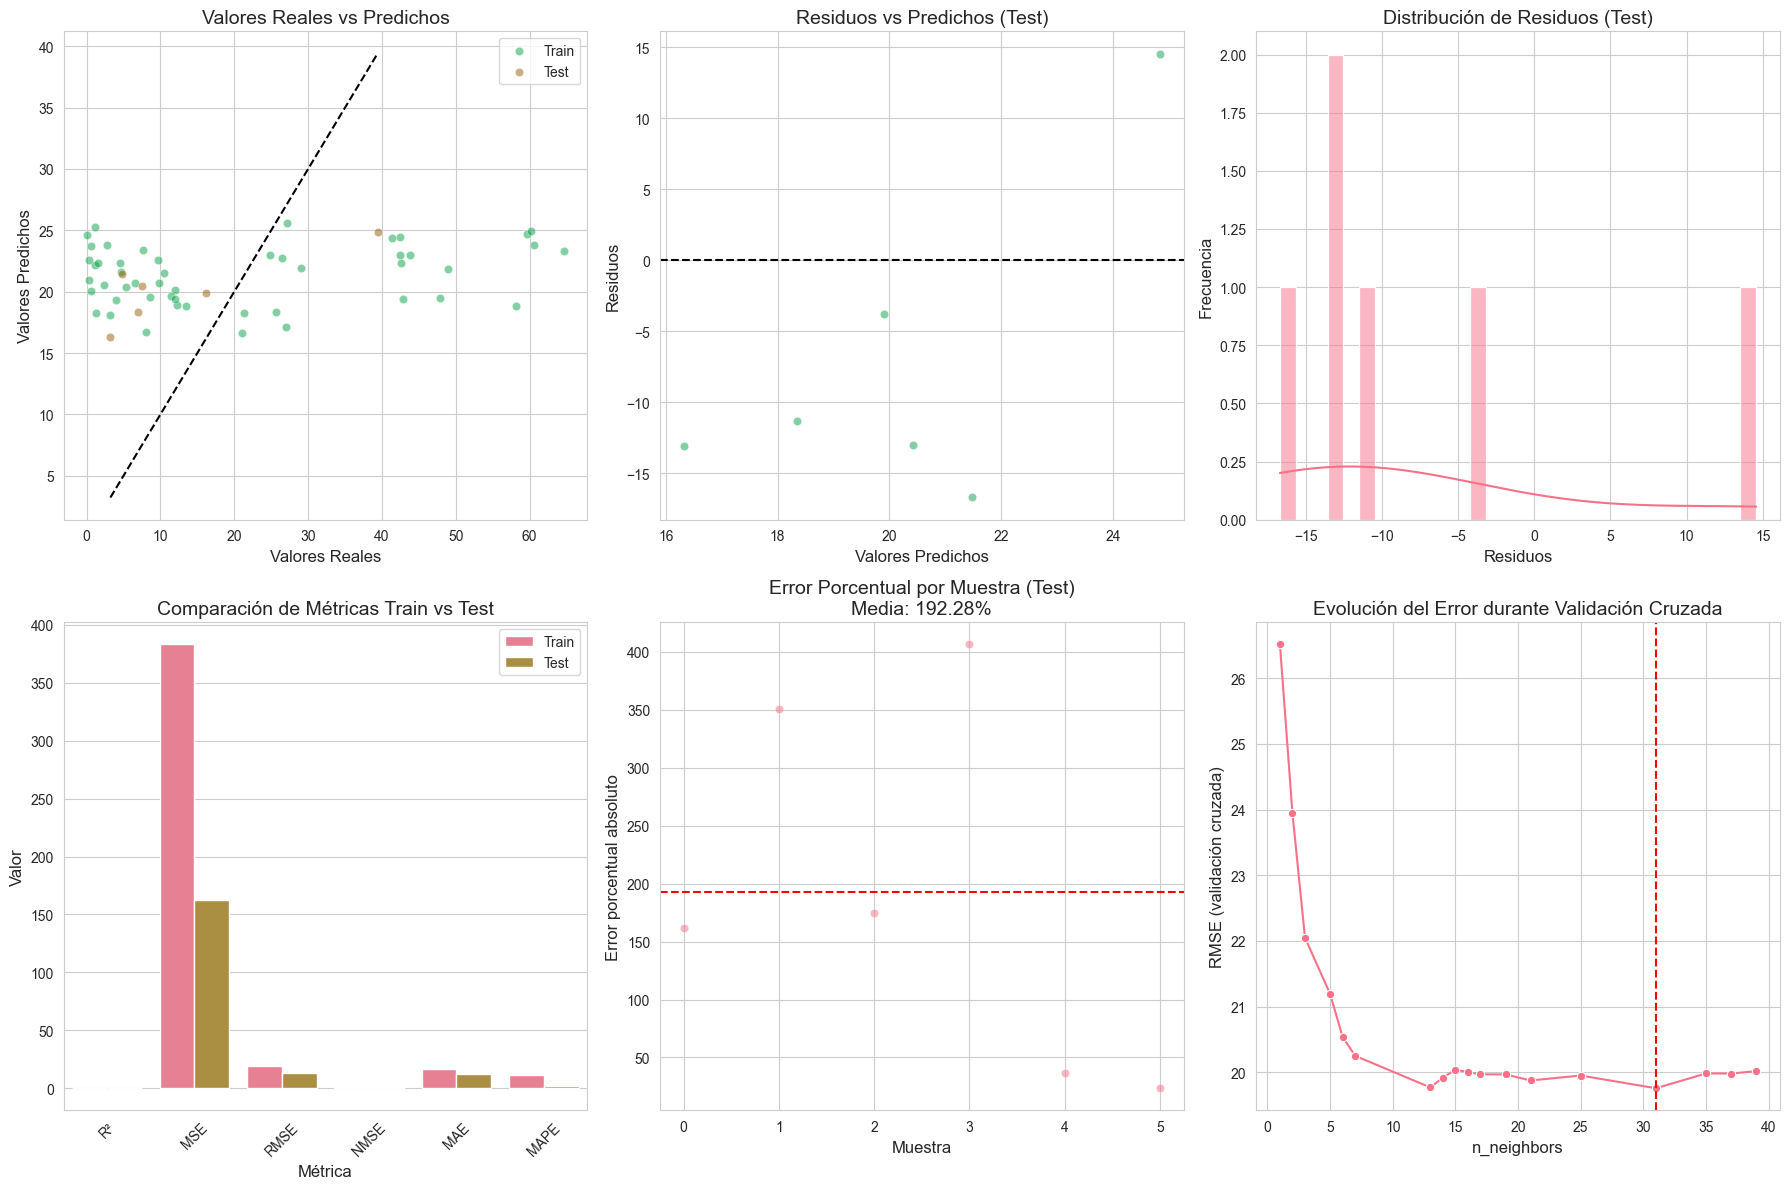


Mejores hiperparámetros encontrados:
{'modelo__n_neighbors': np.int64(31)}

Score en validación cruzada del mejor modelo:
RMSE: 19.7576

Diferencia entre train y test:
RMSE Train: 19.5775
RMSE Test: 12.7458
Diferencia: -6.8317


In [523]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (r2_score, mean_squared_error, 
                            mean_absolute_error, mean_absolute_percentage_error)
from sklearn.model_selection import cross_val_predict

# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', KNeighborsRegressor())])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro
param_distributions = {'modelo__n_neighbors': np.linspace(1, 100, 500, dtype=int)}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 50,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True,
        verbose    = 0,
        random_state = RANDOM_STATE,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

# PREDICCIONES CON EL MEJOR MODELO
# ==============================================================================
best_model = grid.best_estimator_

# Predicciones en train y test
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# CÁLCULO DE MÉTRICAS
# ==============================================================================
def calcular_metricas(y_real, y_pred, set_name):
    """Calcula y muestra métricas de evaluación"""
    mse = mean_squared_error(y_real, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_real, y_pred)
    mape = mean_absolute_percentage_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)
    nmse = mse / np.var(y_real)  # Normalized MSE
    
    metrics_df = pd.DataFrame({
        'Métrica': ['R²', 'MSE', 'RMSE', 'NMSE', 'MAE', 'MAPE'],
        'Valor': [r2, mse, rmse, nmse, mae, mape],
        'Set': [set_name]*6
    })
    
    return metrics_df

# Calcular métricas para train y test
metrics_train = calcular_metricas(y_train, y_pred_train, 'Train')
metrics_test = calcular_metricas(y_test, y_pred_test, 'Test')

# Combinar resultados
resultados_metricas = pd.concat([metrics_train, metrics_test], ignore_index=True)

# Mostrar resultados en formato tabular
print("\nMétricas de evaluación del modelo:")
print(resultados_metricas.pivot(index='Métrica', columns='Set', values='Valor').round(4))

# GRÁFICOS DE DIAGNÓSTICO
# ==============================================================================
plt.figure(figsize=(18, 12))

# Gráfico 1: Valores reales vs predichos (Train y Test)
plt.subplot(2, 3, 1)
sns.scatterplot(x=y_train, y=y_pred_train, alpha=0.5, label='Train', color="#05a046")
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.5, label='Test', color="#965c06")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Predichos')
plt.legend()

# Gráfico 2: Residuos vs predichos (Test)
residuos_test = y_test - y_pred_test
plt.subplot(2, 3, 2)
sns.scatterplot(x=y_pred_test, y=residuos_test, alpha=0.5, color="#05a046")
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs Predichos (Test)')

# Gráfico 3: Distribución de residuos (Test)
plt.subplot(2, 3, 3)
sns.histplot(residuos_test, kde=True, bins=30)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Residuos (Test)')

# Gráfico 4: Comparación de métricas entre train y test
plt.subplot(2, 3, 4)
sns.barplot(data=resultados_metricas, x='Métrica', y='Valor', hue='Set')
plt.xticks(rotation=45)
plt.title('Comparación de Métricas Train vs Test')
plt.legend(loc='upper right')

# Gráfico 5: Error porcentual absoluto por muestra (Test)
error_porcentual = np.abs((y_test - y_pred_test) / y_test) * 100
plt.subplot(2, 3, 5)
sns.scatterplot(x=range(len(error_porcentual)), y=error_porcentual, alpha=0.5)
plt.axhline(y=np.mean(error_porcentual), color='r', linestyle='--')
plt.xlabel('Muestra')
plt.ylabel('Error porcentual absoluto')
plt.title(f'Error Porcentual por Muestra (Test)\nMedia: {np.mean(error_porcentual):.2f}%')

# Gráfico 6: Evolución del error durante validación cruzada
cv_scores = -grid.cv_results_['mean_test_score']  # RMSE scores
plt.subplot(2, 3, 6)
sns.lineplot(x=grid.cv_results_['param_modelo__n_neighbors'], 
             y=cv_scores, 
             marker='o')
plt.axvline(x=grid.best_params_['modelo__n_neighbors'], color='r', linestyle='--')
plt.xlabel('n_neighbors')
plt.ylabel('RMSE (validación cruzada)')
plt.title('Evolución del Error durante Validación Cruzada')

plt.tight_layout()
plt.show()

# INFORMACIÓN ADICIONAL DEL MODELO
# ==============================================================================
print("\nMejores hiperparámetros encontrados:")
print(grid.best_params_)

print("\nScore en validación cruzada del mejor modelo:")
print(f"RMSE: {-grid.best_score_:.4f}")

print("\nDiferencia entre train y test:")
print(f"RMSE Train: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.4f}")
print(f"RMSE Test: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}")
print(f"Diferencia: {np.sqrt(mean_squared_error(y_test, y_pred_test)) - np.sqrt(mean_squared_error(y_train, y_pred_train)):.4f}")

#### Regresión lineal (Ridge y Lasso)


Métricas de evaluación del modelo Ridge:
Set          Test     Train
Métrica                    
MAE       11.8035   15.4537
MAPE       1.8657   10.3780
MSE      157.3494  327.5926
NMSE       1.0072    0.8196
RMSE      12.5439   18.0995
R²        -0.0072    0.1804


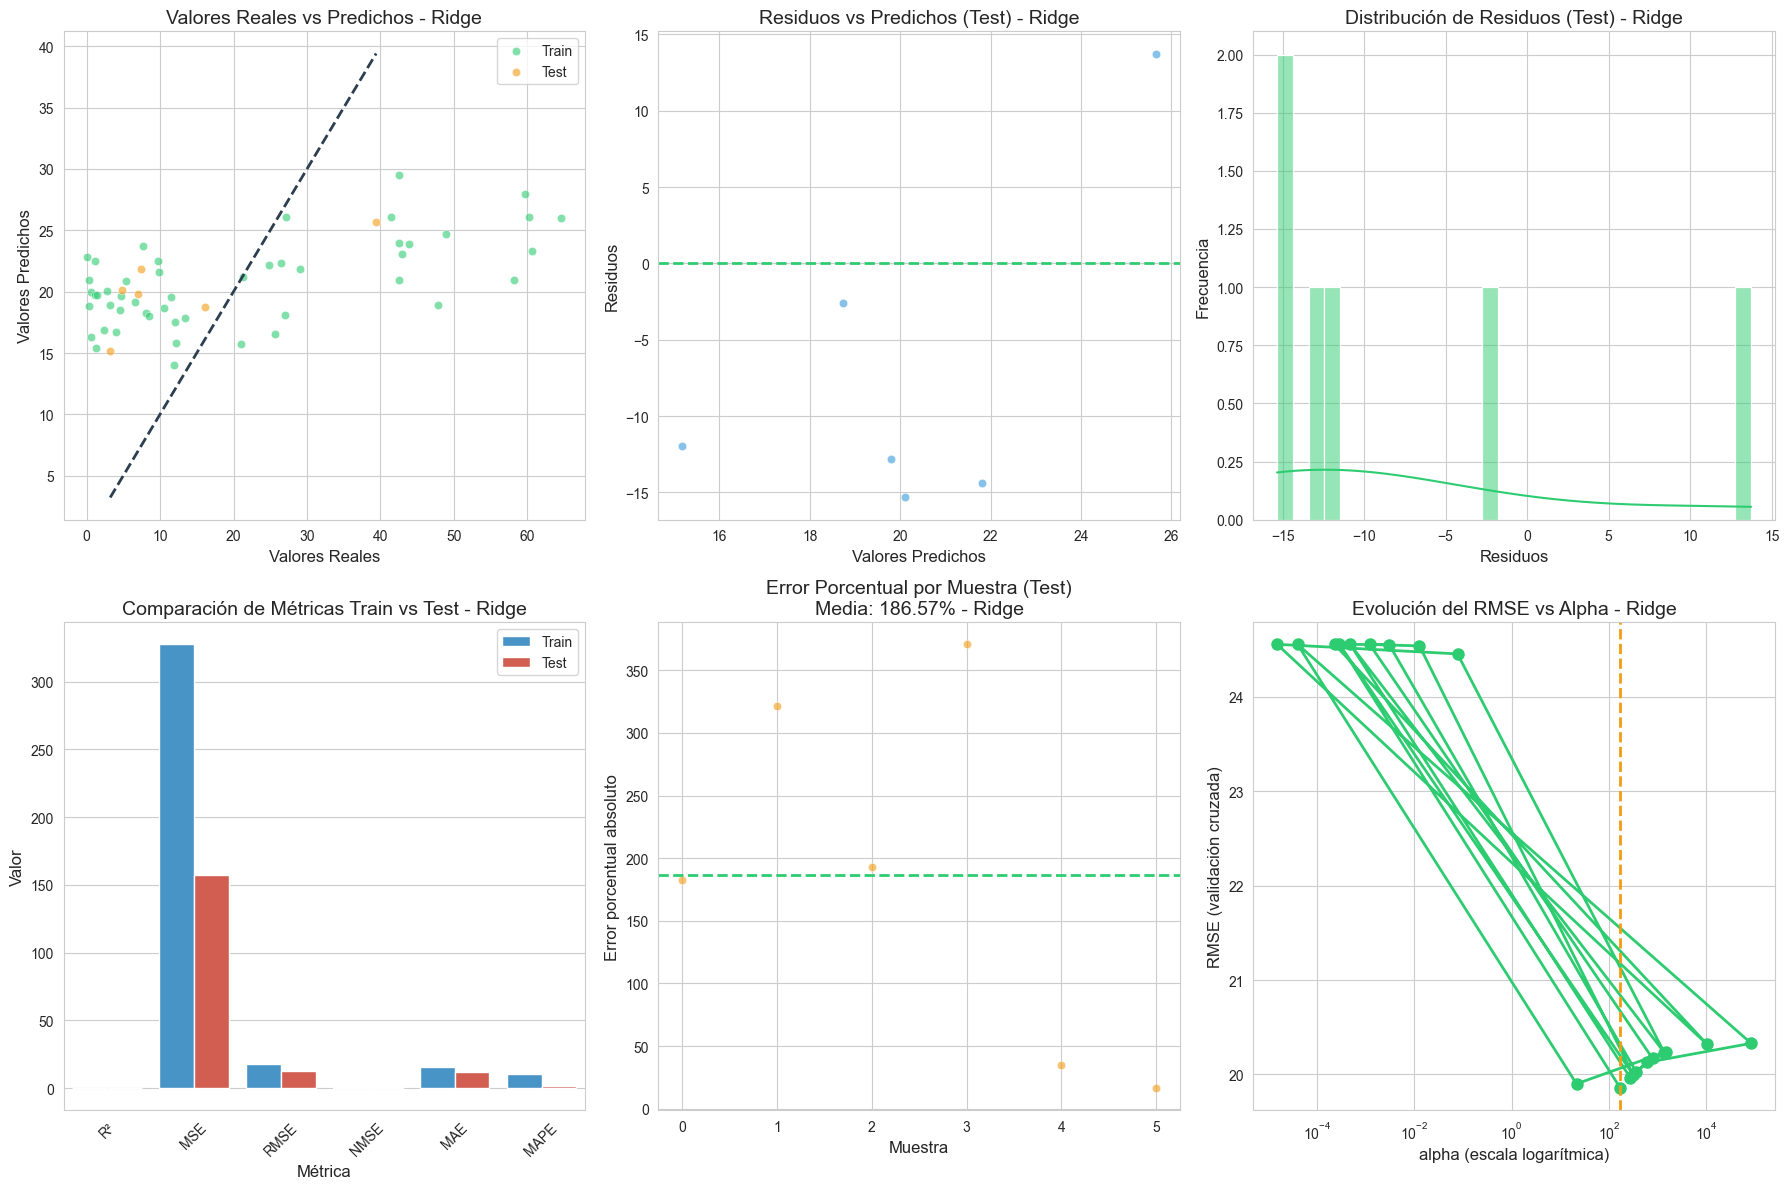


Mejores hiperparámetros encontrados:
{'modelo__alpha': np.float64(171.5808985610003)}

Score en validación cruzada del mejor modelo:
RMSE: 19.8535

Diferencia entre train y test:
RMSE Train: 18.0995
RMSE Test: 12.5439
Diferencia: -5.5556

Top 20 variables más importantes según coeficientes Ridge:
                Variable  Coeficiente
11         RESECCION_RAD     1.542274
0                 GENERO     1.517542
1                   EDAD    -1.143277
3            LADO_LESION    -0.821951
9         COMPORTAMIENTO    -0.633997
12               NP_CONV     0.627964
5           CONVULSIONES     0.533361
7                  MOTOR    -0.517074
15                   IDH     0.383358
6               LANGUAGE    -0.367320
14         NP_DEF_MOTORA    -0.337323
8              SENSORIAL     0.283073
13           NP_DEF_LENG     0.276620
2              PATOLOGIA     0.199261
4           LOCALIZACION    -0.134891
10  ABORDAJE_CRANIOTOMIA    -0.043704


E:\PROFILES\ocaballero\AppData\Local\Temp\ipykernel_30308\1482832056.py:205: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Coeficiente', y='Variable', palette='viridis')


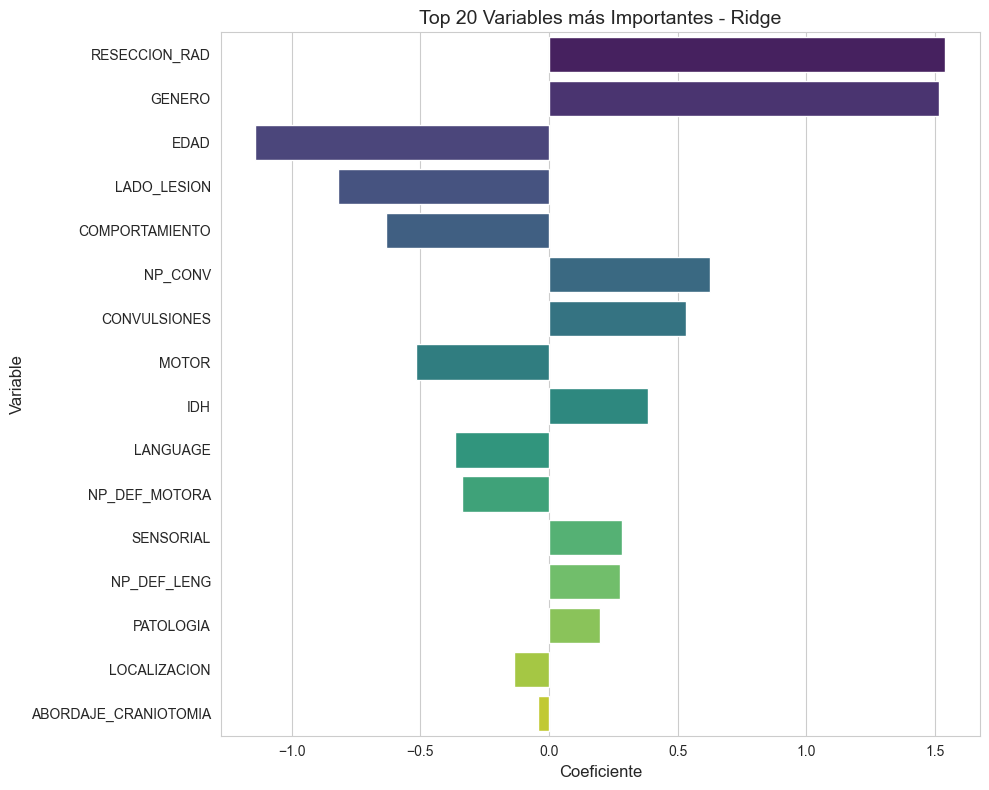

In [524]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (r2_score, mean_squared_error, 
                            mean_absolute_error, mean_absolute_percentage_error)
from sklearn.model_selection import cross_val_predict

# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro
param_distributions = {'modelo__alpha': np.logspace(-5, 5, 500)}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True,
        verbose    = 0,
        random_state = RANDOM_STATE,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)
# Configuración de estilos
sns.set_style("whitegrid")
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
custom_palette = ["#3498db", "#e74c3c", "#2ecc71", "#f39c12", "#9b59b6"]
sns.set_palette(custom_palette)

# PREDICCIONES CON EL MEJOR MODELO RIDGE
# ==============================================================================
best_model = grid.best_estimator_

# Predicciones en train y test
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# CÁLCULO DE MÉTRICAS
# ==============================================================================
def calcular_metricas(y_real, y_pred, set_name):
    """Calcula y muestra métricas de evaluación"""
    mse = mean_squared_error(y_real, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_real, y_pred)
    mape = mean_absolute_percentage_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)
    nmse = mse / np.var(y_real)  # Normalized MSE
    
    metrics_df = pd.DataFrame({
        'Métrica': ['R²', 'MSE', 'RMSE', 'NMSE', 'MAE', 'MAPE'],
        'Valor': [r2, mse, rmse, nmse, mae, mape],
        'Set': [set_name]*6
    })
    
    return metrics_df

# Calcular métricas para train y test
metrics_train = calcular_metricas(y_train, y_pred_train, 'Train')
metrics_test = calcular_metricas(y_test, y_pred_test, 'Test')

# Combinar resultados
resultados_metricas = pd.concat([metrics_train, metrics_test], ignore_index=True)

# Mostrar resultados en formato tabular
print("\nMétricas de evaluación del modelo Ridge:")
print(resultados_metricas.pivot(index='Métrica', columns='Set', values='Valor').round(4))

# GRÁFICOS DE DIAGNÓSTICO
# ==============================================================================
plt.figure(figsize=(18, 12))

# Gráfico 1: Valores reales vs predichos (Train y Test)
plt.subplot(2, 3, 1)
sns.scatterplot(x=y_train, y=y_pred_train, alpha=0.6, label='Train', color= "#2ecc71")
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6, label='Test', color= "#f39c12")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='#2c3e50', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Predichos - Ridge')
plt.legend()

# Gráfico 2: Residuos vs predichos (Test)
residuos_test = y_test - y_pred_test
plt.subplot(2, 3, 2)
sns.scatterplot(x=y_pred_test, y=residuos_test, alpha=0.6)
plt.axhline(y=0, color="#2ecc71", linestyle='--', linewidth=2)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs Predichos (Test) - Ridge')

# Gráfico 3: Distribución de residuos (Test)
plt.subplot(2, 3, 3)
sns.histplot(residuos_test, kde=True, bins=30, color='#2ecc71')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Residuos (Test) - Ridge')

# Gráfico 4: Comparación de métricas entre train y test
plt.subplot(2, 3, 4)
sns.barplot(data=resultados_metricas, x='Métrica', y='Valor', hue='Set')
plt.xticks(rotation=45)
plt.title('Comparación de Métricas Train vs Test - Ridge')
plt.legend(loc='upper right')

# Gráfico 5: Error porcentual absoluto por muestra (Test)
error_porcentual = np.abs((y_test - y_pred_test) / y_test) * 100
plt.subplot(2, 3, 5)
sns.scatterplot(x=range(len(error_porcentual)), y=error_porcentual, alpha=0.6, color='#f39c12')
plt.axhline(y=np.mean(error_porcentual), color="#2ecc71", linestyle='--', linewidth=2)
plt.xlabel('Muestra')
plt.ylabel('Error porcentual absoluto')
plt.title(f'Error Porcentual por Muestra (Test)\nMedia: {np.mean(error_porcentual):.2f}% - Ridge')

# Gráfico 6: Evolución del RMSE durante validación cruzada
cv_scores = -grid.cv_results_['mean_test_score']  # RMSE scores
alphas = grid.cv_results_['param_modelo__alpha']
plt.subplot(2, 3, 6)
plt.semilogx(alphas, cv_scores, marker='o', color="#2ecc71", markersize=8, linewidth=2)
plt.axvline(x=grid.best_params_['modelo__alpha'], color='#f39c12', linestyle='--', linewidth=2)
plt.xlabel('alpha (escala logarítmica)')
plt.ylabel('RMSE (validación cruzada)')
plt.title('Evolución del RMSE vs Alpha - Ridge')

plt.tight_layout()
plt.show()

# INFORMACIÓN ADICIONAL DEL MODELO
# ==============================================================================
print("\nMejores hiperparámetros encontrados:")
print(grid.best_params_)

print("\nScore en validación cruzada del mejor modelo:")
print(f"RMSE: {-grid.best_score_:.4f}")

print("\nDiferencia entre train y test:")
print(f"RMSE Train: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.4f}")
print(f"RMSE Test: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}")
print(f"Diferencia: {np.sqrt(mean_squared_error(y_test, y_pred_test)) - np.sqrt(mean_squared_error(y_train, y_pred_train)):.4f}")

# Coeficientes del modelo Ridge (importancia de variables)
try:
    # Obtener nombres de características después del preprocesamiento
    feature_names = best_model.named_steps['preprocessing'].get_feature_names_out()
    
    # Obtener coeficientes del modelo Ridge
    coefficients = best_model.named_steps['modelo'].coef_
    
    # Crear DataFrame con coeficientes
    coef_df = pd.DataFrame({
        'Variable': feature_names,
        'Coeficiente': coefficients
    }).sort_values('Coeficiente', key=abs, ascending=False).head(20)
    
    print("\nTop 20 variables más importantes según coeficientes Ridge:")
    print(coef_df)
    
    # Gráfico adicional: Coeficientes Ridge
    plt.figure(figsize=(10, 8))
    sns.barplot(data=coef_df, x='Coeficiente', y='Variable', palette='viridis')
    plt.title('Top 20 Variables más Importantes - Ridge')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"\nNo se pudo generar gráfico de coeficientes: {e}")

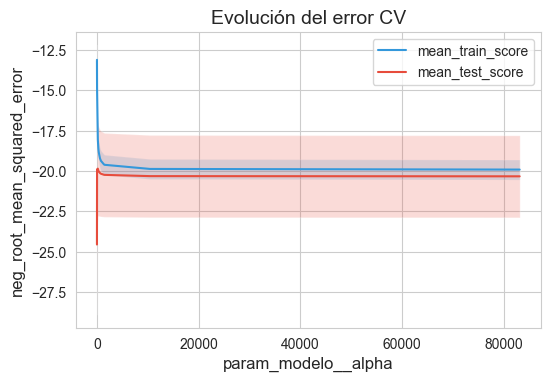

In [525]:
# Gráfico resultados validación cruzada para cada hiperparámetro
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))
hiperparametro = 'param_modelo__alpha'
resultados = resultados.sort_values(hiperparametro, ascending = False)
metrica    = grid.scoring

resultados.plot(hiperparametro, 'mean_train_score', ax=ax)
resultados.plot(hiperparametro, 'mean_test_score', ax=ax)
ax.fill_between(resultados[hiperparametro].astype(int),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados[hiperparametro].astype(int),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV')
ax.set_ylabel(metrica);

In [526]:
# Error de test del modelo final
# ==============================================================================
from sklearn.metrics import mean_squared_error
import numpy as np

modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X=X_test)

# Calcular MSE y luego RMSE
mse = mean_squared_error(y_test, predicciones)
rmse_lm = np.sqrt(mse)

print(f"El error (RMSE) de test es: {rmse_lm}")

El error (RMSE) de test es: 12.543897101094279


#### Random Forest


Métricas de evaluación del modelo Random Forest:
Set         Test    Train
Métrica                  
MAE       8.9828   6.1152
MAPE      1.4312   4.9480
MSE      93.7655  54.9411
NMSE      0.6002   0.1375
RMSE      9.6833   7.4122
R²        0.3998   0.8625


E:\PROFILES\ocaballero\AppData\Local\Temp\ipykernel_30308\427471994.py:185: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importancia', y='Variable',
E:\PROFILES\ocaballero\AppData\Local\Temp\ipykernel_30308\427471994.py:192: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


No se pudo generar gráfico de importancia: 'xerr' (shape: (10,)) must be a scalar or a 1D or (2, n) array-like whose shape matches 'x' (shape: (1,))


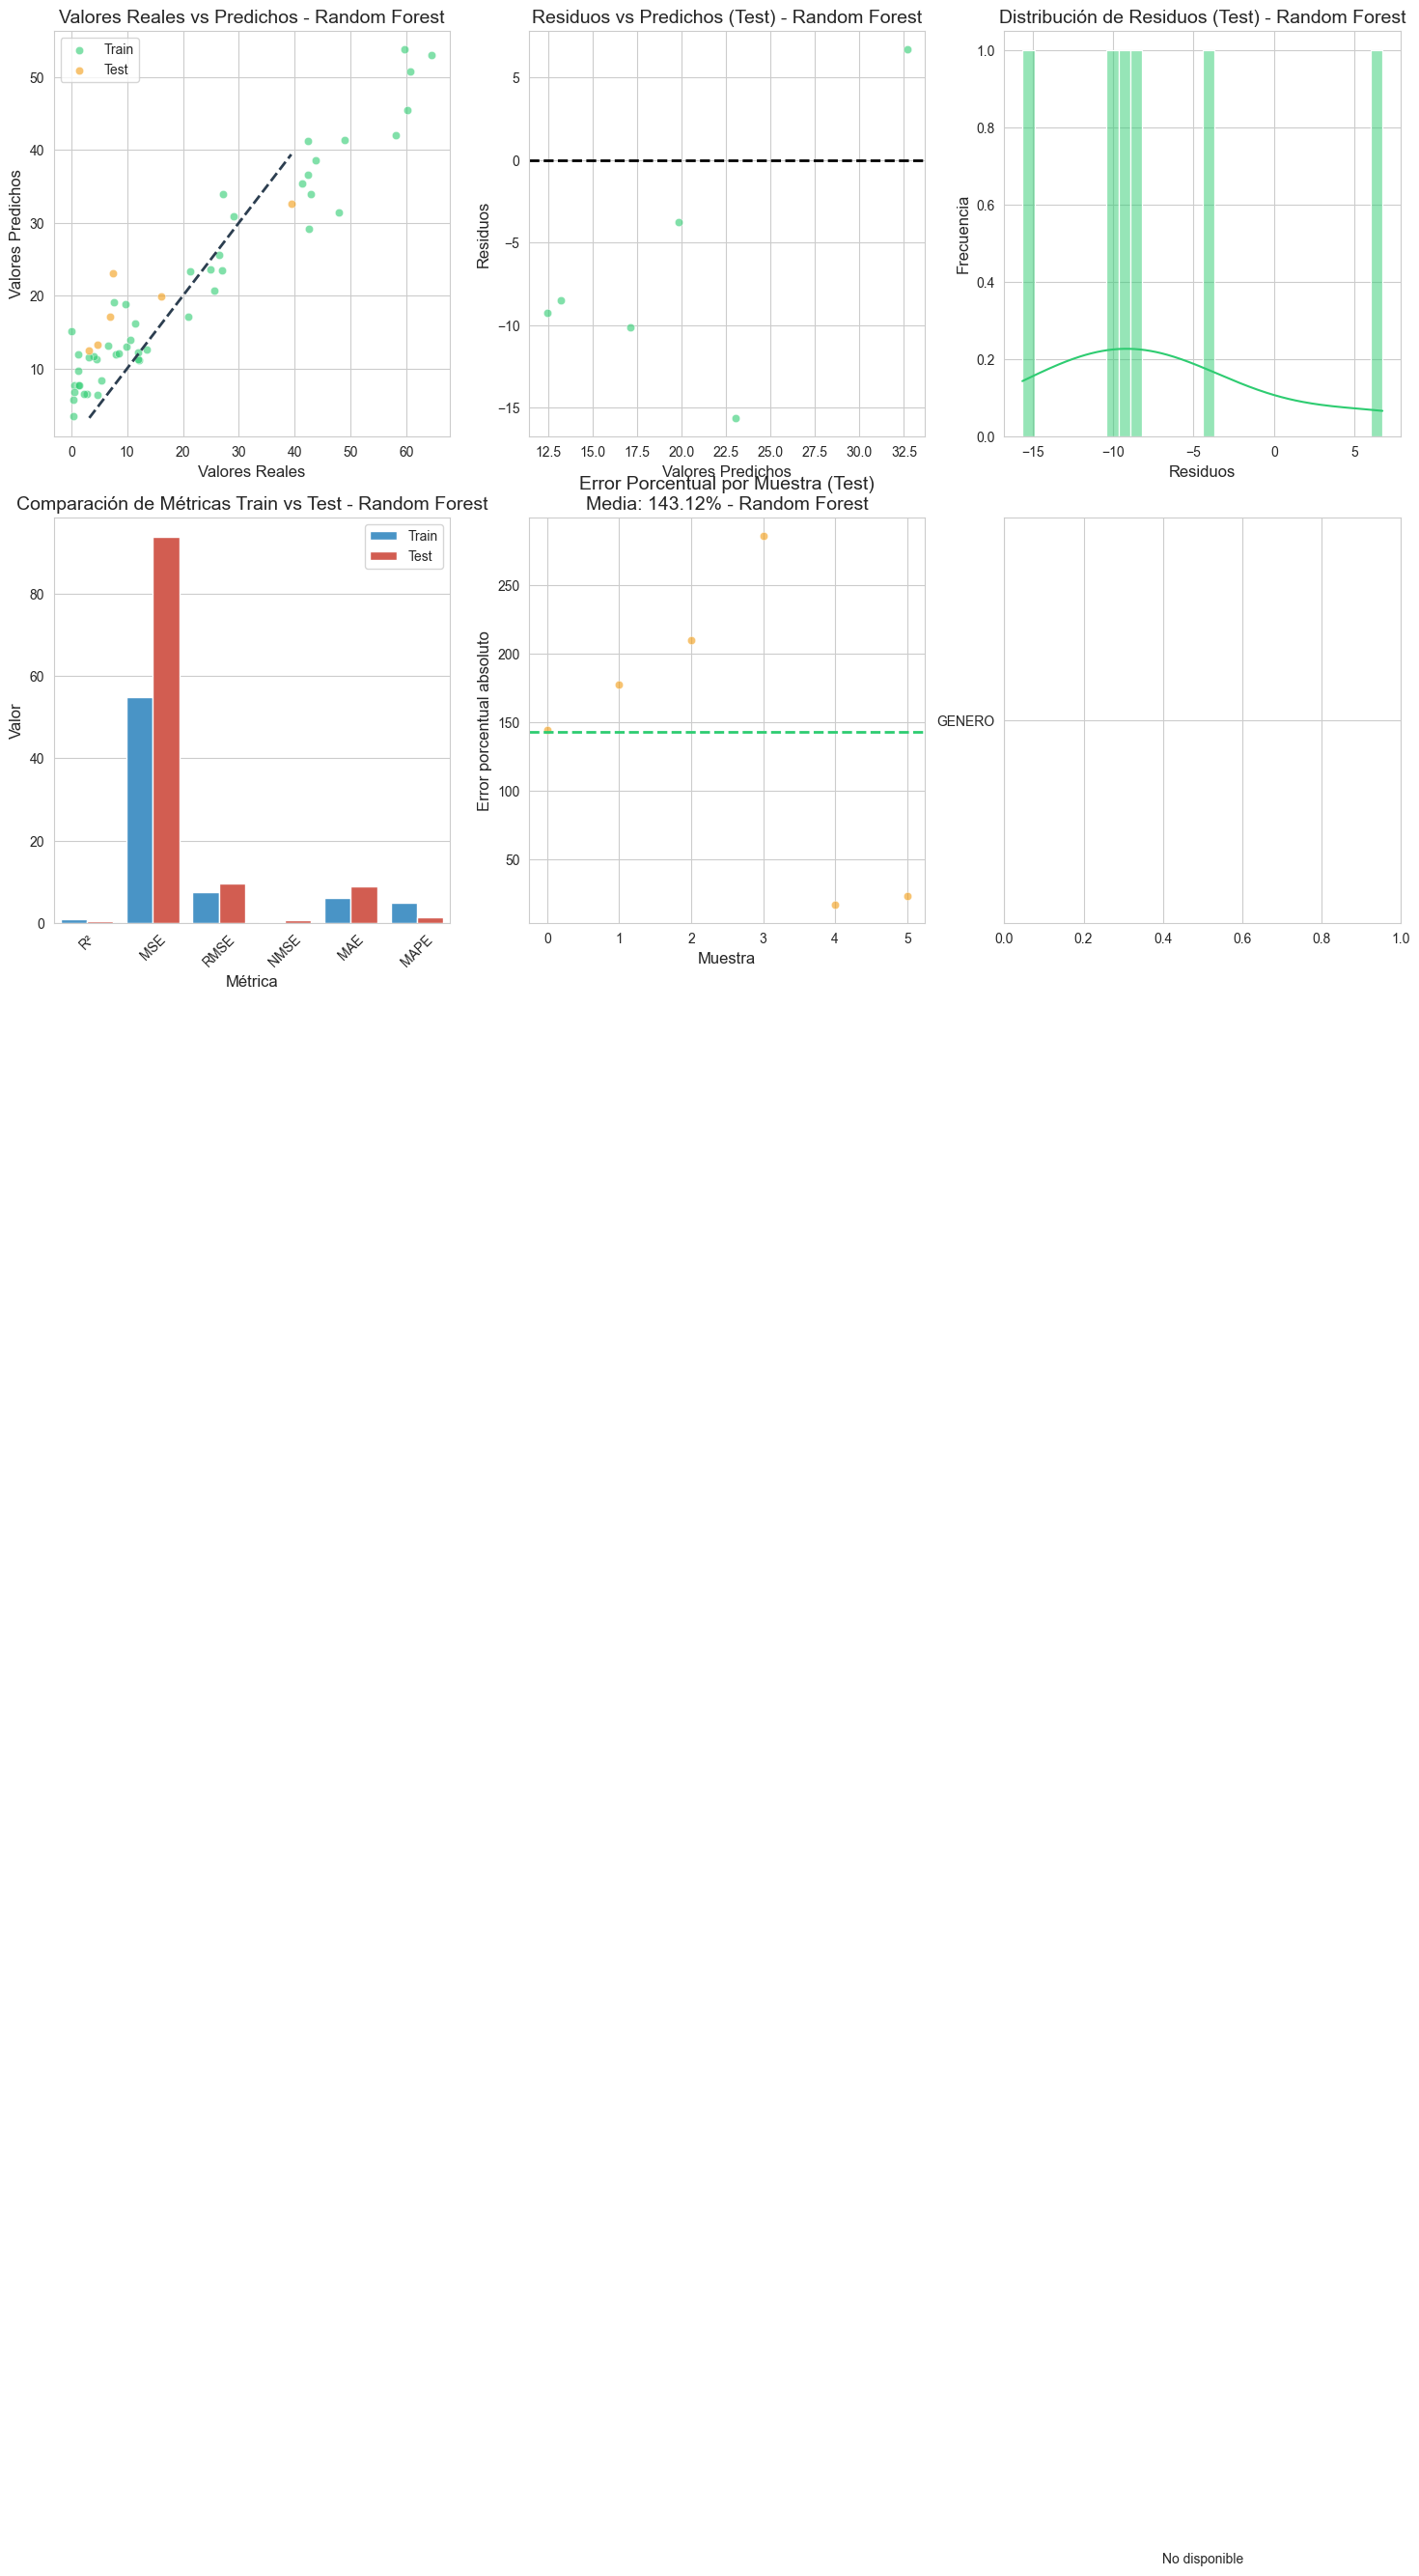


Mejores hiperparámetros encontrados:
{'modelo__n_estimators': 50, 'modelo__max_features': 5, 'modelo__max_depth': None}

Score en validación cruzada del mejor modelo:
RMSE: 19.6647

Diferencia entre train y test:
RMSE Train: 7.4122
RMSE Test: 9.6833
Diferencia: 2.2710


In [527]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (r2_score, mean_squared_error, 
                            mean_absolute_error, mean_absolute_percentage_error)
from sklearn.inspection import permutation_importance 

# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', RandomForestRegressor())])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro

param_distributions = {
    'modelo__n_estimators': [50, 100, 1000, 2000],
    'modelo__max_features': [3, 5, 7, 1.0],
    'modelo__max_depth'   : [None, 3, 5, 10, 20]
}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True,
        verbose    = 0,
        random_state = RANDOM_STATE,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

# Configuración de estilos
sns.set_style("whitegrid")
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
custom_palette = ["#3498db", "#e74c3c", "#2ecc71", "#f39c12", "#9b59b6"]
sns.set_palette(custom_palette)

# PREDICCIONES CON EL MEJOR MODELO
# ==============================================================================
best_model = grid.best_estimator_

# Predicciones en train y test
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# CÁLCULO DE MÉTRICAS
# ==============================================================================
def calcular_metricas(y_real, y_pred, set_name):
    """Calcula y muestra métricas de evaluación"""
    mse = mean_squared_error(y_real, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_real, y_pred)
    mape = mean_absolute_percentage_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)
    nmse = mse / np.var(y_real)  # Normalized MSE
    
    metrics_df = pd.DataFrame({
        'Métrica': ['R²', 'MSE', 'RMSE', 'NMSE', 'MAE', 'MAPE'],
        'Valor': [r2, mse, rmse, nmse, mae, mape],
        'Set': [set_name]*6
    })
    
    return metrics_df

# Calcular métricas para train y test
metrics_train = calcular_metricas(y_train, y_pred_train, 'Train')
metrics_test = calcular_metricas(y_test, y_pred_test, 'Test')

# Combinar resultados
resultados_metricas = pd.concat([metrics_train, metrics_test], ignore_index=True)

# Mostrar resultados en formato tabular
print("\nMétricas de evaluación del modelo Random Forest:")
print(resultados_metricas.pivot(index='Métrica', columns='Set', values='Valor').round(4))

# GRÁFICOS DE DIAGNÓSTICO
# ==============================================================================
plt.figure(figsize=(18, 12))

# Gráfico 1: Valores reales vs predichos (Train y Test)
plt.subplot(2, 3, 1)
sns.scatterplot(x=y_train, y=y_pred_train, alpha=0.6, label='Train', color = "#2ecc71")
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6, label='Test', color =  "#f39c12")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='#2c3e50', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Predichos - Random Forest')
plt.legend()

# Gráfico 2: Residuos vs predichos (Test)
residuos_test = y_test - y_pred_test
plt.subplot(2, 3, 2)
sns.scatterplot(x=y_pred_test, y=residuos_test, alpha=0.6, color = "#2ecc71")
plt.axhline(y=0, color='k', linestyle='--', linewidth=2)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs Predichos (Test) - Random Forest')

# Gráfico 3: Distribución de residuos (Test)
plt.subplot(2, 3, 3)
sns.histplot(residuos_test, kde=True, bins=30, color='#2ecc71')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Residuos (Test) - Random Forest')

# Gráfico 4: Comparación de métricas entre train y test
plt.subplot(2, 3, 4)
sns.barplot(data=resultados_metricas, x='Métrica', y='Valor', hue='Set')
plt.xticks(rotation=45)
plt.title('Comparación de Métricas Train vs Test - Random Forest')
plt.legend(loc='upper right')

# Gráfico 5: Error porcentual absoluto por muestra (Test)
error_porcentual = np.abs((y_test - y_pred_test) / y_test) * 100
plt.subplot(2, 3, 5)
sns.scatterplot(x=range(len(error_porcentual)), y=error_porcentual, alpha=0.6, color='#f39c12')
plt.axhline(y=np.mean(error_porcentual), color='#2ecc71', linestyle='--', linewidth=2)
plt.xlabel('Muestra')
plt.ylabel('Error porcentual absoluto')
plt.title(f'Error Porcentual por Muestra (Test)\nMedia: {np.mean(error_porcentual):.2f}% - Random Forest')

# Gráfico 6: Importancia de variables (Permutación)
plt.subplot(2, 3, 6)
try:
    # Obtener nombres de características
    feature_names = best_model.named_steps['preprocessing'].get_feature_names_out()
    
    # Calcular importancia por permutación
    result = permutation_importance(
        best_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
    )
    
    # Ordenar importancias
    sorted_idx = result.importances_mean.argsort()[::-1][:10]  # Top 10
    importance_df = pd.DataFrame({
        'Variable': feature_names[sorted_idx],
        'Importancia': result.importances_mean[sorted_idx],
        'Desviación': result.importances_std[sorted_idx]
    })
    
    sns.barplot(data=importance_df, x='Importancia', y='Variable', 
                xerr=importance_df['Desviación'], palette='viridis')
    plt.title('Top 10 Variables más Importantes (Permutación)')
except Exception as e:
    print(f"No se pudo generar gráfico de importancia: {e}")
    plt.text(0.5, 0.5, 'No disponible', ha='center')

plt.tight_layout()
plt.show()

# INFORMACIÓN ADICIONAL DEL MODELO
# ==============================================================================
print("\nMejores hiperparámetros encontrados:")
print(grid.best_params_)

print("\nScore en validación cruzada del mejor modelo:")
print(f"RMSE: {-grid.best_score_:.4f}")

print("\nDiferencia entre train y test:")
print(f"RMSE Train: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.4f}")
print(f"RMSE Test: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}")
print(f"Diferencia: {np.sqrt(mean_squared_error(y_test, y_pred_test)) - np.sqrt(mean_squared_error(y_train, y_pred_train)):.4f}")



#### Gradient Boosting Trees


Model Evaluation Metrics:
Set   Train      Test
R²      1.0    0.0599
MSE     0.0  146.8627
RMSE    0.0   12.1187
NMSE    0.0    0.9401
MAE     0.0   10.1857
MAPE    0.0    1.5616


E:\PROFILES\ocaballero\AppData\Local\Temp\ipykernel_30308\990265005.py:153: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


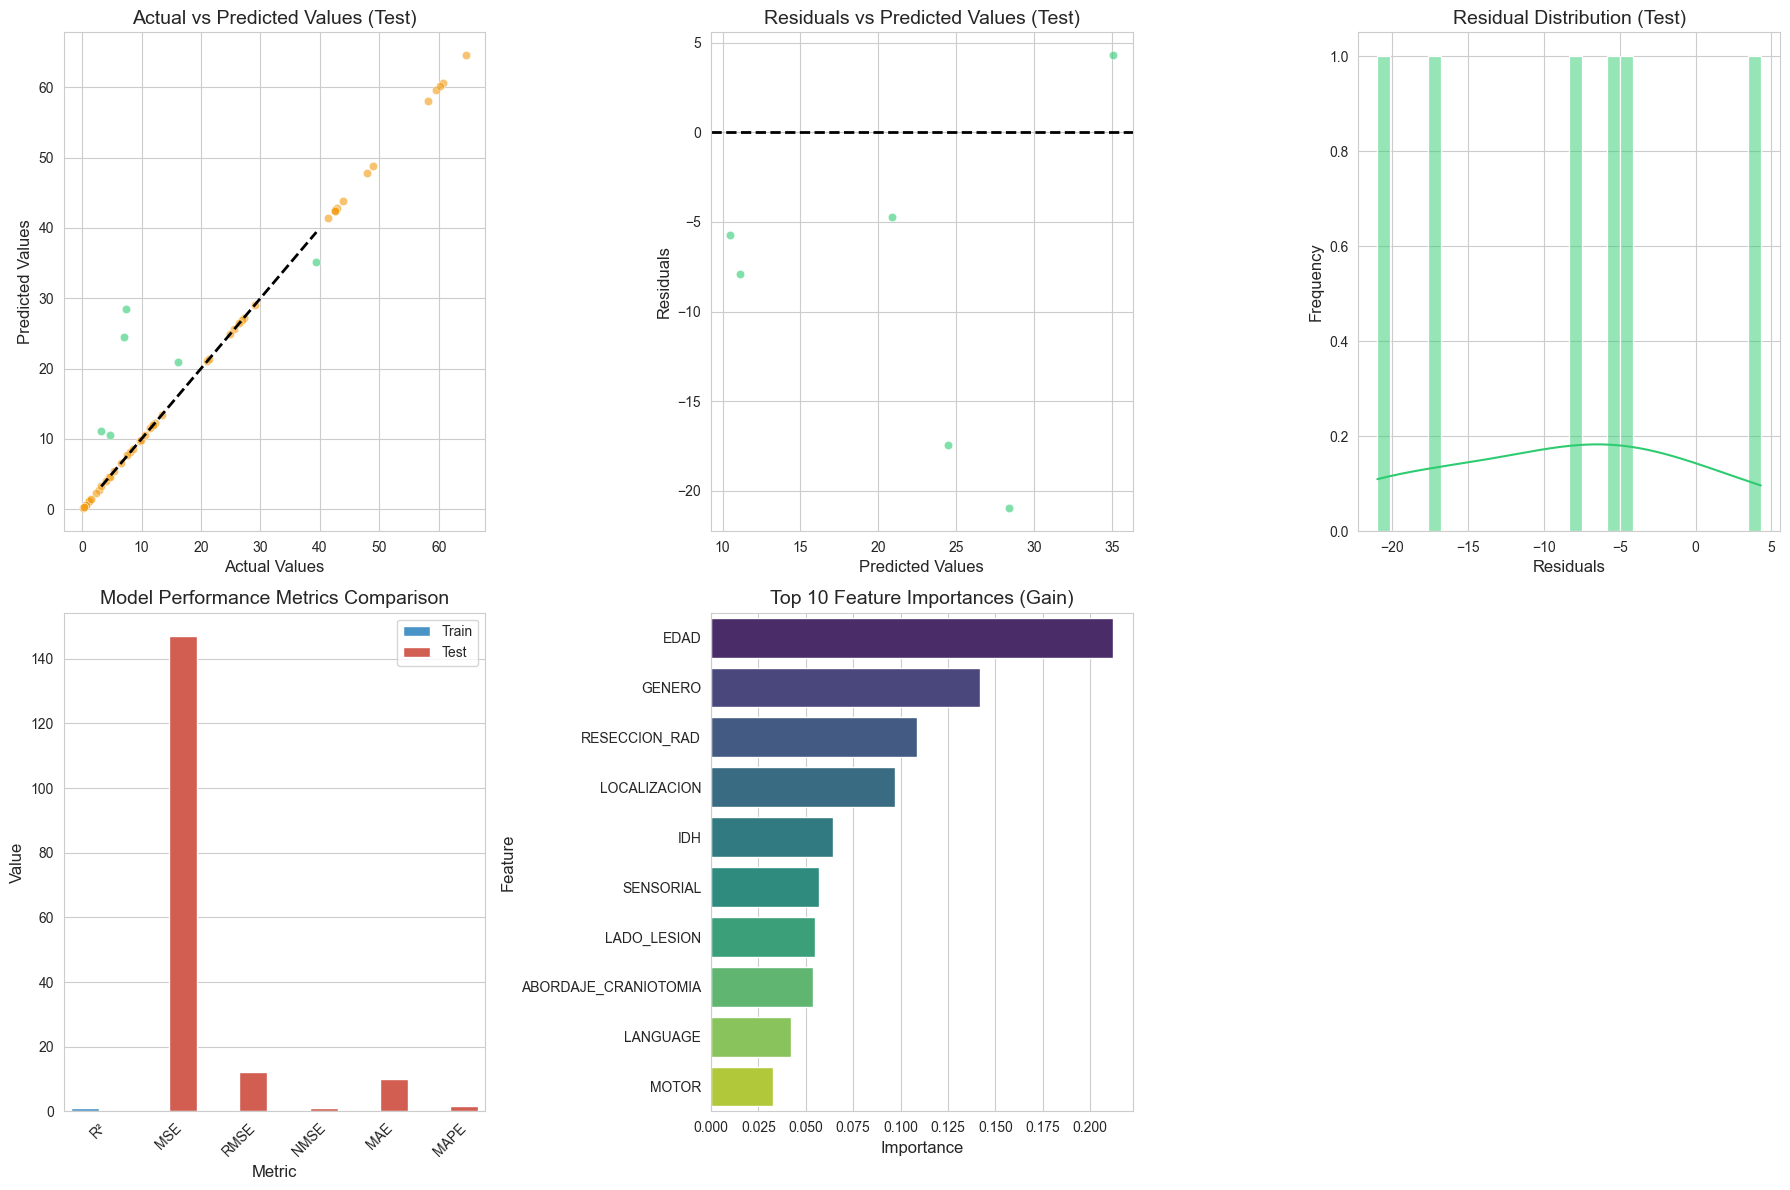


Best Hyperparameters Found:
{'modelo__subsample': 1, 'modelo__n_estimators': 1000, 'modelo__max_features': 5, 'modelo__max_depth': None}

Cross-Validation Performance:
Best RMSE: 20.2624

Train vs Test Performance Difference:
Train RMSE: 0.0000
Test RMSE: 12.1187
Difference: 12.1187


In [528]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor

# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', GradientBoostingRegressor())])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro

param_distributions = {
    'modelo__n_estimators': [50, 100, 1000, 2000],
    'modelo__max_features': [3, 5, 7, 1.0],
    'modelo__max_depth'   : [None, 3, 5, 10, 20],
    'modelo__subsample'   : [0.5,0.7, 1]
}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True,
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

# Set visual style
sns.set_style("whitegrid")
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
custom_palette = ["#3498db", "#e74c3c", "#2ecc71", "#f39c12", "#9b59b6"]
sns.set_palette(custom_palette)

# Get best model and predictions
best_model = grid.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Calculate metrics function
def calculate_metrics(y_true, y_pred, set_name):
    metrics = {
        'R²': r2_score(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'NMSE': mean_squared_error(y_true, y_pred)/np.var(y_true),
        'MAE': mean_absolute_error(y_true, y_pred),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred),
        'Set': set_name
    }
    return pd.DataFrame(metrics, index=[0])

# Calculate metrics for train and test
metrics_train = calculate_metrics(y_train, y_pred_train, 'Train')
metrics_test = calculate_metrics(y_test, y_pred_test, 'Test')
metrics_df = pd.concat([metrics_train, metrics_test]).reset_index(drop=True)

# Print metrics
print("\nModel Evaluation Metrics:")
print(metrics_df.set_index('Set').round(4).T)

# Create diagnostic plots
plt.figure(figsize=(18, 12))

# Plot 1: Actual vs Predicted values
plt.subplot(2, 3, 1)
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6, color="#2ecc71")
sns.scatterplot(x=y_pred_train, y=y_pred_train, alpha=0.6, color="#f39c12")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 
         '--', color='k', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Test)')

# Plot 2: Residuals vs Predicted
residuals = y_test - y_pred_test
residuals2 = y_train - y_pred_train
plt.subplot(2, 3, 2)
sns.scatterplot(x=y_pred_test, y=residuals, alpha=0.6, color='#2ecc71')
plt.axhline(y=0, color='k', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Test)')

# Plot 3: Residual distribution
plt.subplot(2, 3, 3)
sns.histplot(residuals, kde=True, bins=30, color="#2ecc71")
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution (Test)')

# Plot 4: Metrics comparison
plt.subplot(2, 3, 4)
melted_metrics = metrics_df.melt(id_vars='Set', var_name='Metric', value_name='Value')
sns.barplot(data=melted_metrics, x='Metric', y='Value', hue='Set')
plt.xticks(rotation=45)
plt.title('Model Performance Metrics Comparison')
plt.legend(loc='upper right')

# Plot 5: Feature importance (Gain)
plt.subplot(2, 3, 5)
try:
    gb_model = best_model.named_steps['modelo']
    feature_names = best_model.named_steps['preprocessing'].get_feature_names_out()
    importances = gb_model.feature_importances_
    
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False).head(10)
    
    sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
    plt.title('Top 10 Feature Importances (Gain)')
except Exception as e:
    plt.text(0.5, 0.5, f'Feature importance not available\n{str(e)}', 
             ha='center', va='center')
    plt.title('Feature Importance Not Available')


plt.tight_layout()
plt.show()

# Additional model information
print("\nBest Hyperparameters Found:")
print(grid.best_params_)

print("\nCross-Validation Performance:")
print(f"Best RMSE: {-grid.best_score_:.4f}")

print("\nTrain vs Test Performance Difference:")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}")
print(f"Difference: {np.sqrt(mean_squared_error(y_test, y_pred_test)) - np.sqrt(mean_squared_error(y_train, y_pred_train)):.4f}")


In [529]:
# Error de test del modelo final
# ==============================================================================

modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X=X_test)

# Calcular MSE y luego RMSE
mse = mean_squared_error(y_test, predicciones)
rmse_gbm = np.sqrt(mse)

print(f"El error (RMSE) de test es: {rmse_gbm}")

El error (RMSE) de test es: 12.118693607440756


#### Stacking


Métricas de evaluación del modelo Stacking:
Set      Train      Test
R²      0.0791   -0.2194
MSE   368.0960  190.4959
RMSE   19.1858   13.8020
NMSE    0.9209    1.2194
MAE    16.4737   12.9806
MAPE   10.9340    1.9558


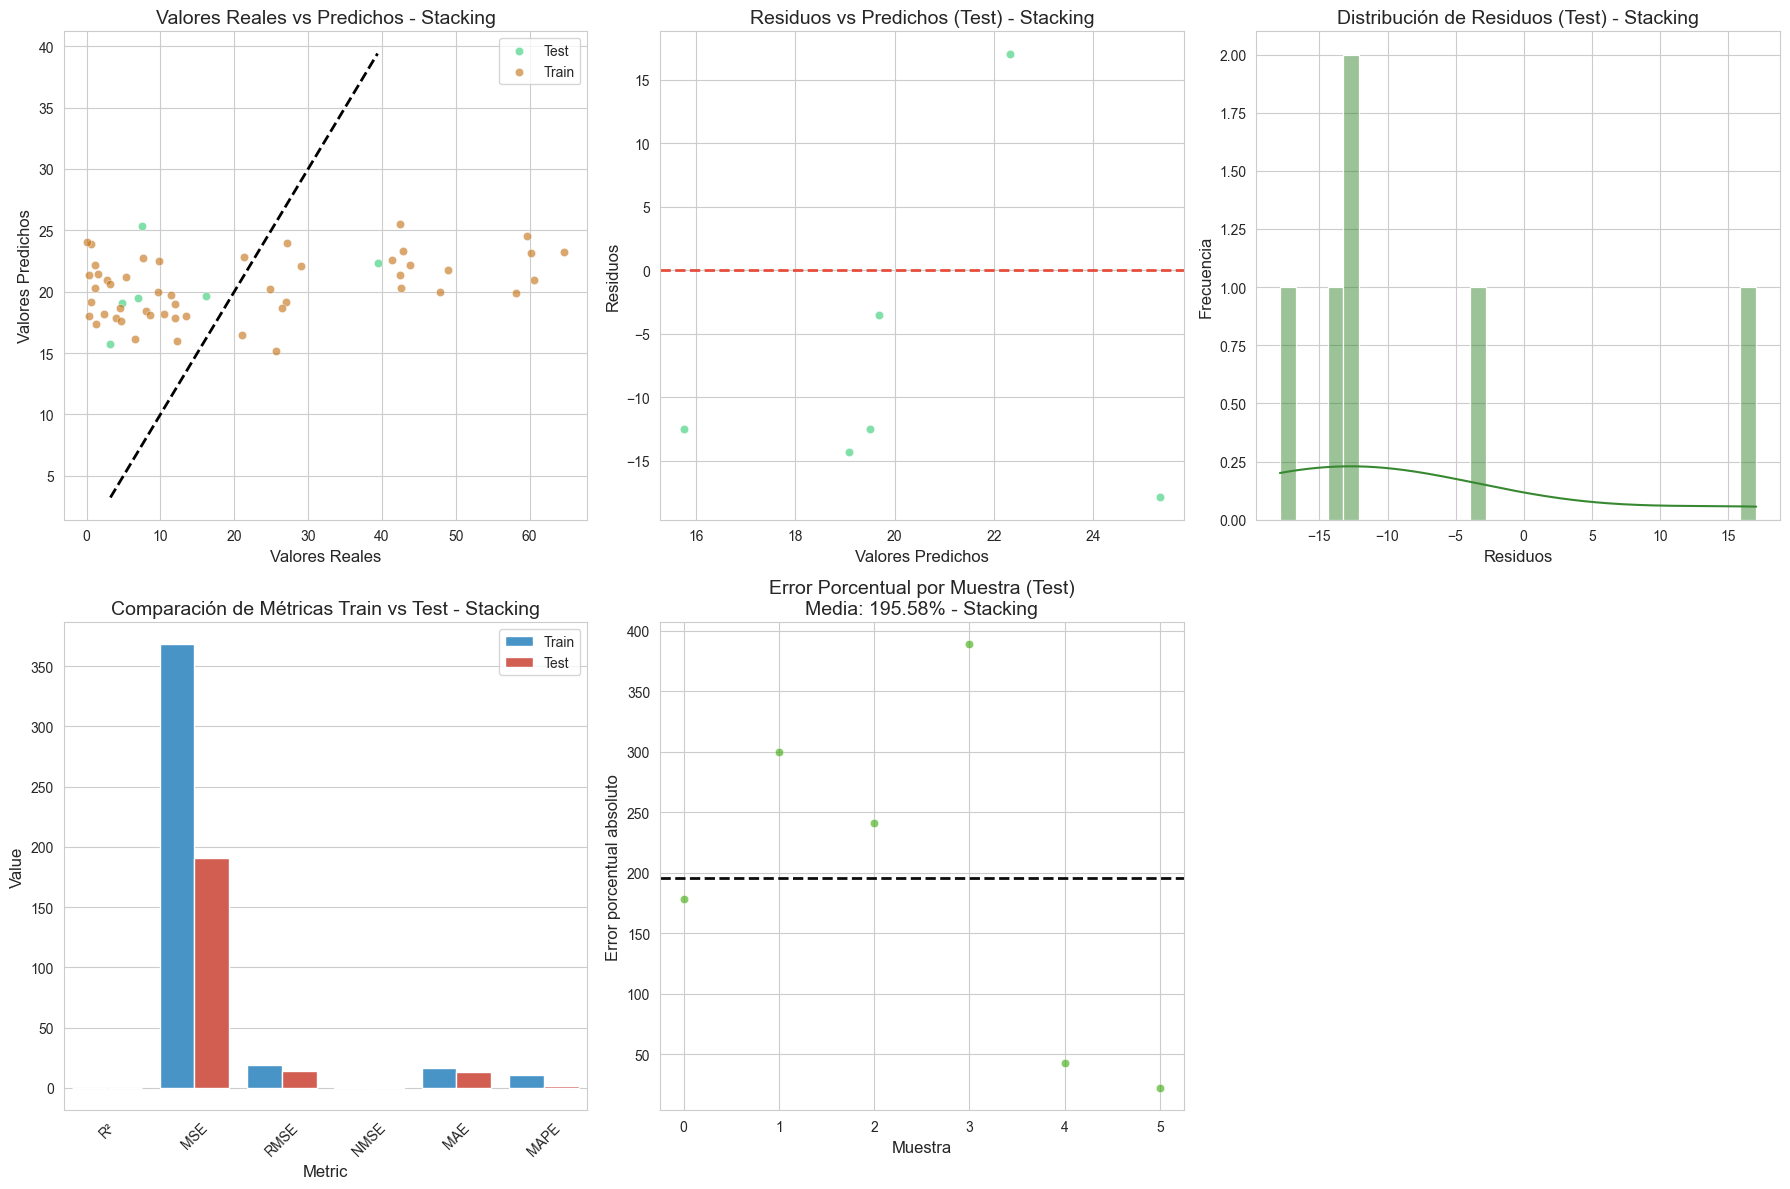

In [530]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import (r2_score, mean_squared_error, 
                           mean_absolute_error, mean_absolute_percentage_error)
from sklearn.ensemble import StackingRegressor


# Pipeline: preprocesado + modelos para el stacking
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

# Se combinan los pasos de preprocesado y los modelos creando varios pipeline.
pipe_ridge = Pipeline([('preprocessing', preprocessor),
                     ('ridge', Ridge(alpha=3.4))])

pipe_rf = Pipeline([('preprocessing', preprocessor),
                     ('random_forest', RandomForestRegressor(
                                         n_estimators = 1000,
                                         max_features = 7,
                                         max_depth    = 20
                                        )
                     )])

# Configuración de estilos
sns.set_style("whitegrid")
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
custom_palette = ["#3498db", "#e74c3c", "#2ecc71", "#f39c12", "#9b59b6"]
sns.set_palette(custom_palette)

# Definición de modelos base para el stacking
estimators = [
    ('ridge', pipe_ridge),
    ('random_forest', pipe_rf)
]

# Creación del modelo stacking con meta-modelo RidgeCV
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=RidgeCV(),
    cv=5,
    n_jobs=-1
)

# Entrenamiento del modelo stacking
stacking_model.fit(X_train, y_train)

# Predicciones
y_pred_train = stacking_model.predict(X_train)
y_pred_test = stacking_model.predict(X_test)

# Función para calcular métricas
def calculate_metrics(y_true, y_pred, set_name):
    metrics = {
        'R²': r2_score(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'NMSE': mean_squared_error(y_true, y_pred)/np.var(y_true),
        'MAE': mean_absolute_error(y_true, y_pred),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred),
        'Set': set_name
    }
    return pd.DataFrame(metrics, index=[0])

# Cálculo de métricas
metrics_train = calculate_metrics(y_train, y_pred_train, 'Train')
metrics_test = calculate_metrics(y_test, y_pred_test, 'Test')
metrics_df = pd.concat([metrics_train, metrics_test]).reset_index(drop=True)

# Mostrar métricas
print("\nMétricas de evaluación del modelo Stacking:")
print(metrics_df.set_index('Set').round(4).T)

# Gráficos de diagnóstico
plt.figure(figsize=(18, 12))

# Gráfico 1: Valores reales vs predichos
plt.subplot(2, 3, 1)
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6, color="#2ecc71", label='Test')
sns.scatterplot(x=y_train, y=y_pred_train, alpha=0.6, color="#c26f10", label='Train')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color="#000000", linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Predichos - Stacking')
plt.legend()

# Gráfico 2: Residuos vs predichos (Test)
residuos_test = y_test - y_pred_test
plt.subplot(2, 3, 2)
sns.scatterplot(x=y_pred_test, y=residuos_test, alpha=0.6, color='#2ecc71')
plt.axhline(y=0, color='#e74c3c', linestyle='--', linewidth=2)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs Predichos (Test) - Stacking')

# Gráfico 3: Distribución de residuos (Test)
plt.subplot(2, 3, 3)
sns.histplot(residuos_test, kde=True, bins=30, color="#388831")
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Residuos (Test) - Stacking')

# Gráfico 4: Comparación de métricas
plt.subplot(2, 3, 4)
melted_metrics = metrics_df.melt(id_vars='Set', var_name='Metric', value_name='Value')
sns.barplot(data=melted_metrics, x='Metric', y='Value', hue='Set')
plt.xticks(rotation=45)
plt.title('Comparación de Métricas Train vs Test - Stacking')
plt.legend(loc='upper right')

# Gráfico 5: Error porcentual absoluto (Test)
error_porcentual = np.abs((y_test - y_pred_test) / y_test) * 100
plt.subplot(2, 3, 5)
sns.scatterplot(x=range(len(error_porcentual)), y=error_porcentual, alpha=0.6, color="#37a703")
plt.axhline(y=np.mean(error_porcentual), color="#0c0c0c", linestyle='--', linewidth=2)
plt.xlabel('Muestra')
plt.ylabel('Error porcentual absoluto')
plt.title(f'Error Porcentual por Muestra (Test)\nMedia: {np.mean(error_porcentual):.2f}% - Stacking')


plt.tight_layout()
plt.show()


In [531]:
# Definición y entrenamiento del StackingRegressor
# ==============================================================================
estimators = [('ridge', pipe_ridge),
              ('random_forest', pipe_rf)]

stacking_regressor = StackingRegressor(estimators=estimators,
                                       final_estimator=RidgeCV())
# Se asigna el resultado a _ para que no se imprima por pantalla
_ = stacking_regressor.fit(X = X_train, y = y_train)

In [532]:
# Error de test del modelo final
# ==============================================================================

modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X=X_test)

# Calcular MSE y luego RMSE
mse = mean_squared_error(y_test, predicciones)
rmse_stacking = np.sqrt(mse)

print(f"El error (RMSE) de test es: {rmse_stacking}")

El error (RMSE) de test es: 12.118693607440756


### XGBoots

Fitting 15 folds for each of 50 candidates, totalling 750 fits

 Mejores hiperparámetros encontrados:
  subsample           : 0.9
  reg_lambda          : 1
  reg_alpha           : 1
  n_estimators        : 100
  max_depth           : 3
  learning_rate       : 0.01
  gamma               : 0.1
  colsample_bytree    : 0.7

 Métricas de rendimiento:
           R²       MSE     RMSE    NMSE      MAE    MAPE
Set                                                      
Train  0.5008  199.5277  14.1254  0.4992  11.8495  8.4748
Test   0.1572  131.6539  11.4741  0.8428  10.6951  1.6545


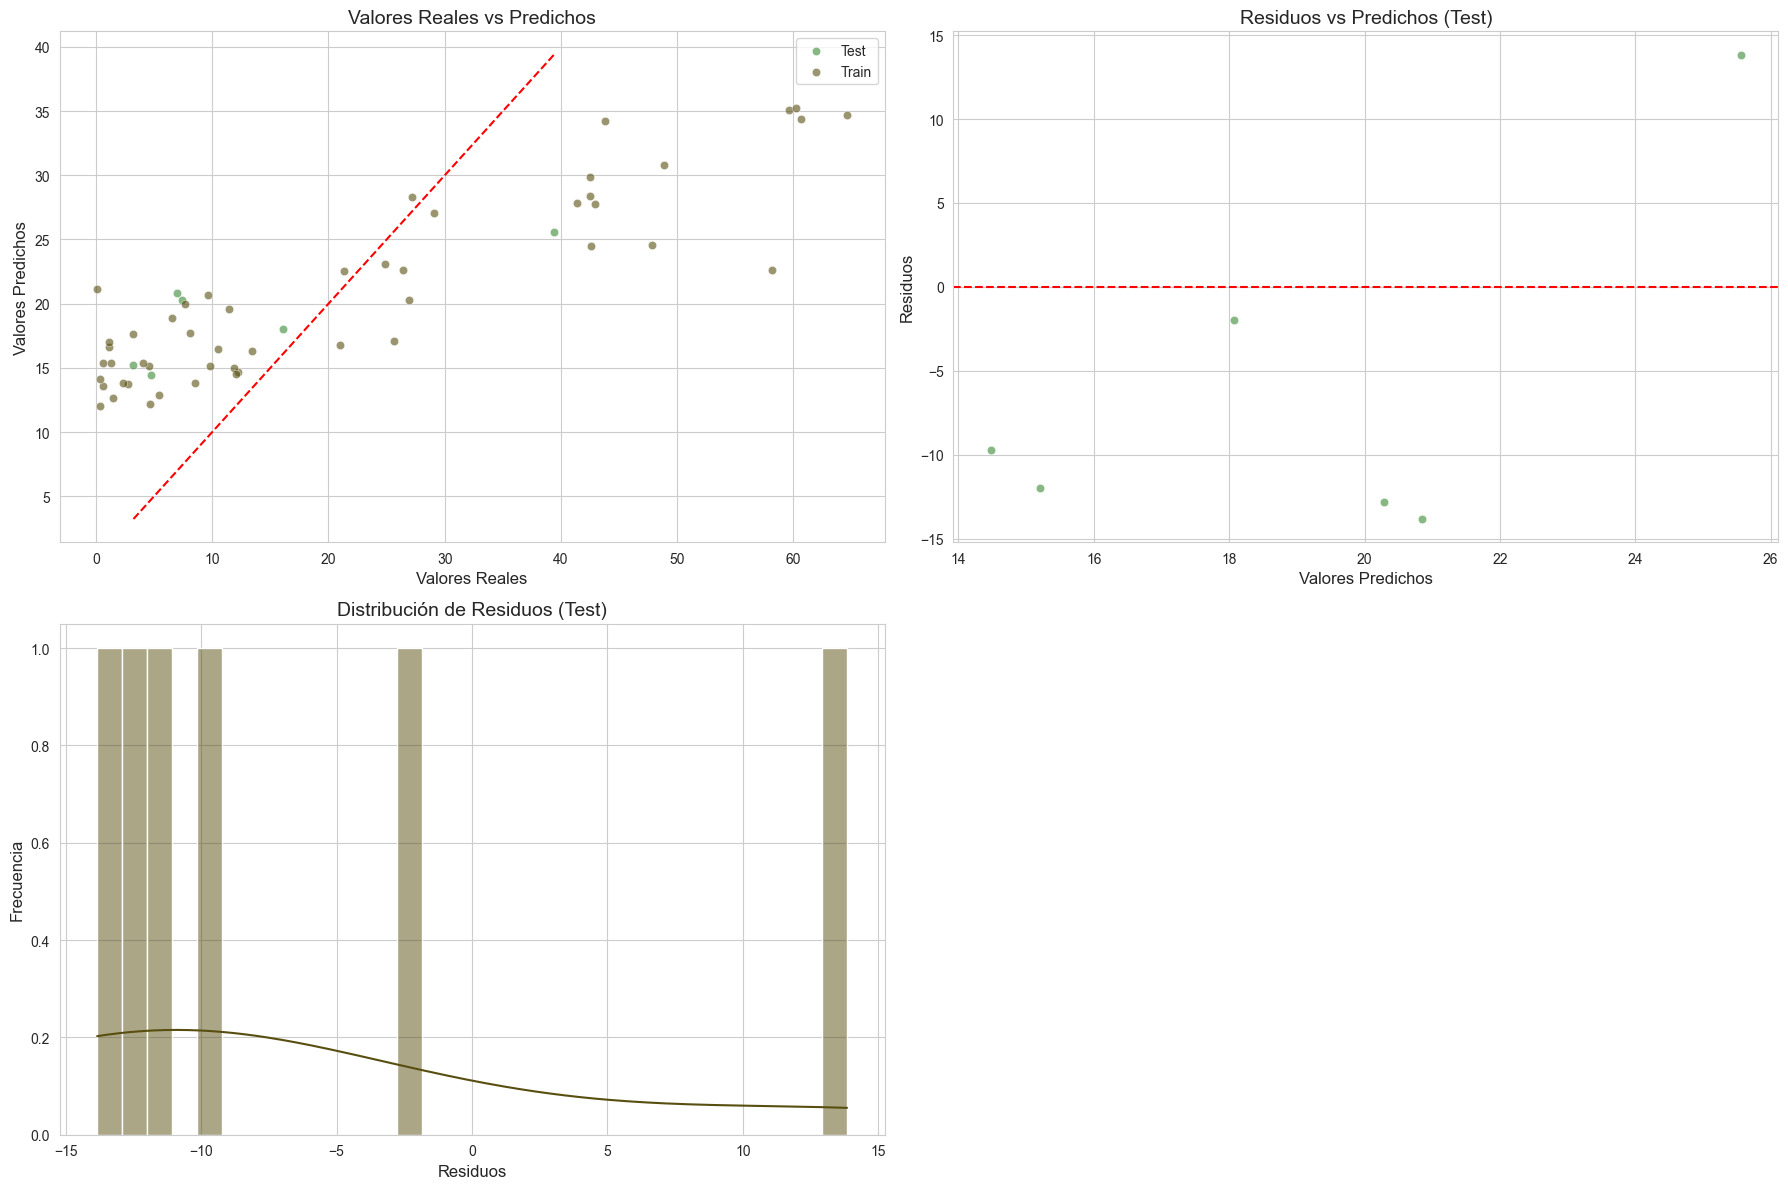

In [533]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import multiprocessing
import pandas as pd

# Pipeline: preprocesado + modelo
# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
    steps=[('scaler', StandardScaler())]
)

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
    steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
).set_output(transform="pandas")

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('modelo', XGBRegressor(random_state=42, n_jobs=-1))  # XGBoost como regresor
])

# Optimización de hiperparámetros
# Espacio de búsqueda de hiperparámetros para XGBoost
param_distributions = {
    'modelo__n_estimators': [100, 200, 500, 1000],
    'modelo__max_depth': [3, 5, 7, 10],
    'modelo__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'modelo__subsample': [0.7, 0.8, 0.9, 1.0],
    'modelo__colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'modelo__gamma': [0, 0.1, 0.2],
    'modelo__reg_alpha': [0, 0.1, 1],
    'modelo__reg_lambda': [0, 0.1, 1]
}

# Búsqueda aleatoria con validación cruzada
grid = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_distributions,
    n_iter=50,  # Número de combinaciones a probar
    scoring='neg_root_mean_squared_error',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=RepeatedKFold(n_splits=5, n_repeats=3, random_state=42),
    refit=True,
    verbose=1,
    random_state=123,
    return_train_score=True
)

# Entrenamiento del modelo
grid.fit(X=X_train, y=y_train)

# Resultados del grid
resultados = pd.DataFrame(grid.cv_results_)
mejores_resultados = resultados.filter(regex='(param.*|mean_t|std_t)') \
    .drop(columns='params') \
    .sort_values('mean_test_score', ascending=False) \
    .head(1)

# Evaluación en el conjunto de prueba
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (r2_score, mean_squared_error, 
                           mean_absolute_error, mean_absolute_percentage_error)

# Configuración de estilos CORREGIDA
sns.set_style("whitegrid")  
plt.rcParams['figure.figsize'] = (12, 8)


# Evaluación en el conjunto de prueba
best_model = grid.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

## 2. Cálculo de métricas completas
def calcular_metricas(y_real, y_pred, set_name):
    return {
        'Set': set_name,
        'R²': r2_score(y_real, y_pred),
        'MSE': mean_squared_error(y_real, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_real, y_pred)),
        'NMSE': mean_squared_error(y_real, y_pred) / np.var(y_real),
        'MAE': mean_absolute_error(y_real, y_pred),
        'MAPE': mean_absolute_percentage_error(y_real, y_pred)
    }

metrics_train = calcular_metricas(y_train, y_pred_train, 'Train')
metrics_test = calcular_metricas(y_test, y_pred_test, 'Test')
metrics_df = pd.DataFrame([metrics_train, metrics_test])

print("\n Mejores hiperparámetros encontrados:")
for k, v in grid.best_params_.items():
    print(f"  {k.split('__')[1]:<20}: {v}")

print("\n Métricas de rendimiento:")
print(metrics_df.set_index('Set').round(4))

## 4. Gráficos de diagnóstico
plt.figure(figsize=(18, 12))

# Gráfico 1: Valores reales vs predichos
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6, color="#388831", label='Test')
sns.scatterplot(x=y_train, y=y_pred_train, alpha=0.6, color="#584E0F", label='Train')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Predichos')
plt.legend()

# Gráfico 2: Residuos vs predichos (Test)
residuos = y_test - y_pred_test
plt.subplot(2, 2, 2)
sns.scatterplot(x=y_pred_test, y=residuos, alpha=0.6, color="#388831")
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs Predichos (Test)')

# Gráfico 3: Distribución de residuos
plt.subplot(2, 2, 3)
sns.histplot(residuos, kde=True, bins=30, color="#584E0F")
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Residuos (Test)')


plt.tight_layout()
plt.show()



### Leave-One-Out Cross-Validation (LOOCV)

#### Random Forest


 Mejores hiperparámetros encontrados:
  n_estimators        : 100
  max_features        : 7
  max_depth           : 20

 Métricas de rendimiento:
           R²       MSE     RMSE    NMSE      MAE    MAPE
Set                                                      
Train  0.8662   53.4819   7.3131  0.1338   6.2273  4.8306
Test   0.1757  128.7639  11.3474  0.8243  10.6346  1.7051


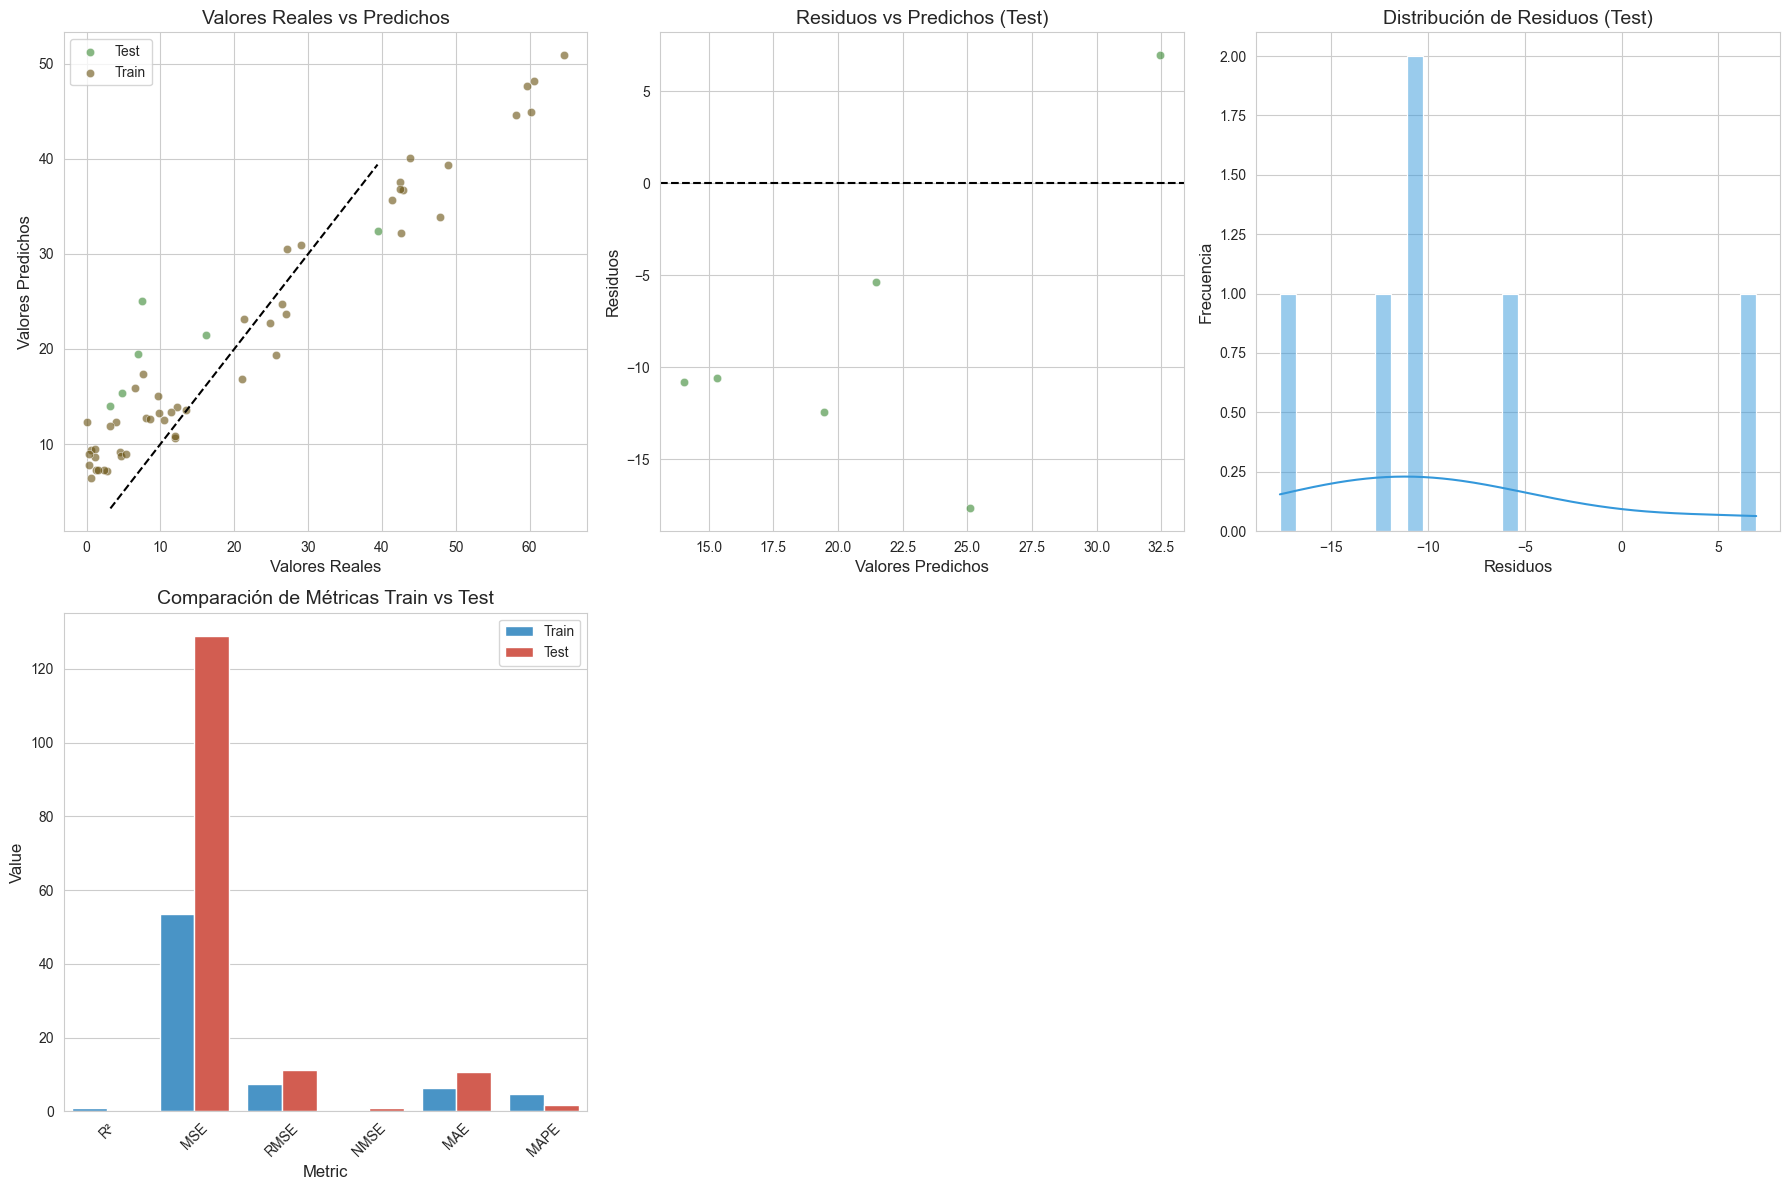

In [534]:
from sklearn.model_selection import RandomizedSearchCV, LeaveOneOut  
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import multiprocessing

# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
    steps=[('scaler', StandardScaler())]
)

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
    steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
).set_output(transform="pandas")

# Pipeline final
pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('modelo', RandomForestRegressor())
])

# Optimización de hiperparámetros
# ==============================================================================
param_distributions = {
    'modelo__n_estimators': [50, 100, 1000, 2000],
    'modelo__max_features': [3, 5, 7, 1.0],
    'modelo__max_depth': [None, 3, 5, 10, 20]
}

# Búsqueda random grid con LOOCV
grid = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_distributions,
    n_iter=20,
    scoring='neg_root_mean_squared_error',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=LeaveOneOut(),  # Cambio clave: LOOCV en lugar de RepeatedKFold
    refit=True,
    verbose=0,
    random_state=42,
    return_train_score=True
)

grid.fit(X=X_train, y=y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex='(param.*|mean_t|std_t)') \
    .drop(columns='params') \
    .sort_values('mean_test_score', ascending=False) \
    .head(1)

from sklearn.metrics import (r2_score, mean_squared_error, 
                           mean_absolute_error, mean_absolute_percentage_error)

## Configuración de estilos
# Configuración de estilos CORREGIDA
sns.set_style("whitegrid")  
plt.rcParams['figure.figsize'] = (12, 8)


## 1. Obtención del mejor modelo y predicciones
best_model = grid.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

## 2. Cálculo de métricas completas
def calcular_metricas(y_real, y_pred, set_name):
    return {
        'Set': set_name,
        'R²': r2_score(y_real, y_pred),
        'MSE': mean_squared_error(y_real, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_real, y_pred)),
        'NMSE': mean_squared_error(y_real, y_pred) / np.var(y_real),
        'MAE': mean_absolute_error(y_real, y_pred),
        'MAPE': mean_absolute_percentage_error(y_real, y_pred)
    }

metrics_train = calcular_metricas(y_train, y_pred_train, 'Train')
metrics_test = calcular_metricas(y_test, y_pred_test, 'Test')
metrics_df = pd.DataFrame([metrics_train, metrics_test])

print("\n Mejores hiperparámetros encontrados:")
for k, v in grid.best_params_.items():
    print(f"  {k.split('__')[1]:<20}: {v}")

print("\n Métricas de rendimiento:")
print(metrics_df.set_index('Set').round(4))

## 4. Gráficos de diagnóstico
plt.figure(figsize=(18, 12))

# Gráfico 1: Valores reales vs predichos
plt.subplot(2, 3, 1)
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6, label='Test', color="#388831")
sns.scatterplot(x=y_train, y=y_pred_train, alpha=0.6, label='Train', color="#664F0E")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Predichos')
plt.legend()

# Gráfico 2: Residuos vs predichos (Test)
residuos_test = y_test - y_pred_test
plt.subplot(2, 3, 2)
sns.scatterplot(x=y_pred_test, y=residuos_test, alpha=0.6, color="#388831")
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs Predichos (Test)')

# Gráfico 3: Distribución de residuos (Test)
plt.subplot(2, 3, 3)
sns.histplot(residuos_test, kde=True, bins=30)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Residuos (Test)')

# Gráfico 4: Comparación de métricas
plt.subplot(2, 3, 4)
melted_metrics = metrics_df.melt(id_vars='Set', var_name='Metric', value_name='Value')
sns.barplot(data=melted_metrics, x='Metric', y='Value', hue='Set')
plt.xticks(rotation=45)
plt.title('Comparación de Métricas Train vs Test')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()



#### Gradient Boosting Trees

Fitting 49 folds for each of 20 candidates, totalling 980 fits

Top 3 combinaciones de hiperparámetros:
   param_modelo__subsample  param_modelo__n_estimators  \
0                      0.7                         100   
5                      1.0                         100   
6                      0.5                         100   

   param_modelo__max_features param_modelo__max_depth  \
0                         3.0                       5   
5                         5.0                       3   
6                         5.0                       3   

   param_modelo__learning_rate  mean_test_score  std_test_score  \
0                         0.10       -16.264908       11.155548   
5                         0.01       -16.744436       10.686002   
6                         0.01       -16.841816       10.319554   

   mean_train_score  std_train_score  
0         -0.313031         0.048882  
5        -13.802899         0.262086  
6        -14.747769         0.263915  

Mejores 

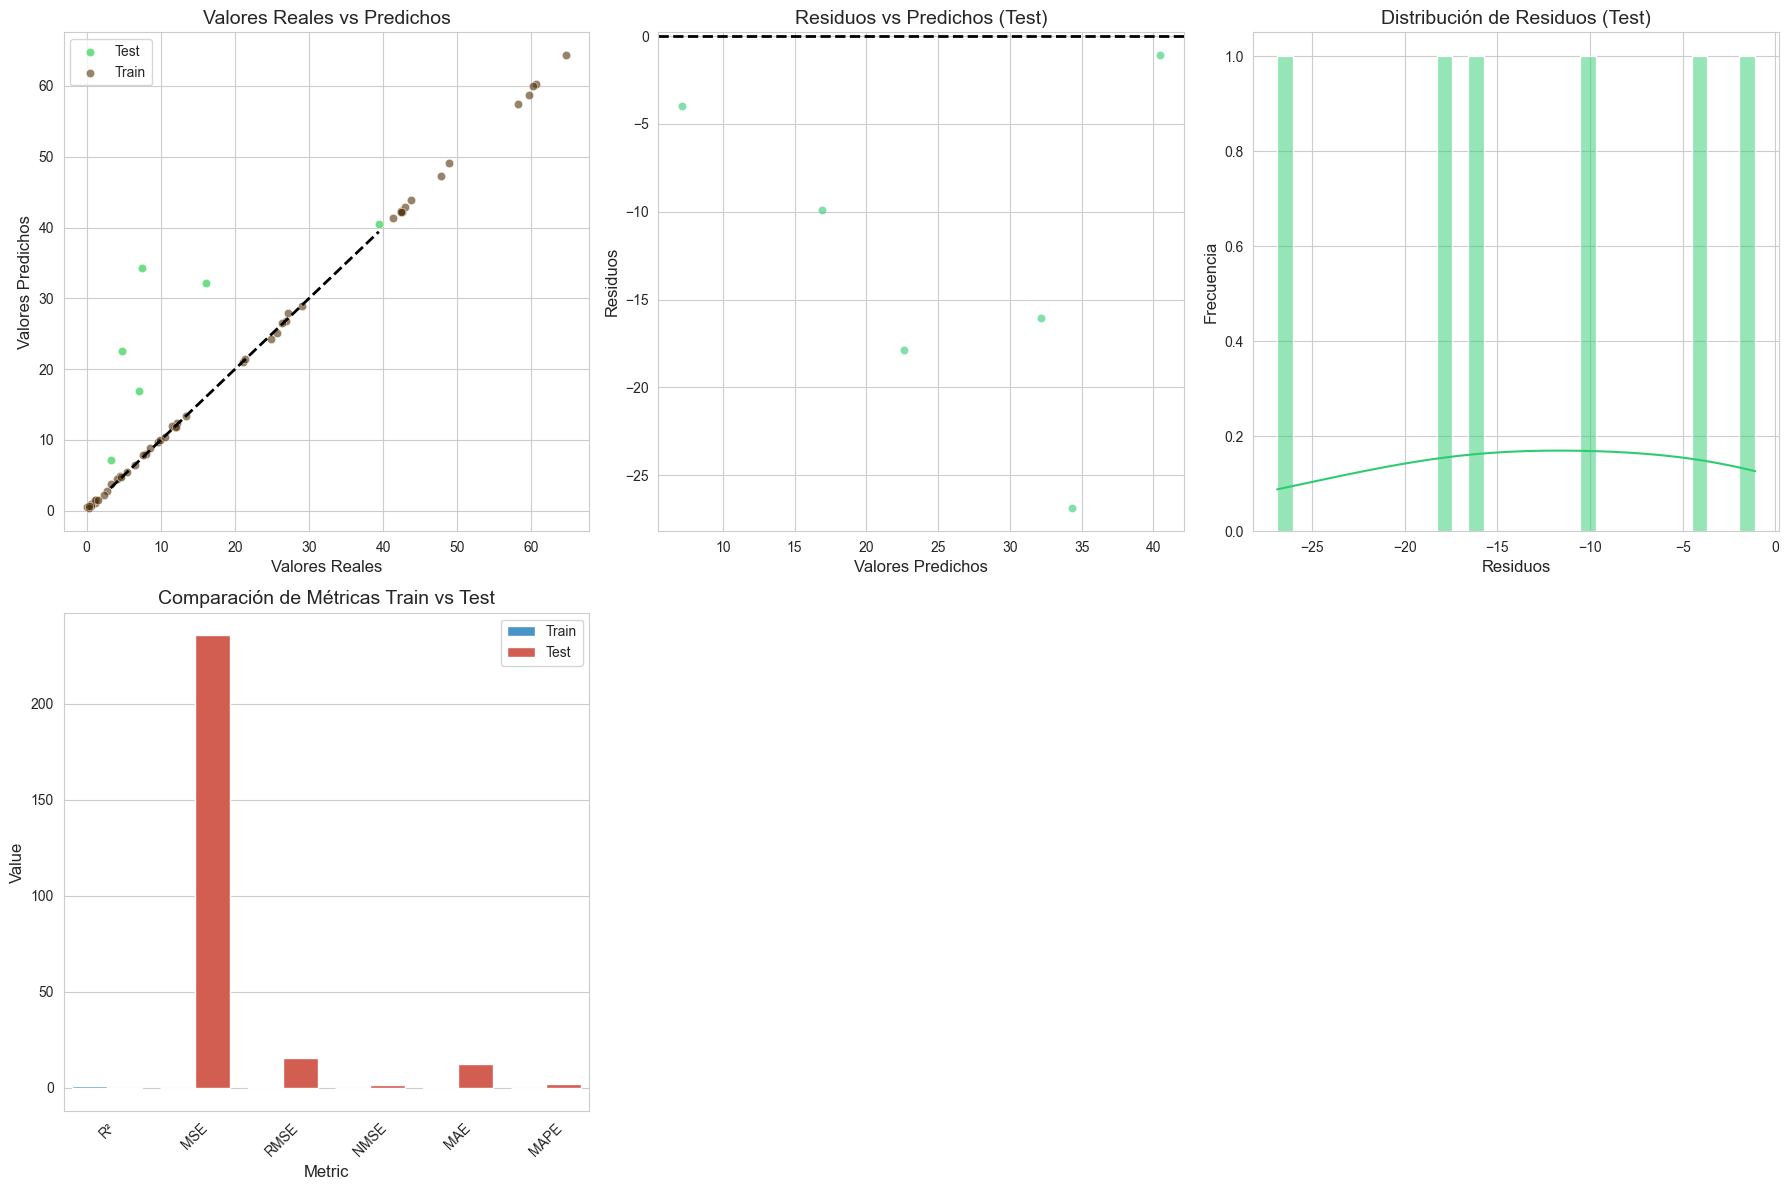

In [537]:
from sklearn.model_selection import RandomizedSearchCV, LeaveOneOut
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import multiprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
    steps=[('scaler', StandardScaler())]
)

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
    steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
).set_output(transform="pandas")

# Pipeline final
pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('modelo', GradientBoostingRegressor())
])

# Optimización de hiperparámetros con LOOCV
# ==============================================================================
param_distributions = {
    'modelo__n_estimators': [50, 100, 1000, 2000],
    'modelo__max_features': [3, 5, 7, 1.0],
    'modelo__max_depth': [None, 3, 5, 10, 20],
    'modelo__subsample': [0.5, 0.7, 1],
    'modelo__learning_rate': [0.01, 0.1, 0.2]  # Añadido parámetro típico de GBM
}

# Búsqueda random grid con LOOCV
grid = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_distributions,
    n_iter=20,
    scoring='neg_root_mean_squared_error',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=LeaveOneOut(),  
    refit=True,
    verbose=1,  # Aumentado para ver progreso (puede ser útil con LOOCV)
    random_state=42,
    return_train_score=True
)

grid.fit(X=X_train, y=y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
top_resultados = resultados.filter(regex='(param.*|mean_t|std_t)') \
    .drop(columns='params') \
    .sort_values('mean_test_score', ascending=False) \
    .head(3)  # Mostramos top 3 para más información

print("\nTop 3 combinaciones de hiperparámetros:")
print(top_resultados)

# Evaluación del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
print(f"\nMejores parámetros encontrados: {grid.best_params_}")

# Predicciones y evaluación en test
predicciones = modelo_final.predict(X=X_test)

# Cálculo de métricas
mse = mean_squared_error(y_true=y_test, y_pred=predicciones)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true=y_test, y_pred=predicciones)
r2 = r2_score(y_true=y_test, y_pred=predicciones)
from sklearn.metrics import (r2_score, mean_squared_error, 
                           mean_absolute_error, mean_absolute_percentage_error)

# Configuración de estilos CORREGIDA
sns.set_style("whitegrid")  
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Obtención del modelo y predicciones
best_model = grid.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

## 2. Cálculo de métricas completas
def calcular_metricas(y_real, y_pred, set_name):
    return {
        'Set': set_name,
        'R²': r2_score(y_real, y_pred),
        'MSE': mean_squared_error(y_real, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_real, y_pred)),
        'NMSE': mean_squared_error(y_real, y_pred) / np.var(y_real),
        'MAE': mean_absolute_error(y_real, y_pred),
        'MAPE': mean_absolute_percentage_error(y_real, y_pred)
    }

metrics_train = calcular_metricas(y_train, y_pred_train, 'Train')
metrics_test = calcular_metricas(y_test, y_pred_test, 'Test')
metrics_df = pd.DataFrame([metrics_train, metrics_test])

## 3. Presentación de resultados

print("\n Mejores hiperparámetros encontrados:")
for k, v in grid.best_params_.items():
    print(f"  {k.split('__')[1]:<20}: {v}")

print("\n Métricas de rendimiento:")
print(metrics_df.set_index('Set').round(4))

## 4. Gráficos de diagnóstico
plt.figure(figsize=(18, 12))

# Gráfico 1: Valores reales vs predichos
plt.subplot(2, 3, 1)
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6, color="#10c938", label='Test')
sns.scatterplot(x=y_train, y=y_pred_train, alpha=0.6, color="#523107", label='Train')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color="#000000", linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Predichos')
plt.legend()

# Gráfico 2: Residuos vs predichos (Test)
residuos_test = y_test - y_pred_test
plt.subplot(2, 3, 2)
sns.scatterplot(x=y_pred_test, y=residuos_test, alpha=0.6, color='#2ecc71')
plt.axhline(y=0, color="#000000", linestyle='--', linewidth=2)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs Predichos (Test)')

# Gráfico 3: Distribución de residuos (Test)
plt.subplot(2, 3, 3)
sns.histplot(residuos_test, kde=True, bins=30, color='#2ecc71')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Residuos (Test)')

# Gráfico 4: Comparación de métricas
plt.subplot(2, 3, 4)
melted_metrics = metrics_df.melt(id_vars='Set', var_name='Metric', value_name='Value')
sns.barplot(data=melted_metrics, x='Metric', y='Value', hue='Set')
plt.xticks(rotation=45)
plt.title('Comparación de Métricas Train vs Test')
plt.legend(loc='upper right')


plt.tight_layout()
plt.show()



#### XGBoots

Fitting 49 folds for each of 30 candidates, totalling 1470 fits

Top 5 combinaciones de hiperparámetros:
    param_modelo__subsample  param_modelo__reg_lambda  \
21                      0.8                      10.0   
12                      1.0                      10.0   
20                      0.8                       1.0   
23                      1.0                      10.0   
5                       0.7                       0.1   

    param_modelo__reg_alpha  param_modelo__n_estimators  \
21                      0.1                         500   
12                      0.1                          50   
20                      0.0                          50   
23                      0.0                          50   
5                       0.1                          50   

    param_modelo__max_depth  param_modelo__learning_rate  param_modelo__gamma  \
21                        3                         0.01                  0.1   
12                        3        

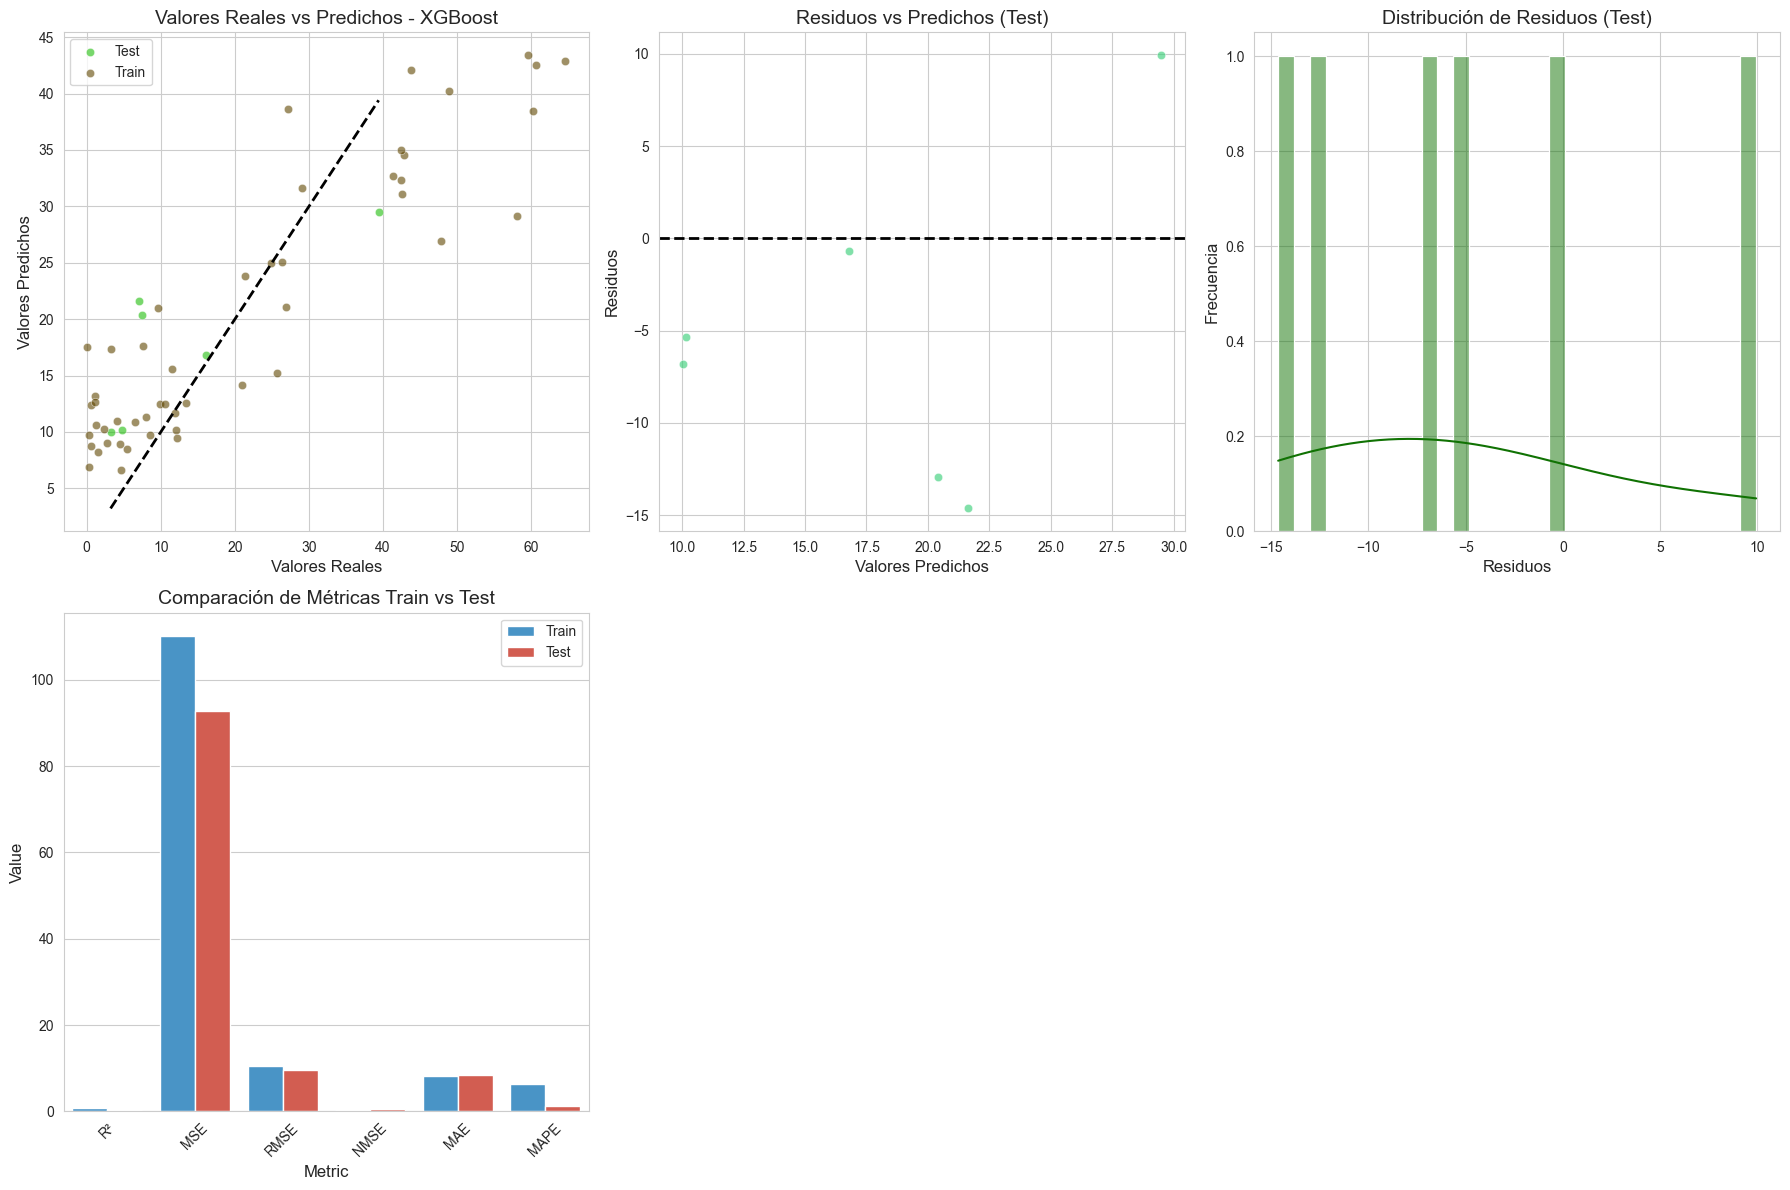

In [539]:
from sklearn.model_selection import RandomizedSearchCV, LeaveOneOut
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import multiprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
    steps=[('scaler', StandardScaler())]
)

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
    steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
).set_output(transform="pandas")

# Pipeline final con XGBoost
pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('modelo', XGBRegressor(random_state=123, n_jobs=-1))
])

# Optimización de hiperparámetros con LOOCV
# ==============================================================================
param_distributions = {
    'modelo__n_estimators': [50, 100, 200, 500],
    'modelo__max_depth': [3, 5, 7, 9],
    'modelo__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'modelo__subsample': [0.7, 0.8, 0.9, 1.0],
    'modelo__colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'modelo__gamma': [0, 0.1, 0.2],
    'modelo__reg_alpha': [0, 0.1, 1],
    'modelo__reg_lambda': [0.1, 1, 10]
}

# Búsqueda random grid con LOOCV
grid = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_distributions,
    n_iter=30,  # Aumentado por la mayor complejidad de XGBoost
    scoring='neg_root_mean_squared_error',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=LeaveOneOut(),
    refit=True,
    verbose=1,
    random_state=42,
    return_train_score=True
)

grid.fit(X=X_train, y=y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
top_resultados = resultados.filter(regex='(param.*|mean_t|std_t)') \
    .drop(columns='params') \
    .sort_values('mean_test_score', ascending=False) \
    .head(5)  # Mostramos top 5 para XGBoost

print("\nTop 5 combinaciones de hiperparámetros:")
print(top_resultados)

# Evaluación del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
print(f"\nMejores parámetros encontrados: {grid.best_params_}")

# Predicciones y evaluación en test
predicciones = modelo_final.predict(X=X_test)

# Cálculo de métricas
mse = mean_squared_error(y_true=y_test, y_pred=predicciones)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true=y_test, y_pred=predicciones)
r2 = r2_score(y_true=y_test, y_pred=predicciones)

from sklearn.metrics import (r2_score, mean_squared_error, 
                           mean_absolute_error, mean_absolute_percentage_error)

## Configuración de estilos
# Configuración de estilos CORREGIDA
sns.set_style("whitegrid")  
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Obtención del modelo y predicciones
best_model = grid.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

## 2. Cálculo de métricas completas
def calcular_metricas(y_real, y_pred, set_name):
    return {
        'Set': set_name,
        'R²': r2_score(y_real, y_pred),
        'MSE': mean_squared_error(y_real, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_real, y_pred)),
        'NMSE': mean_squared_error(y_real, y_pred) / np.var(y_real),
        'MAE': mean_absolute_error(y_real, y_pred),
        'MAPE': mean_absolute_percentage_error(y_real, y_pred)
    }

metrics_train = calcular_metricas(y_train, y_pred_train, 'Train')
metrics_test = calcular_metricas(y_test, y_pred_test, 'Test')
metrics_df = pd.DataFrame([metrics_train, metrics_test])


print("\n Mejores hiperparámetros encontrados:")
for k, v in grid.best_params_.items():
    print(f"  {k.split('__')[1]:<20}: {v}")

print("\n Métricas de rendimiento:")
print(metrics_df.set_index('Set').round(4))

## 4. Gráficos de diagnóstico
plt.figure(figsize=(18, 12))

# Gráfico 1: Valores reales vs predichos
plt.subplot(2, 3, 1)
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6, color="#1fbd0a", label='Test')
sns.scatterplot(x=y_train, y=y_pred_train, alpha=0.6, color="#5f4600", label='Train')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color="#000000", linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Predichos - XGBoost')
plt.legend()

# Gráfico 2: Residuos vs predichos (Test)
residuos_test = y_test - y_pred_test
plt.subplot(2, 3, 2)
sns.scatterplot(x=y_pred_test, y=residuos_test, alpha=0.6, color='#2ecc71')
plt.axhline(y=0, color="#000000", linestyle='--', linewidth=2)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs Predichos (Test)')

# Gráfico 3: Distribución de residuos (Test)
plt.subplot(2, 3, 3)
sns.histplot(residuos_test, kde=True, bins=30, color="#107203")
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Residuos (Test)')

# Gráfico 4: Comparación de métricas
plt.subplot(2, 3, 4)
melted_metrics = metrics_df.melt(id_vars='Set', var_name='Metric', value_name='Value')
sns.barplot(data=melted_metrics, x='Metric', y='Value', hue='Set')
plt.xticks(rotation=45)
plt.title('Comparación de Métricas Train vs Test')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
